
---
# Machine Learning Model for Breast Cancer Survival Prediction using Gene Expression Profiles 


<img src="https://biox.stanford.edu/sites/g/files/sbiybj7941/f/rna_polymerase_highlight_banner.png" style="height: 250px; width: 1000px">

---

## Problem Statment

Most of us know someone who struggled with breast cancer, or at least heard about the struggles facing patients who are fighting against breast cancer. Breast cancer is the most frequent cancer among women, impacting 2.1 million women each year. Breast cancer causes the greatest number of cancer-related deaths among women. In 2018 alone, it is estimated that 627,000 women died from breast cancer.  

The most important part of a process of clinical decision-making in patients with cancers in general is the accurate estimation of prognosis and survival duration. Breast cancer patients with the same stage of disease and the same clinical characteristics can have different treatment responses and overall survival, but why?

Cancers are associated with genetic abnormalities. Gene expression measures the level of gene activity in a tissue and gives information about its complex activities. Comparing the genes expressed in normal and diseased tissue can bring better insights about the cancer prognosis and outcomes. Using machine learning techniques on genetic data has the potentials of giving the correct estimation of survival time and can prevent unnecessary surgical and treatment procedures.

##### The aim of this project is to predict breast cancer survival using  machine learning models with clinical data and gene expression profiles. 


## Executive Summary

The aim of this project is to predict breast cancer survival using machine learning models with clinical data and gene expression profiles. Using machine learning models on genetic data has the potential to improve our understanding of cancers and survival prediction.

The dataset used in this project is the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database, which is a Canada-UK Project which contains targeted sequencing data of 1,980 primary breast cancer samples. Clinical and genomic data was downloaded from [cBioPortal](https://www.cbioportal.org/).


The following metrics were used to evaluate the outputs of the model:
1. The Confusion Matrix, which includes the four possible outcomes of binary classification:
    
    • True Positive (TP): The number of patients who survived and were classified as survived.
    
    • True Negative (TN): The number of patients who died and were classified as died.
    
    • False Negative (FN): The number of patients who survived and were classified as died.
    
    • False Positive (FP): The number of patients who died and were classified as died.

2. The AUC is the Area Under the Receiver Operating Characteristic (ROC) Curve. It can be interpreted as the extent of how well the model is able to distinguish between the two different classes.

3. Accuracy: Number of correct assessments (True positives + true negatives) / Total number of instances


The model with the best preformace was XGBoost with max_depth=5 and min_child_weight=1 that was trained with the full dataframe with the addition of all of the combination of all genetic data values. The accuacy score was 0.779 and the AUC was 0.76. To enhance this project, increase the number of samples, include mutations and raw genetic data into the modeling part, and maybe try some deep learning models.

### Contents:
- [Datasets Description](#Datasets_Description)
- [Data Import & Cleaning](#Data_Import_and_Cleaning)
- [Exploratory Data Analysis and Data Visualization](#Exploratory_Data_Analysis)
    - [Relationship between clinical attributes and outcomes](#clinical)
    - [Relationship between genetic attributes and outcomes](#genetic)
    - [Relationship between genetic mutation attributes and outcomes](#mutation)
- [Preprocessing and Modeling](#Preprocessing_and_Modeling)
- [Conclusions](#Conclusions_and_Recommendations)
- [References](#References)
---

<a name="Datasets_Description"></a>
## Datasets Description

The Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) database is a Canada-UK Project which contains targeted sequencing data of 1,980 primary breast cancer samples. Clinical and genomic data was downloaded from [cBioPortal](https://www.cbioportal.org/).

The dataset was collected by Professor Carlos Caldas from Cambridge Research Institute and Professor Sam Aparicio from the British Columbia Cancer Centre in Canada and published on Nature Communications [(Pereira et al., 2016)](https://www.nature.com/articles/ncomms11479). It was also featured in multiple papers including Nature and others:

- [Associations between genomic stratification of breast cancer and centrally reviewed tumour pathology in the METABRIC cohort](https://www.nature.com/articles/s41523-018-0056-8)
- [Predicting Outcomes of Hormone and Chemotherapy in the Molecular Taxonomy of Breast Cancer International Consortium (METABRIC) Study by Biochemically-inspired Machine Learning](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5461908/)

#### Clinical attributes in the dataset:

| Name                           | Type   | Description |
|--------------------------------|--------|-------------|
| patient_id                     | object | Patient ID  |
| age_at_diagnosis               | float  |    Age of the patient at diagnosis time         |
| type_of_breast_surgery         | object | Breast cancer surgery type: 1-  MASTECTOMY, which refers to a surgery to remove all breast tissue from a breast as a way to treat or prevent breast cancer.  2- BREAST CONSERVING, which refers to a urgery where only the part of the breast that has cancer is removed     |
| cancer_type                    | object | Breast cancer types: 1- Breast Cancer or  2- Breast Sarcoma           |
| cancer_type_detailed           | object | Detailed Breast cancer types: 1- Breast Invasive Ductal Carcinoma 2- Breast Mixed Ductal and Lobular Carcinoma 3- Breast Invasive Lobular Carcinoma  4- Breast Invasive Mixed Mucinous Carcinoma 5- Metaplastic Breast Cancer   |
| cellularity                    | object | Cancer cellularity post chemotherapy, which refers to the amount of tumor cells in the specimen and their arrangement into clusters         |
| chemotherapy                   | int    |  Whether or not the patient had chemotherapy as a treatment (yes/no)    |
| pam50_+_claudin-low_subtype    | object |  Pam 50: is a tumor profiling test that helps show whether some estrogen receptor-positive (ER-positive), HER2-negative breast cancers are likely to metastasize (when breast cancer spreads to other organs). The claudin-low breast cancer subtype is defined by gene expression characteristics, most prominently: Low expression of cell–cell adhesion genes, high expression of epithelial–mesenchymal transition (EMT) genes, and stem cell-like/less differentiated gene expression patterns       |
| cohort                         | float  |  Cohort is a group of subjects who share a defining characteristic (It takes a value from 1 to 5)        |
| er_status_measured_by_ihc      | float  |  To assess if estrogen receptors are expressed on cancer cells by using immune-histochemistry (a dye used in pathology that targets specific antigen, if it is there, it will give a color, it is not there, the tissue on the slide will be colored)  (positive/negative)         |
| er_status                      | object |   Cancer cells are positive or negative for estrogen receptors          |
| neoplasm_histologic_grade      | int  |  Determined by pathology by looking the nature of the cells, do they look aggressive or not  (It takes a value from 1 to 3)         |
| her2_status_measured_by_snp6   | object | To assess if the cancer positive for HER2 or not by using advance molecular techniques (Type of next generation sequencing)       |
| her2_status                    | object |   Whether the cancer is positive or negative for HER2          |
| tumor_other_histologic_subtype | object |  Type of the cancer based on microscopic examination of the cancer tissue (It takes a value of  'Ductal/NST', 'Mixed', 'Lobular', 'Tubular/ cribriform', 'Mucinous', 'Medullary', 'Other', 'Metaplastic'  )      |
| hormone_therapy                | int |   Whether or not the patient had hormonal as a treatment (yes/no)           |
| inferred_menopausal_state      | object |  Whether the patient is  is post menopausal or not   (post/pre)        |
| integrative_cluster            | object | Molecular subtype of the cancer based on some gene expression (It takes a value from '4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6')            |
| primary_tumor_laterality       | object |   Whether it is involving the right breast or the left breast           |
| lymph_nodes_examined_positive  | float  |  To take samples of the lymph node during the surgery and see if there were involved by the cancer            |
| mutation_count                 | float  |  Number of gene that has relevant mutations            |
| nottingham_prognostic_index    | float  |   It is used to determine prognosis following surgery for breast cancer. Its value is calculated using three pathological criteria: the size of the tumour; the number of involved lymph nodes; and the grade of the tumour.          |
| oncotree_code                  | object |  The OncoTree is an open-source ontology that was developed at Memorial Sloan Kettering Cancer Center (MSK) for standardizing cancer type diagnosis from a clinical perspective by assigning each diagnosis a unique OncoTree code.           |
| overall_survival_months        | float  |  Duration from the time of the intervention to death        |
| overall_survival               | object |   Target variable wether the patient is alive of dead.          |
| pr_status                      | object |    Cancer cells are positive or negative for progesterone  receptors          |
| radio_therapy                  | int    | Whether or not the patient had radio as a treatment (yes/no)             |
| 3-gene_classifier_subtype      | object | Three Gene classifier subtype It takes a value from 'ER-/HER2-', 'ER+/HER2- High Prolif', nan, 'ER+/HER2- Low Prolif','HER2+'           |
| tumor_size                     | float  | Tumor size measured by imaging techniques            |
| tumor_stage                    | float  | Stage of the cancer based on the involvement of surrounding structures, lymph nodes and distant spread          |
| death_from_cancer              | int  |  Wether the patient's death was due to cancer or not (yes/no)           |


#### Genetic attributes in the dataset:

The genetics part of the dataset contains m-RNA levels z-score for 331 genes, and mutation for 175 genes. 

From CBioPortal:
> ##### What are mRNA? 
The DNA molecules attached to each slide act as probes to detect gene expression, which is also known as the transcriptome or the set of messenger RNA (mRNA) transcripts expressed by a group of genes. To perform a microarray analysis, mRNA molecules are typically collected from both an experimental sample and a reference sample.

>##### What are mRNA Z-Scores? 
For mRNA expression data, The calculations of the relative expression of an individual gene and tumor to the gene's expression distribution in a reference population is done. That reference population is all samples in the study . The returned value indicates the number of standard deviations away from the mean of expression in the reference population (Z-score). This measure is useful to determine whether a gene is up- or down-regulated relative to the normal samples or all other tumor samples.

The formula is : 

`z = (expression in tumor sample - mean expression in reference sample) / standard deviation of expression in reference sample`


---

<a name="Data_Import_and_Cleaning"></a>
## Data Import & Cleaning

In [5]:
#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans


from IPython.display import set_matplotlib_formats 
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")


# Pallets used for visualizations
color= "Spectral"
color_plt = ListedColormap(sns.color_palette(color).as_hex())
color_hist = 'teal'
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

In [6]:
df = pd.read_csv(r'C:\Users\rafaelo\OneDrive - NTNU\Documents\Projects\preprocessing\preprocessing\preprocessing\data\raw\full_METABRIC_RNA_Mutation.csv', delimiter=',')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1904 rows and 693 columns


In [7]:
df.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ... mtap_mut  \
0                 claudin-low     1.0                   Positve  ...        0   
1                        LumA     1.0                   Positve  ...        0   
2                        LumB     1.0                   Positve  ...        0   
3                        LumB     1.0                   Positve  ...        0   
4                        LumB     1.0                   Positve  ...        0   

   ppp2cb_mut smarcd1_mut nras_mut ndfip1_mut  hras_mut prps2_mut smarcb1_mut  \
0           0           0        0          0         0         0           0   
1           0           0        0          0         0         0           0   
2           0           0        0          0         0         0           0   
3           0           0        0          0         0         0           0   
4           0           0        0          0         0         0           0   

  stmn2_mut  siah1_mut  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 693 columns]

In [8]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])
missing_data.head(14)

Total_NaN  Percent_Nan
tumor_stage                           501     0.263130
3-gene_classifier_subtype             204     0.107143
primary_tumor_laterality              106     0.055672
neoplasm_histologic_grade              72     0.037815
cellularity                            54     0.028361
mutation_count                         45     0.023634
er_status_measured_by_ihc              30     0.015756
type_of_breast_surgery                 22     0.011555
tumor_size                             20     0.010504
cancer_type_detailed                   15     0.007878
oncotree_code                          15     0.007878
tumor_other_histologic_subtype         15     0.007878
death_from_cancer                       1     0.000525
ar                                      0     0.000000

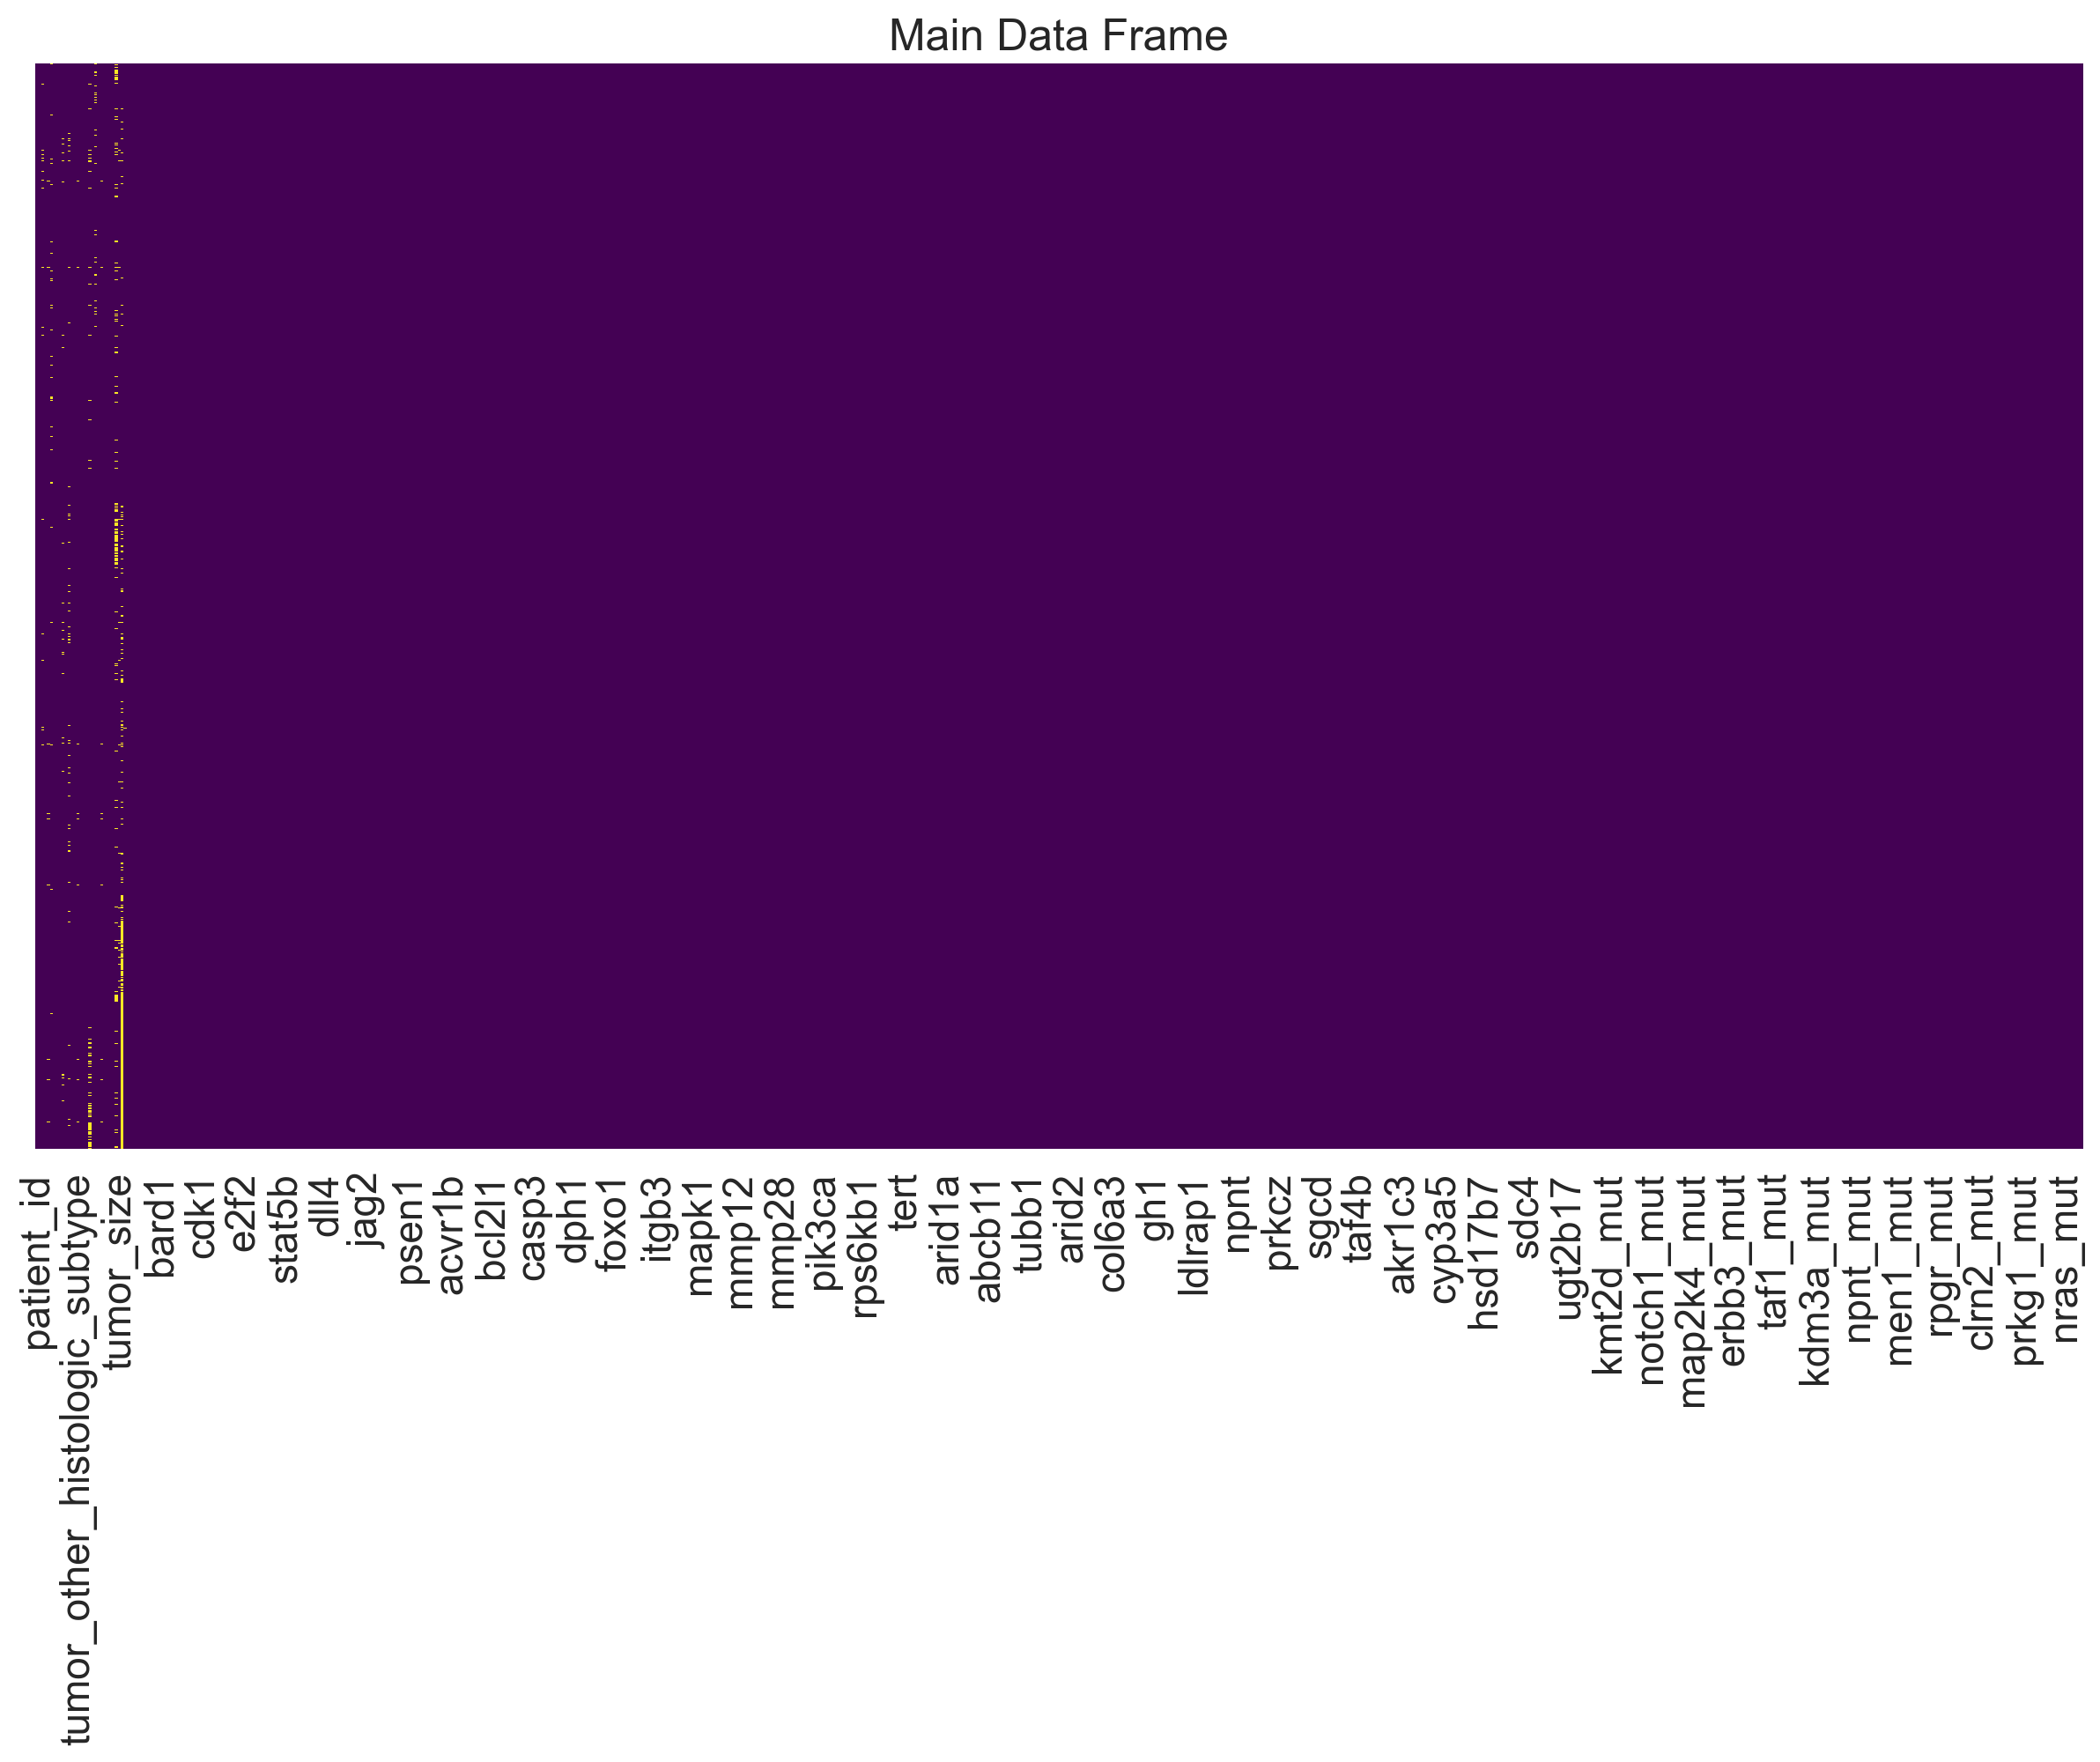

In [9]:
# Visualization of missing data
fig, ax = plt.subplots( figsize = (15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame')
plt.show();

The genetic data in the dataframe is complete with no missing data. However, the clinical data has some categorical clinical features that had up to 26% missing data (tumor_stage column has 26% missing data, while 3-gene_classifier_subtype has 10.7% missing data, and primary_tumor_laterality contains 3.7% missing data). There are 9 features that contains around 3 -0.001% missing data, and the rest of the features are complete. 

<a name="Exploratory_Data_Analysis"></a>
## Exploratory Data Analysis  and Data Visualization


<a name="clinical"></a>
### a) Relationship between clinical attributes and outcomes

In [10]:
# create a new dataframe for clinical attributes only
clinical_features_to_drop = df.columns[31:] # non clinical attributes
clinical_df = df.drop(clinical_features_to_drop, axis=1)
clinical_df.head()

patient_id  age_at_diagnosis type_of_breast_surgery    cancer_type  \
0           0             75.65             MASTECTOMY  Breast Cancer   
1           2             43.19      BREAST CONSERVING  Breast Cancer   
2           5             48.87             MASTECTOMY  Breast Cancer   
3           6             47.68             MASTECTOMY  Breast Cancer   
4           8             76.97             MASTECTOMY  Breast Cancer   

                        cancer_type_detailed cellularity  chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN             0   
1           Breast Invasive Ductal Carcinoma        High             0   
2           Breast Invasive Ductal Carcinoma        High             1   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate             1   
4  Breast Mixed Ductal and Lobular Carcinoma        High             1   

  pam50_+_claudin-low_subtype  cohort er_status_measured_by_ihc  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  nottingham_prognostic_index  oncotree_code overall_survival_months  \
0                       6.044            IDC              140.500000   
1                       4.020            IDC               84.633333   
2                       4.030            IDC              163.700000   
3                       4.050           MDLC              164.933333   
4                       6.080           MDLC               41.366667   

  overall_survival pr_status  radio_therapy 3-gene_classifier_subtype  \
0                1  Negative              1                 ER-/HER2-   
1                1  Positive              1     ER+/HER2- High Prolif   
2                0  Positive              0                       NaN   
3                1  Positive              1                       NaN   
4                0  Positive              1     ER+/HER2- High Prolif   

  tumor_size tumor_stage  death_from_cancer  
0       22.0         2.0             Living  
1       10.0         1.0             Living  
2       15.0         2.0    Died of Disease  
3       25.0         2.0             Living  
4       40.0         2.0    Died of Disease  

[5 rows x 31 columns]

In [11]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

- #### The Distribution of Clinical Columns in the Dataframe

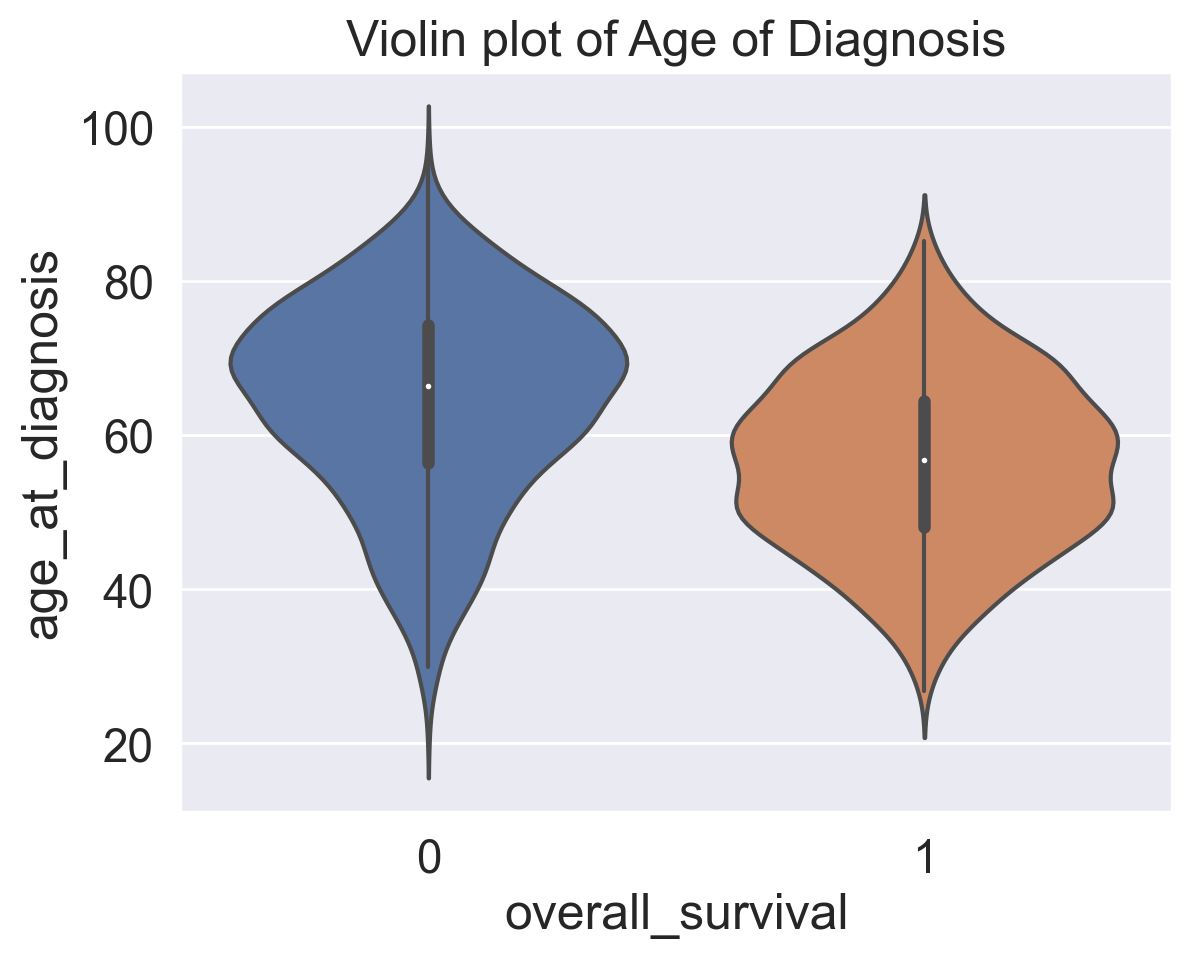

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x=clinical_df["overall_survival"], y=clinical_df["age_at_diagnosis"])
plt.title("Violin plot of Age of Diagnosis")
plt.show()

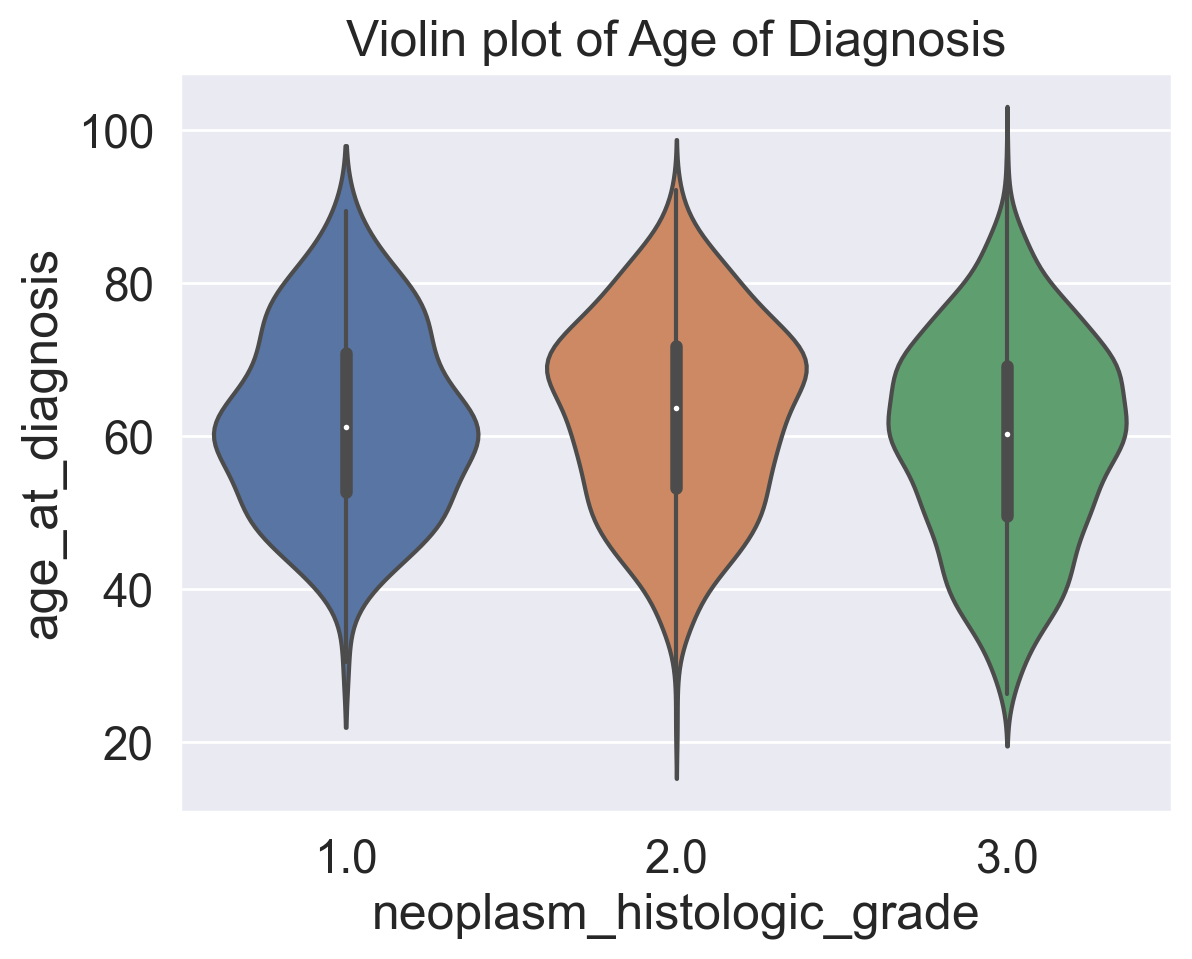

In [17]:
sns.violinplot(x=clinical_df["neoplasm_histologic_grade"], y=clinical_df["age_at_diagnosis"])
plt.title("Violin plot of Age of Diagnosis agains histologic grade")
plt.show()

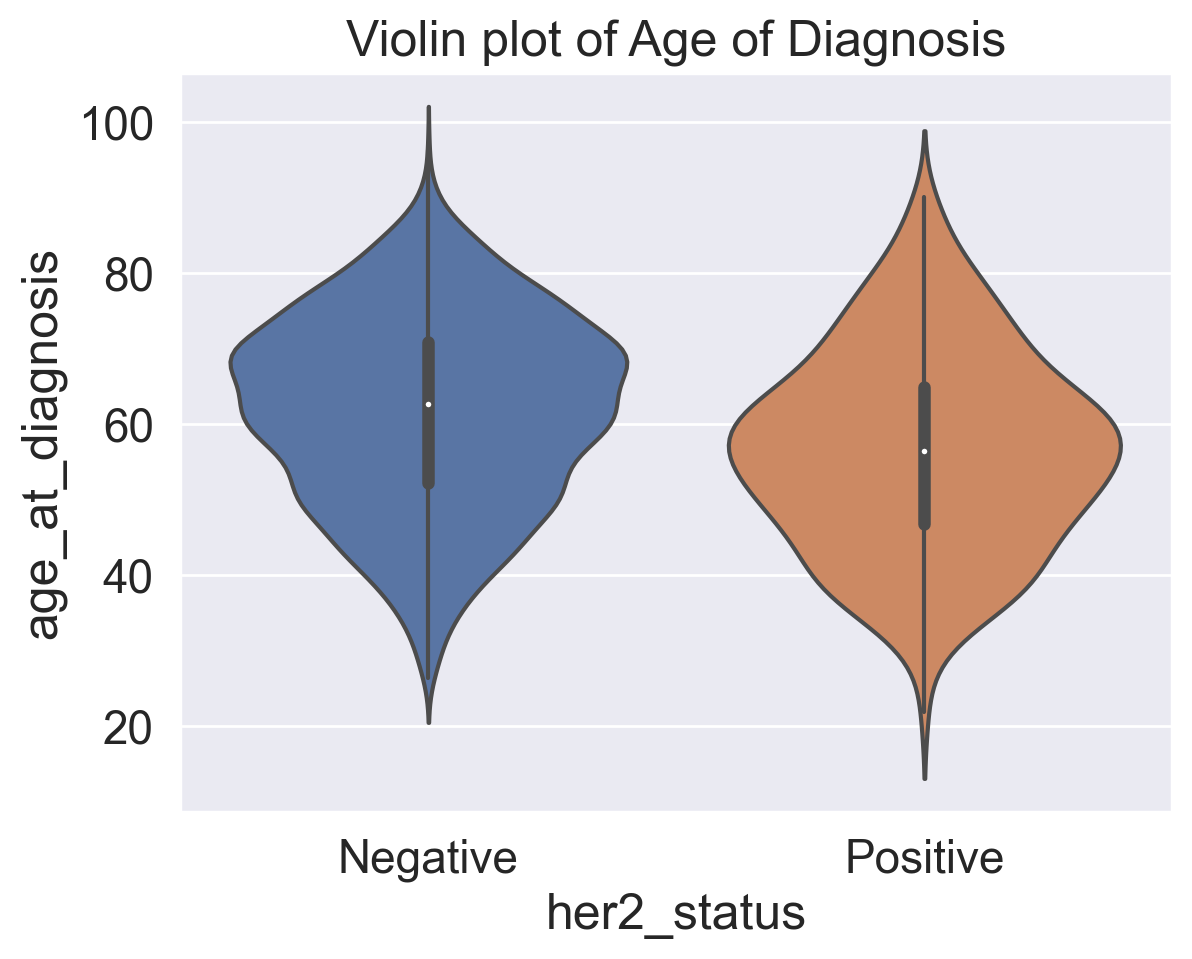

In [18]:
sns.violinplot(x=clinical_df["her2_status"], y=clinical_df["age_at_diagnosis"])
plt.title("Violin plot of Age of Diagnosis agains HER2 status")
plt.show()

In [12]:
# a function that takes a dataframe and transforms it into a standard form after dropping nun_numirical columns
def to_standard (df):
    
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

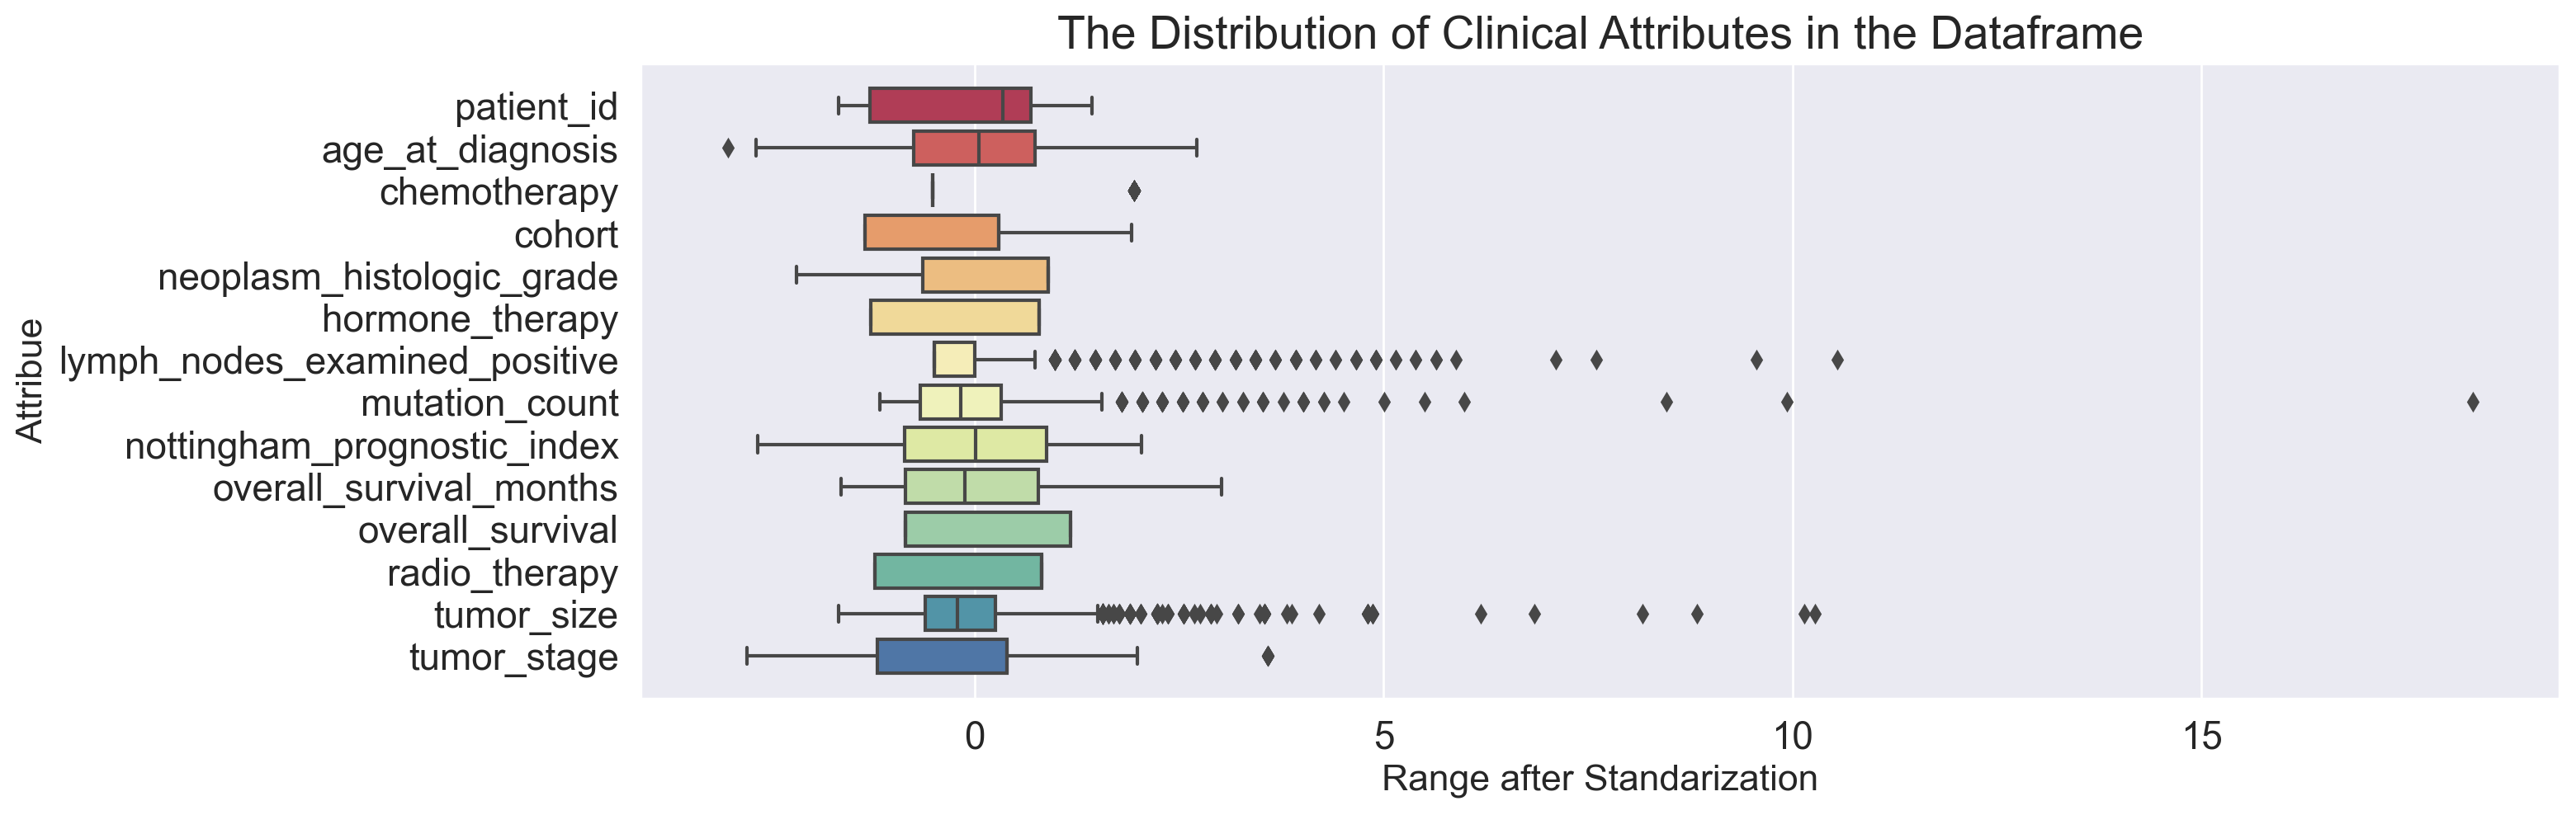

In [13]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.title('The Distribution of Clinical Attributes in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_df)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

For the distribution of all numerical data, some of them are normally distributed (like tumor_stage, and age_at_diagnosis), but  most of the features are right skewed with a lot of outliers (lymph_nodes_examined_positive, mutation_count, and tumor_size).   We decided to keep the outliers, as they are very important in healthcare data. 

- #### The Distribution of the Two Target Classes in Numerical Clinical Columns in the Dataframe

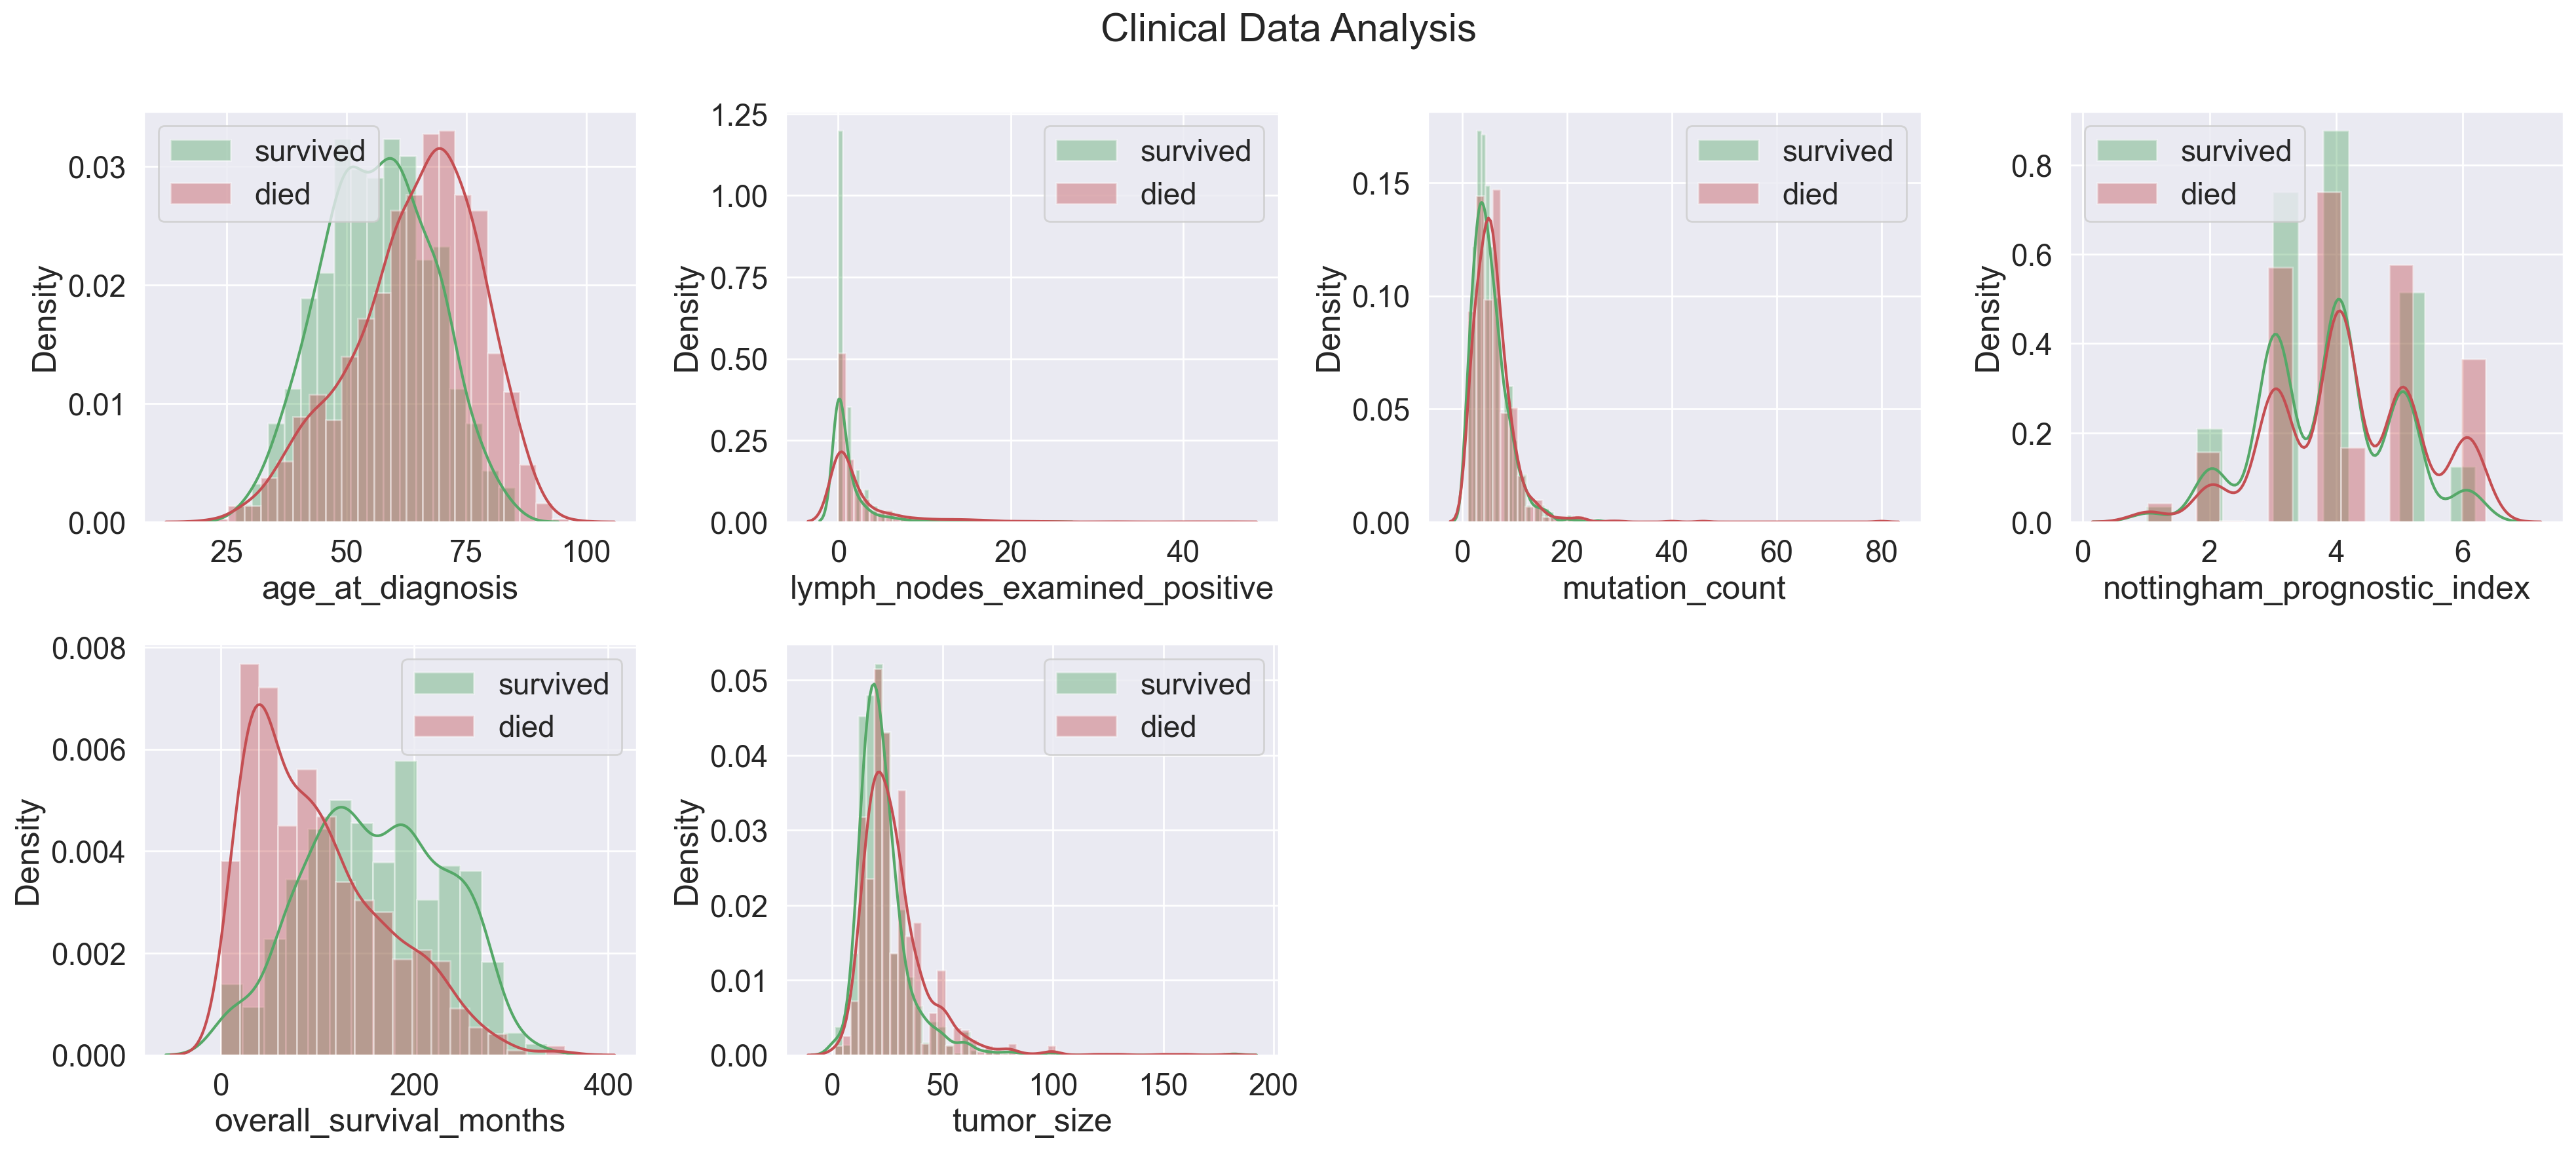

In [14]:
fig = plt.figure(figsize = (20, 25))
j = 0
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for i in clinical_df[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==1], color='g', label = 'survived')
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==0], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

- #### Visualizations Clinical Columns in the Dataframe

In [15]:
died = clinical_df[clinical_df['overall_survival']==0]
survived = clinical_df[clinical_df['overall_survival']==1]

alive = clinical_df[clinical_df['death_from_cancer']=='Living']
died_cancer = clinical_df[clinical_df['death_from_cancer']=='Died of Disease']
died_not_cancer = clinical_df[clinical_df['death_from_cancer']=='Died of Other Causes']

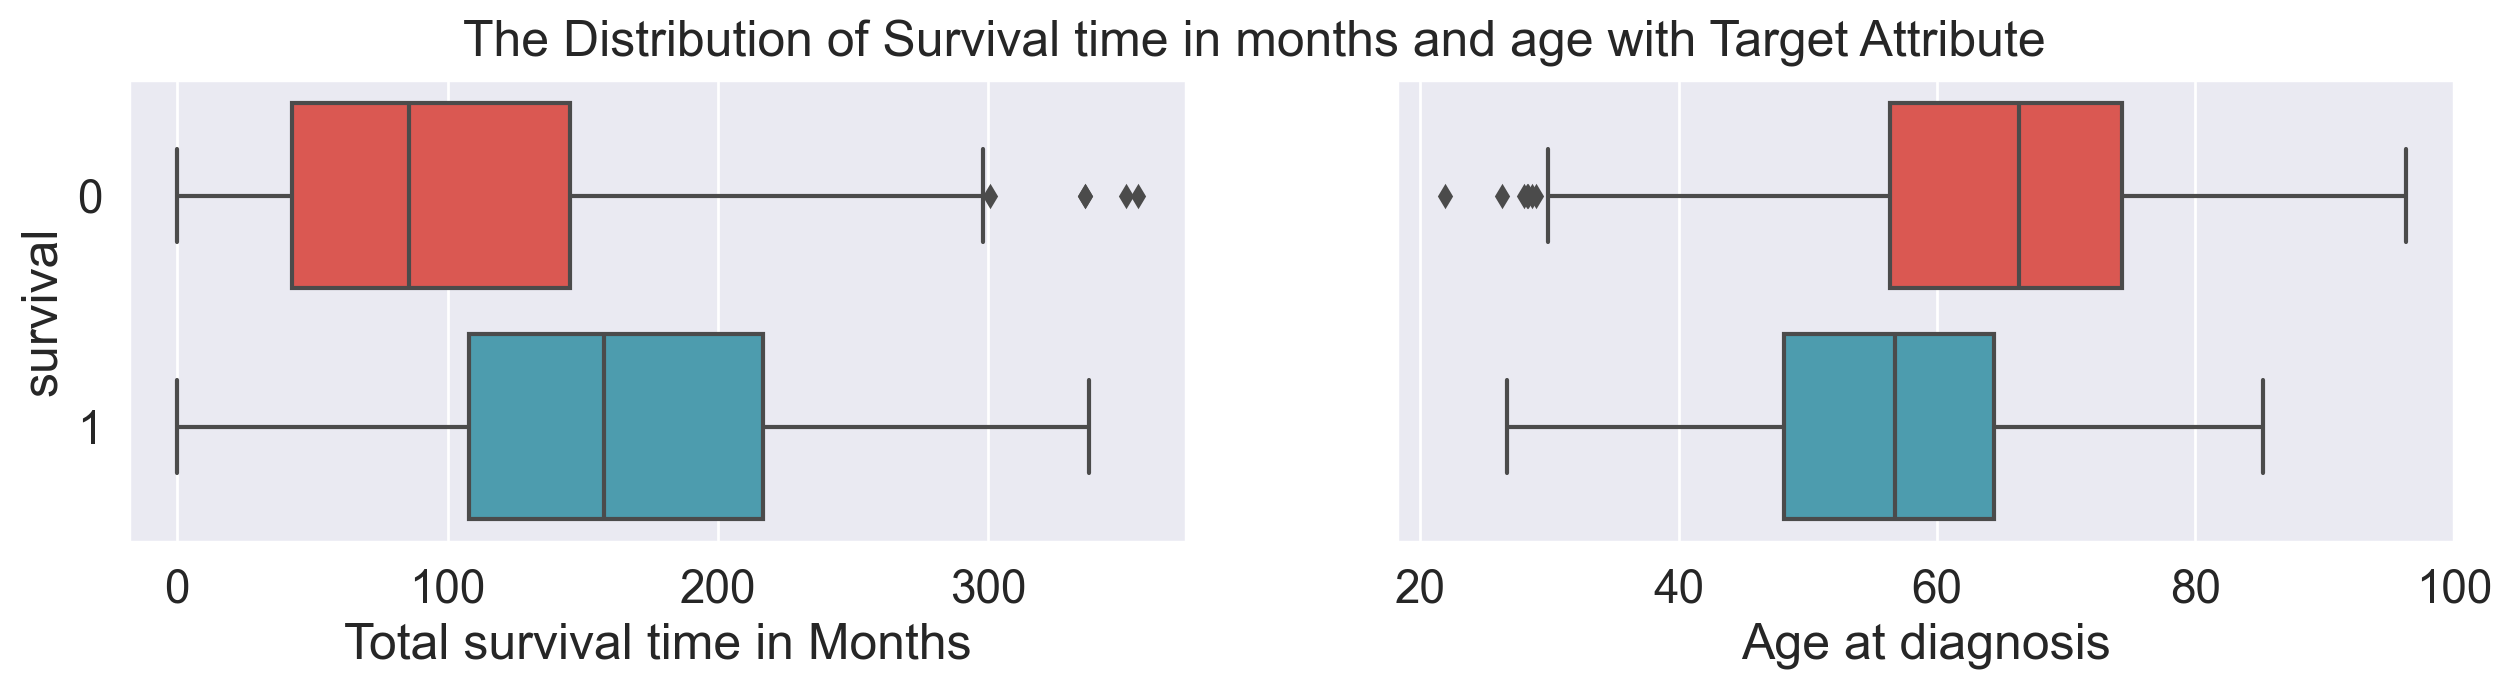

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=clinical_df, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_df, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time in months and age with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

To compare between the two classes of patients who survived and patients who did not, we can see the difference between the two distributions in age_at_diagnosis column, as patients who were younger when diagnosed with breast cancer were more likely to survive. Also, the duration from the time of the intervention to death or to current time is longer in the patients who survive. That means that pateints are either dying early from breast cancer or surviving.

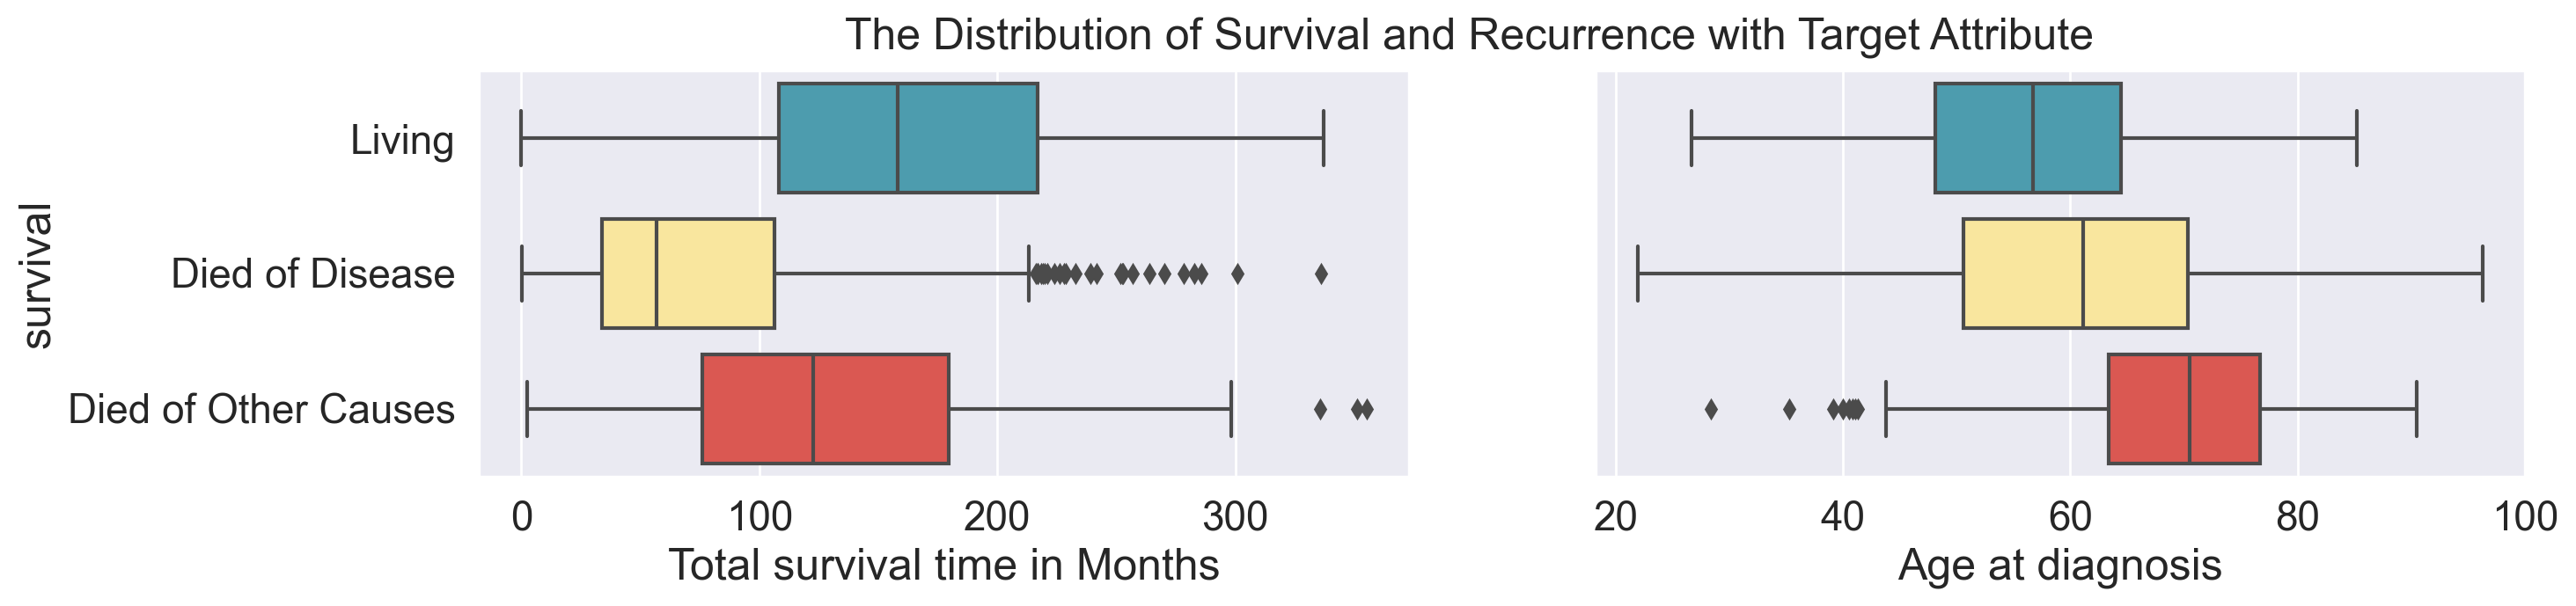

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=clinical_df, ax=ax[0], palette = three_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=clinical_df, ax=ax[1], palette = three_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

The variable 'death_from_cancer' shows us if the patient is alive or died from cancer or its complications or died of other causes. From the distribution of the three classes, we can see that the median of the survival time in months of patients who died from breast cancer is low compared to the other two classes, and its distribution os right-skewed with a lot of outliers. Also, patients who died from other causes than cancer tend to be older than the other two classes. The distribution of it is left-skewed with some younger outliers.

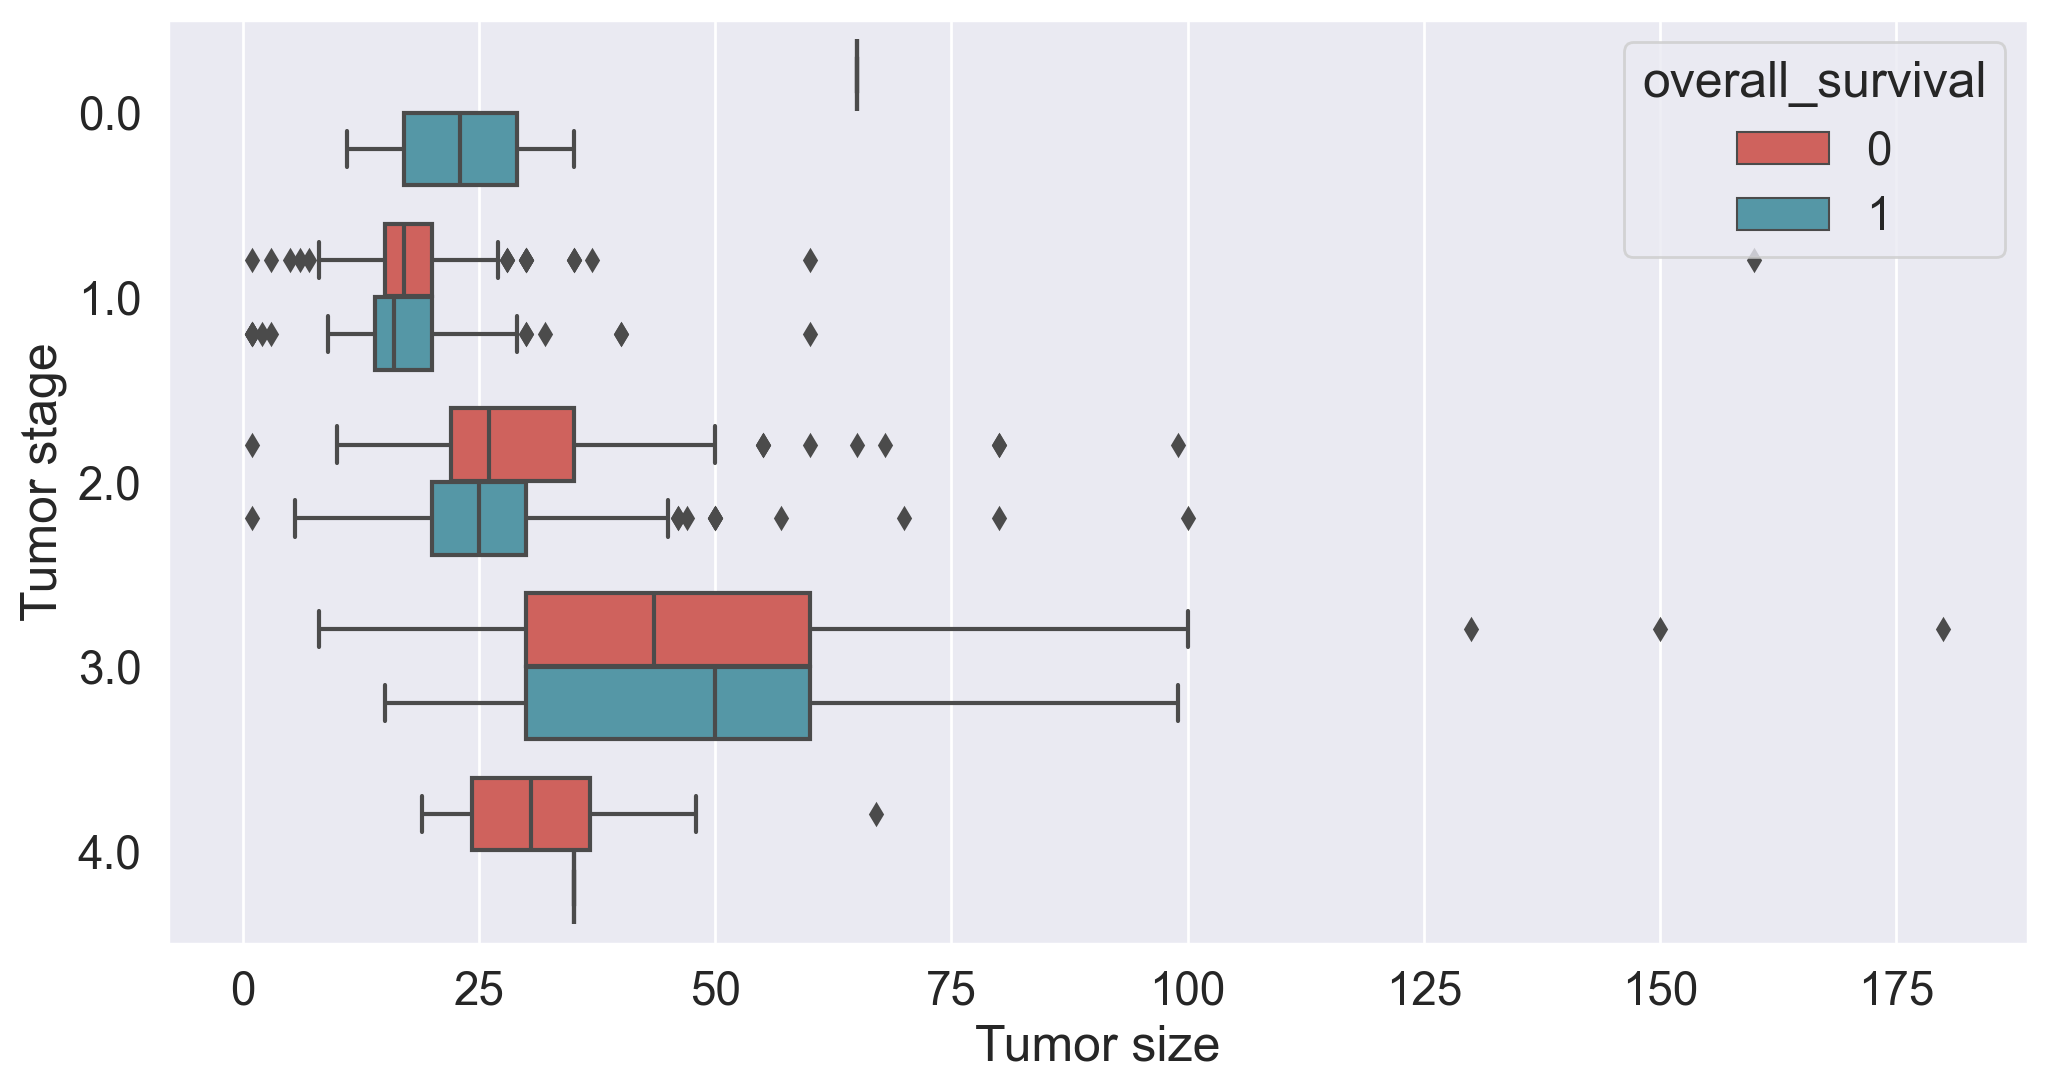

In [18]:
ig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_size', y ='tumor_stage',  data = clinical_df, orient='h', hue='overall_survival', palette=two_colors)

ax.set_ylabel('Tumor stage')
ax.set_xlabel('Tumor size')
fig.suptitle('Tumor stage vs. Tumor size and overall_survival', fontsize=20)

#legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As the Tumer stage increases the tumor size increases as well. Also, if lower tumor stages the probability of survival is higher than when the patient reaches the fourth stage 

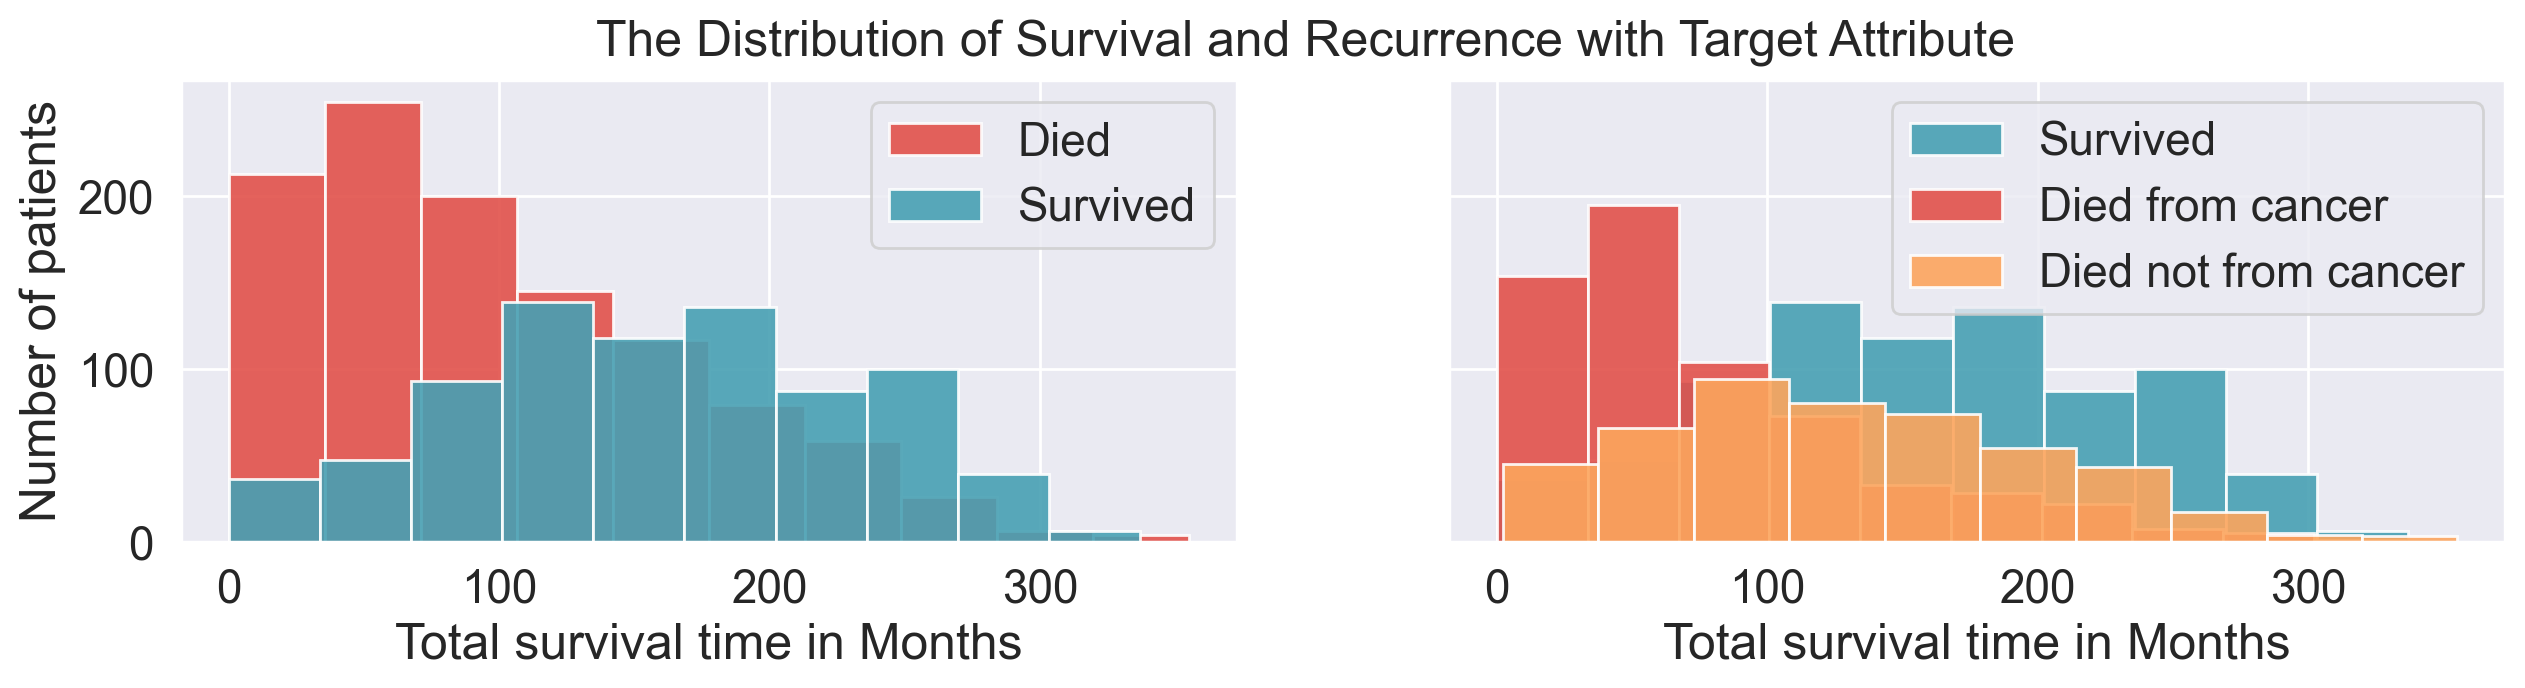

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Total survival time in Months')
ax[1].set_ylabel('')

plt.show()

When the total survival time in months increases, the probability of survival increases as well, and the probability of dying from reasons other than cancer decrease with time slightly.

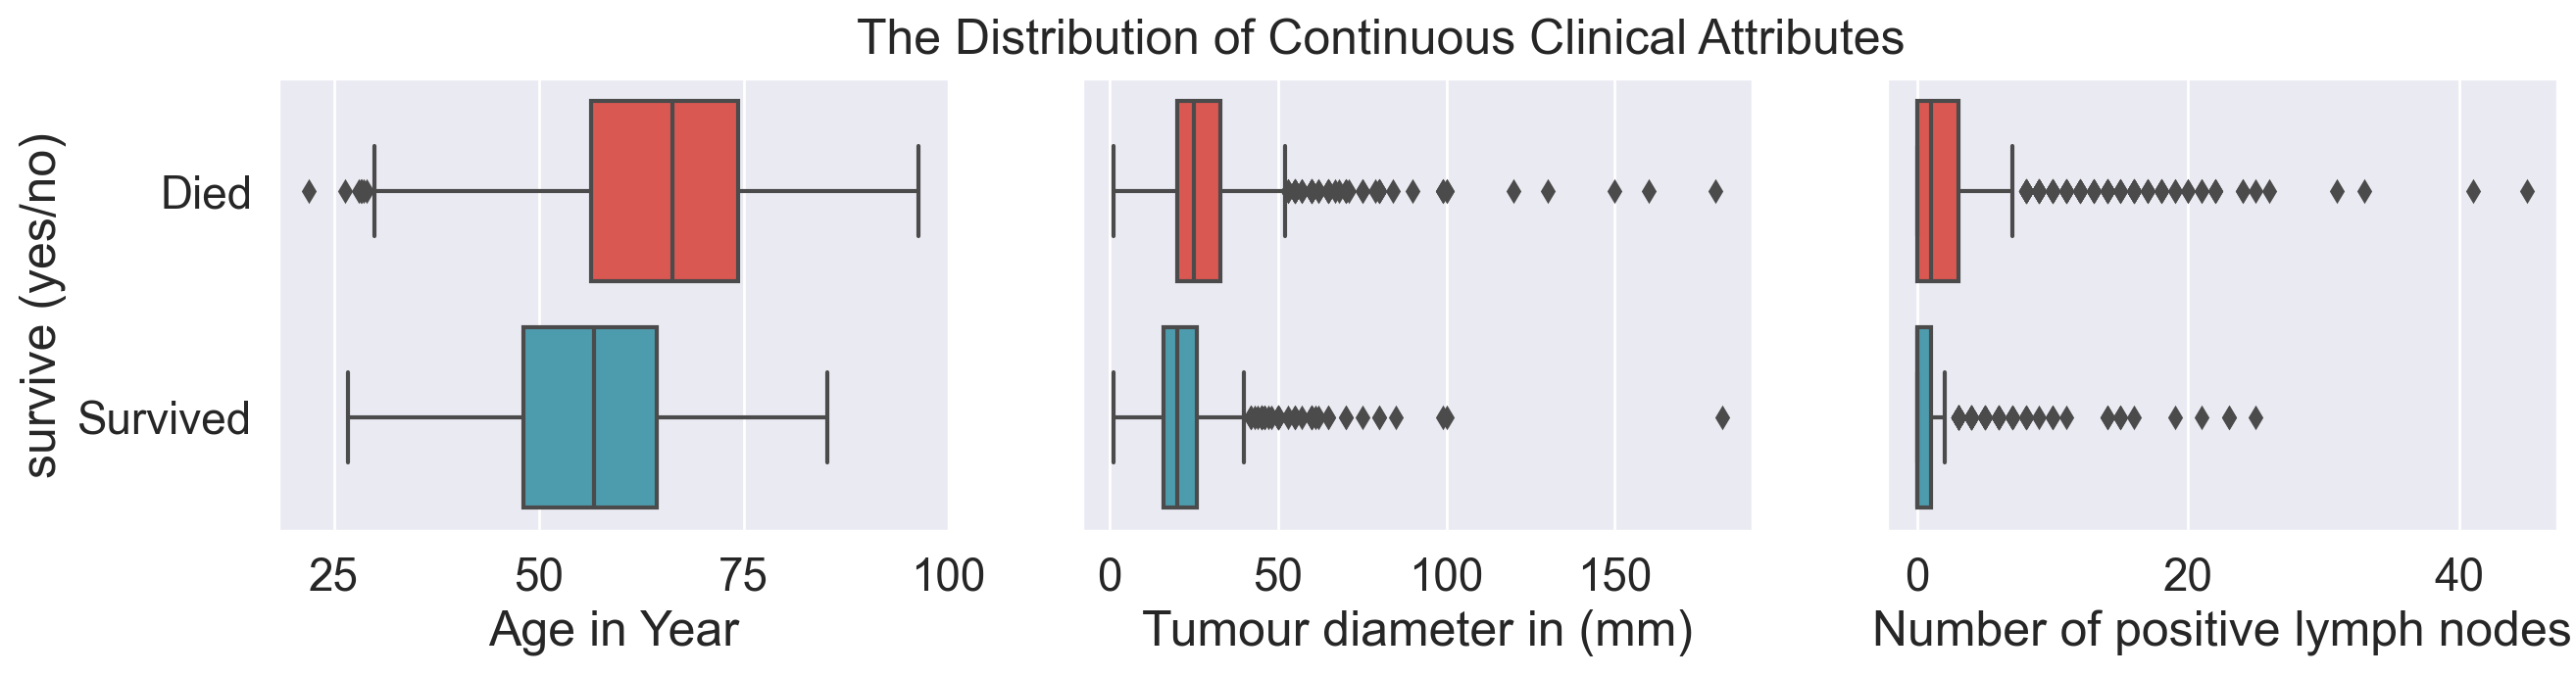

In [20]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3), sharey=True)

sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_df, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=clinical_df, ax=ax[1], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=clinical_df, ax=ax[2], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])
ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('survive (yes/no)')

ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')

ax[2].set_xlabel('Number of positive lymph nodes')
ax[2].set_ylabel('')

plt.show()

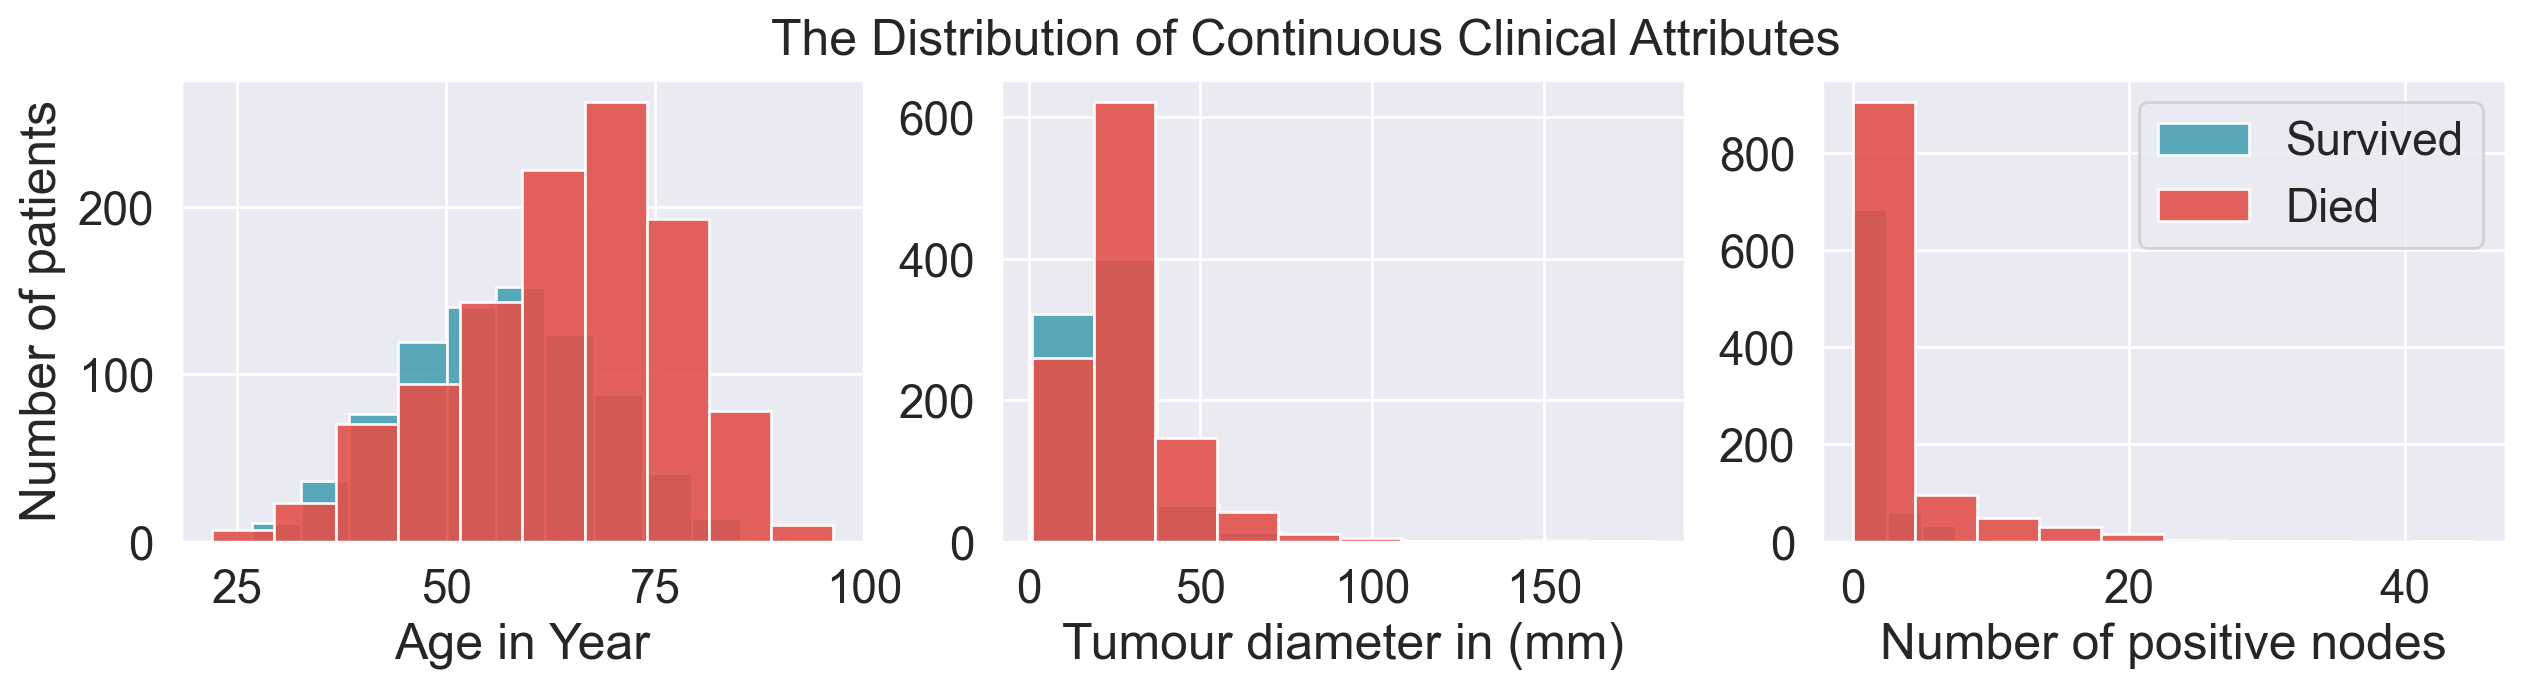

In [21]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

The median of tumor size and the number of positive lymph nodes is lower in the survived class than the died class.

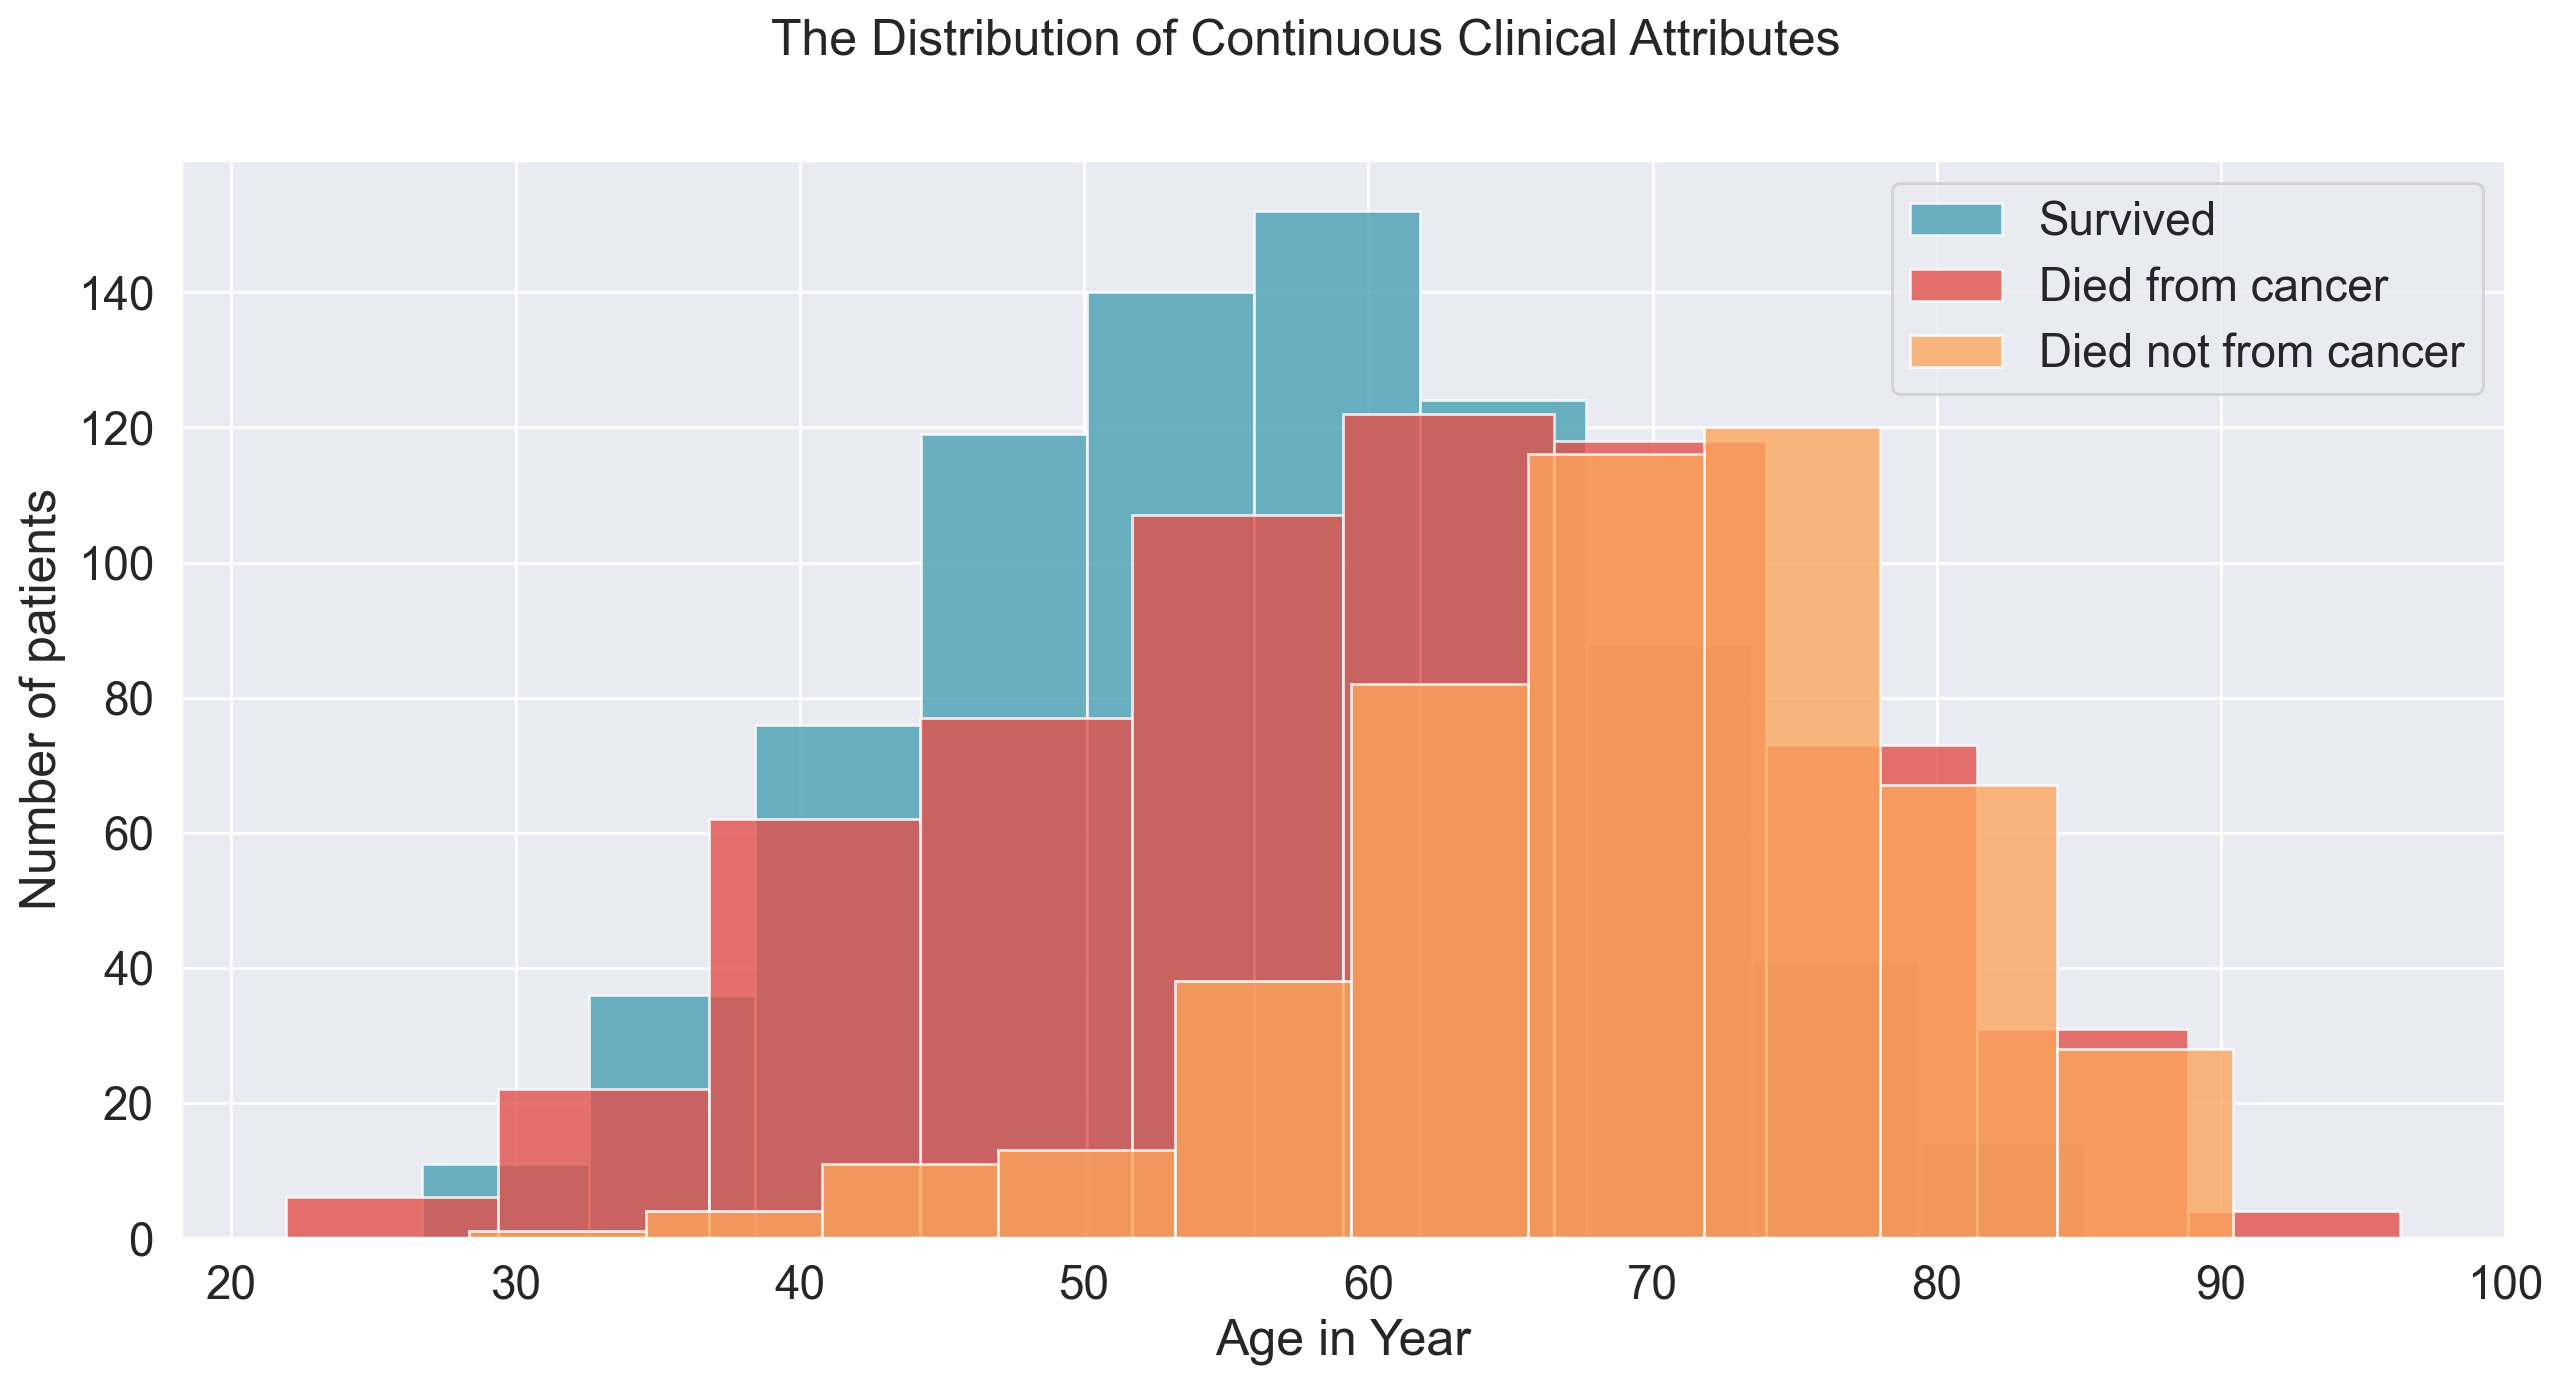

In [39]:
fig, ax = plt.subplots(ncols=1, figsize=(15,7))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax.hist(alive['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax.hist(died_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax.hist(died_not_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax.legend()

# ax[1].hist(alive['tumor_size'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
# ax[1].hist(died_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
# ax[1].hist(died_not_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
# #ax[1].legend()

# ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
# ax[2].hist(died_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
# ax[2].hist(died_not_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
# ax[2].legend()

ax.set_xlabel('Age in Year')
ax.set_ylabel('Number of patients')
# ax[1].set_xlabel('Tumour diameter in (mm)')
# ax[1].set_ylabel('')
# ax[2].set_xlabel('Number of positive nodes')
# ax[2].set_ylabel('')

plt.show()

KeyError: 0

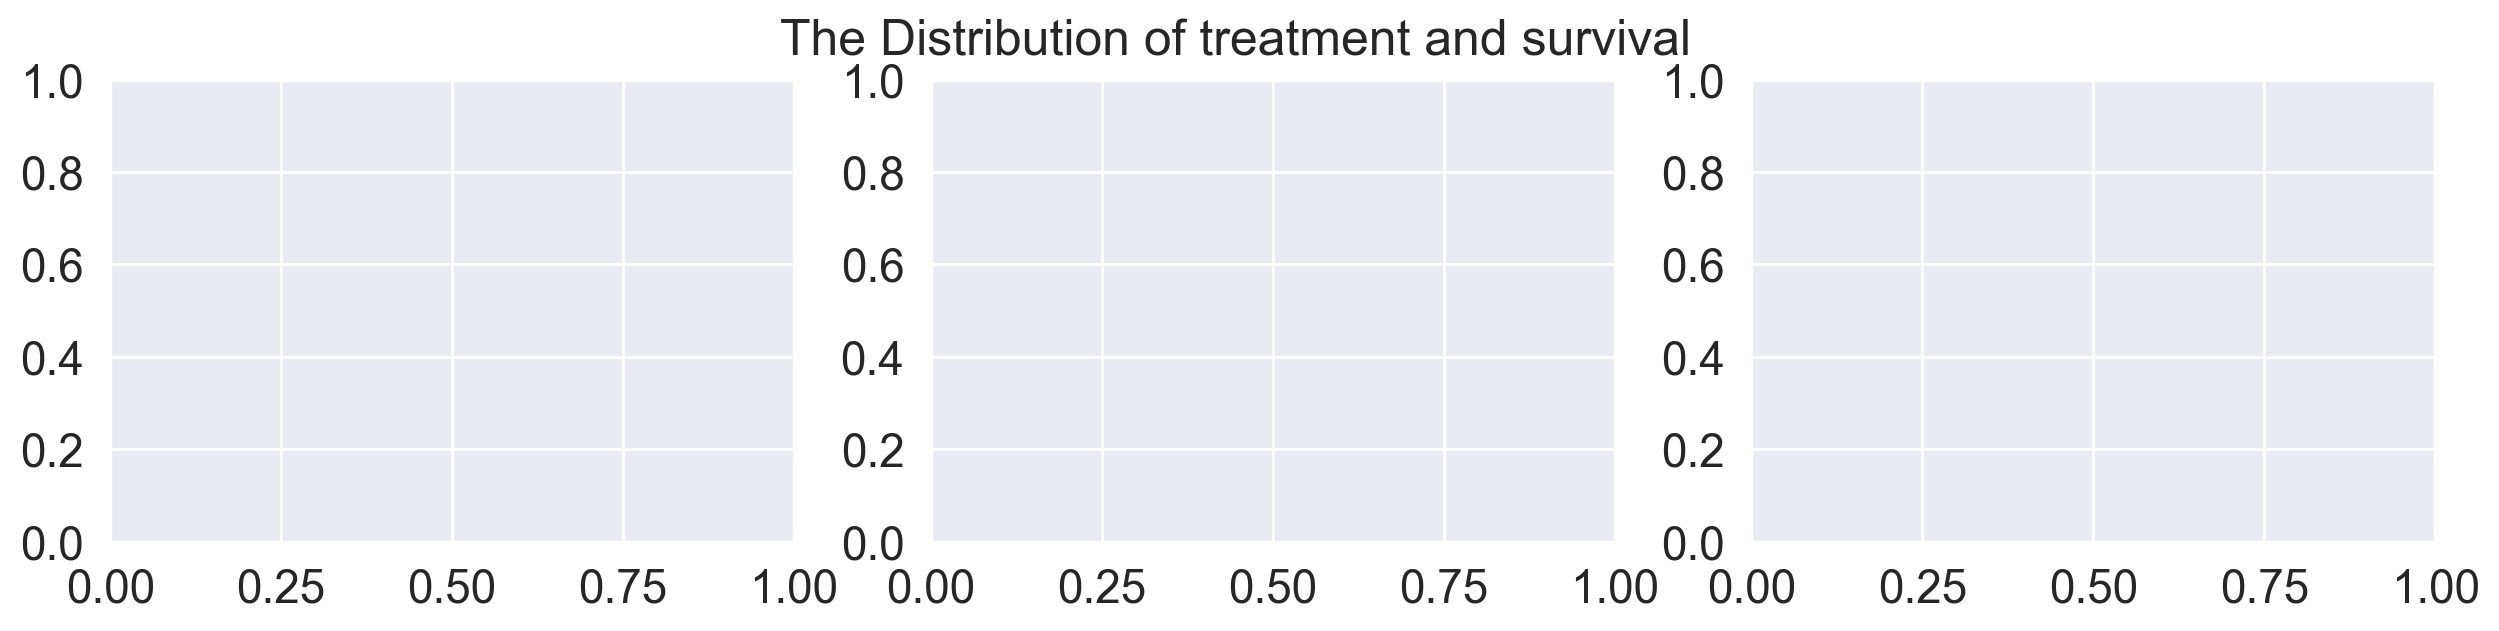

In [35]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

sns.countplot(died['chemotherapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[0], saturation=0.90)
sns.countplot(x= survived['chemotherapy'] , color=sns.color_palette(color)[5], label='Survived', ax=ax[0], saturation=0.90)

#ax[0].legend()
ax[0].set(xticklabels=['No','Yes'])

sns.countplot(died['hormone_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[1], saturation=0.90)
sns.countplot(x=  survived['hormone_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[1], saturation=0.90)

ax[1].legend()
ax[1].set(xticklabels=['No','Yes'])

sns.countplot(died['radio_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[2], saturation=0.90)
sns.countplot(x=  survived['radio_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[2], saturation=0.90)

#ax[2].legend()
ax[2].set(xticklabels=['No','Yes'])

ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()

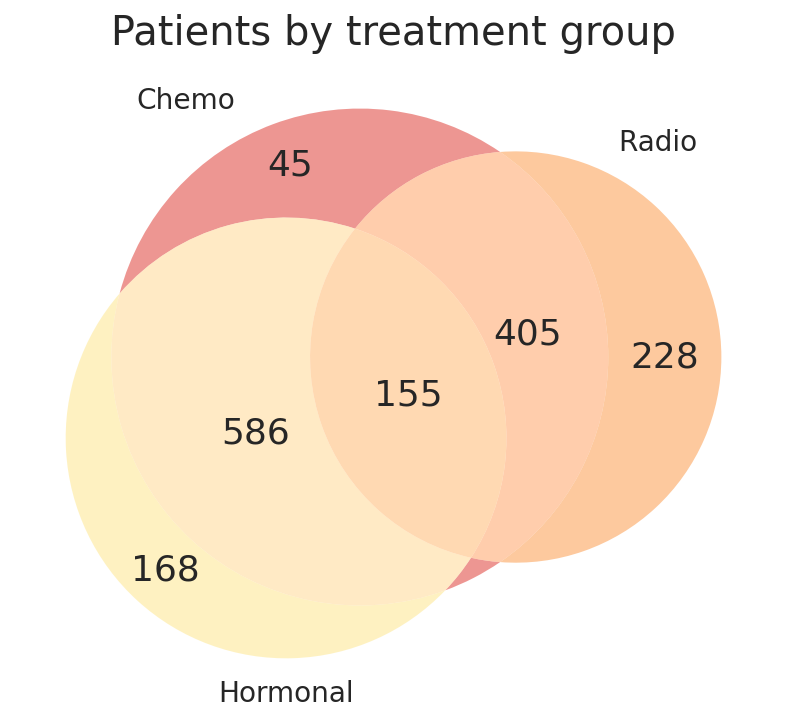

In [ ]:
#visualise the treatments and proportion death for other groups using venn diagram

#first create subsets for different combinations of treatments
chemo = clinical_df[(clinical_df["chemotherapy"]==True) & (clinical_df["radio_therapy"]==False) & (clinical_df["hormone_therapy"]==False)]
radio = clinical_df[(clinical_df["chemotherapy"]==False) & (clinical_df["radio_therapy"]==True) & (clinical_df["hormone_therapy"]==False)]
hormonal = clinical_df[(clinical_df["chemotherapy"]==False) & (clinical_df["radio_therapy"]==False) & (clinical_df["hormone_therapy"]==True)]
chemo_radio = clinical_df[(clinical_df["chemotherapy"]==True) & (clinical_df["radio_therapy"]==True) & (clinical_df["hormone_therapy"]==False)]
radio_hormonal = clinical_df[(clinical_df["chemotherapy"]==False) & (clinical_df["radio_therapy"]==True) & (clinical_df["hormone_therapy"]==True)]
hormonal_chemo = clinical_df[(clinical_df["chemotherapy"]==True) & (clinical_df["radio_therapy"]==False) & (clinical_df["hormone_therapy"]==True)]
all_3 = clinical_df[(clinical_df["chemotherapy"]==True) & (clinical_df["radio_therapy"]==True) & (clinical_df["hormone_therapy"]==True)]

#calculate number of people for each combination and proportion death
df_subsets = [chemo, radio, hormonal, chemo_radio, radio_hormonal, hormonal_chemo, all_3]
sizes=[]
proportiondeath=[]
for dataframe in df_subsets:
    sizes.append(np.shape(dataframe)[0])
    proportiondeath.append(np.mean(dataframe["overall_survival"]))

#set size of circles relative to size of each subset (where possible)
#set gradient of blue according to proportion of death in subset calculated above
fig, ax = plt.subplots(figsize=(8,6))
v = venn3(subsets=sizes, set_labels=("Chemo", "Radio ", "Hormonal"), ax=ax, alpha=0.6, set_colors= sns.color_palette(color))

for text in v.set_labels:
    text.set_fontsize(14)
    
ax.set_title("Patients by treatment group", size=20)
plt.show()

Venn diagram for the three different treatments for breast cancer and the distribution of patients amongst them. we can see that most patients either have chemo and hormonal therapy or chemo and radio therapy. there is a group that is not shown here in the diagram, which are the patients that did not receive any of the three treatments. they were 289 patients and their survival rate was slightly lower than the rest of patients. 

AttributeError: 'numpy.int64' object has no attribute 'startswith'

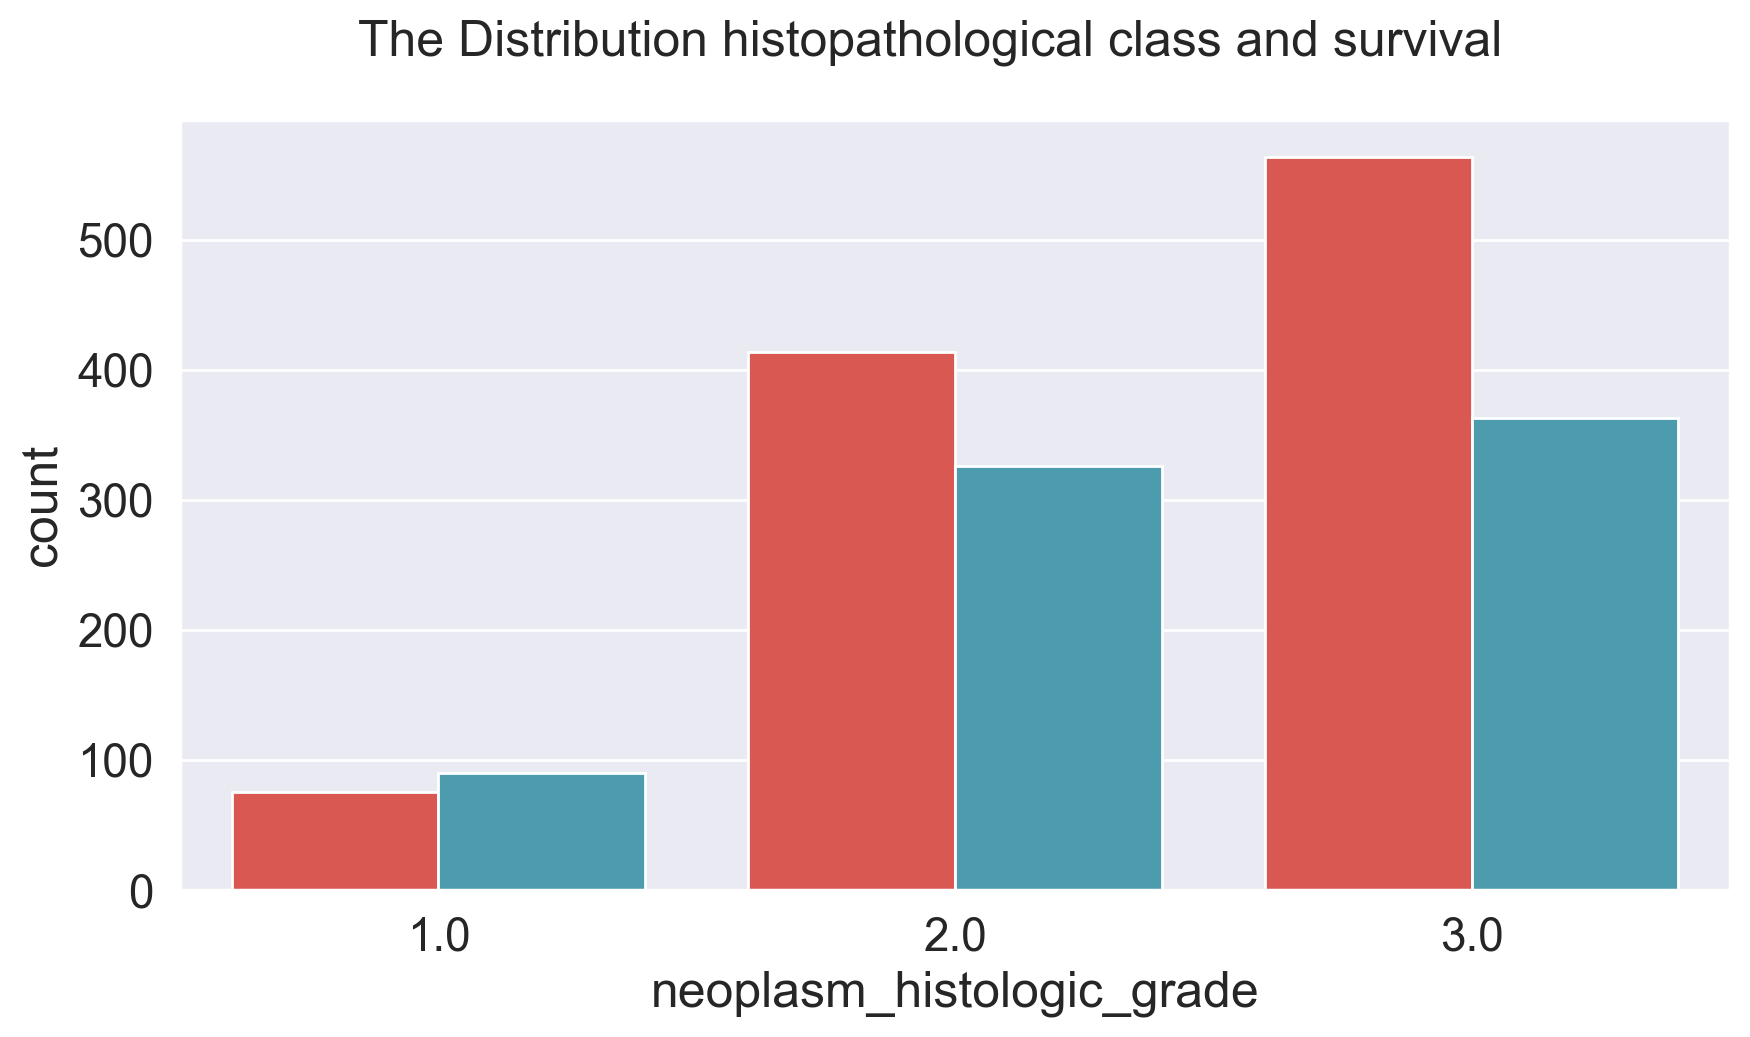

In [32]:
fig, ax = plt.subplots( figsize=(10,5))
fig.suptitle('The Distribution histopathological class and survival', fontsize = 18)

sns.countplot(x='neoplasm_histologic_grade', hue='overall_survival' ,data = clinical_df, palette=two_colors , ax=ax, saturation=0.90)
ax.legend([ 'Died', 'Survived'])

ax.set_xlabel('histopathological class')
ax.set_ylabel('Number of patients')

plt.show()

- #### Visualize Correlation of between the Clinical Attributes

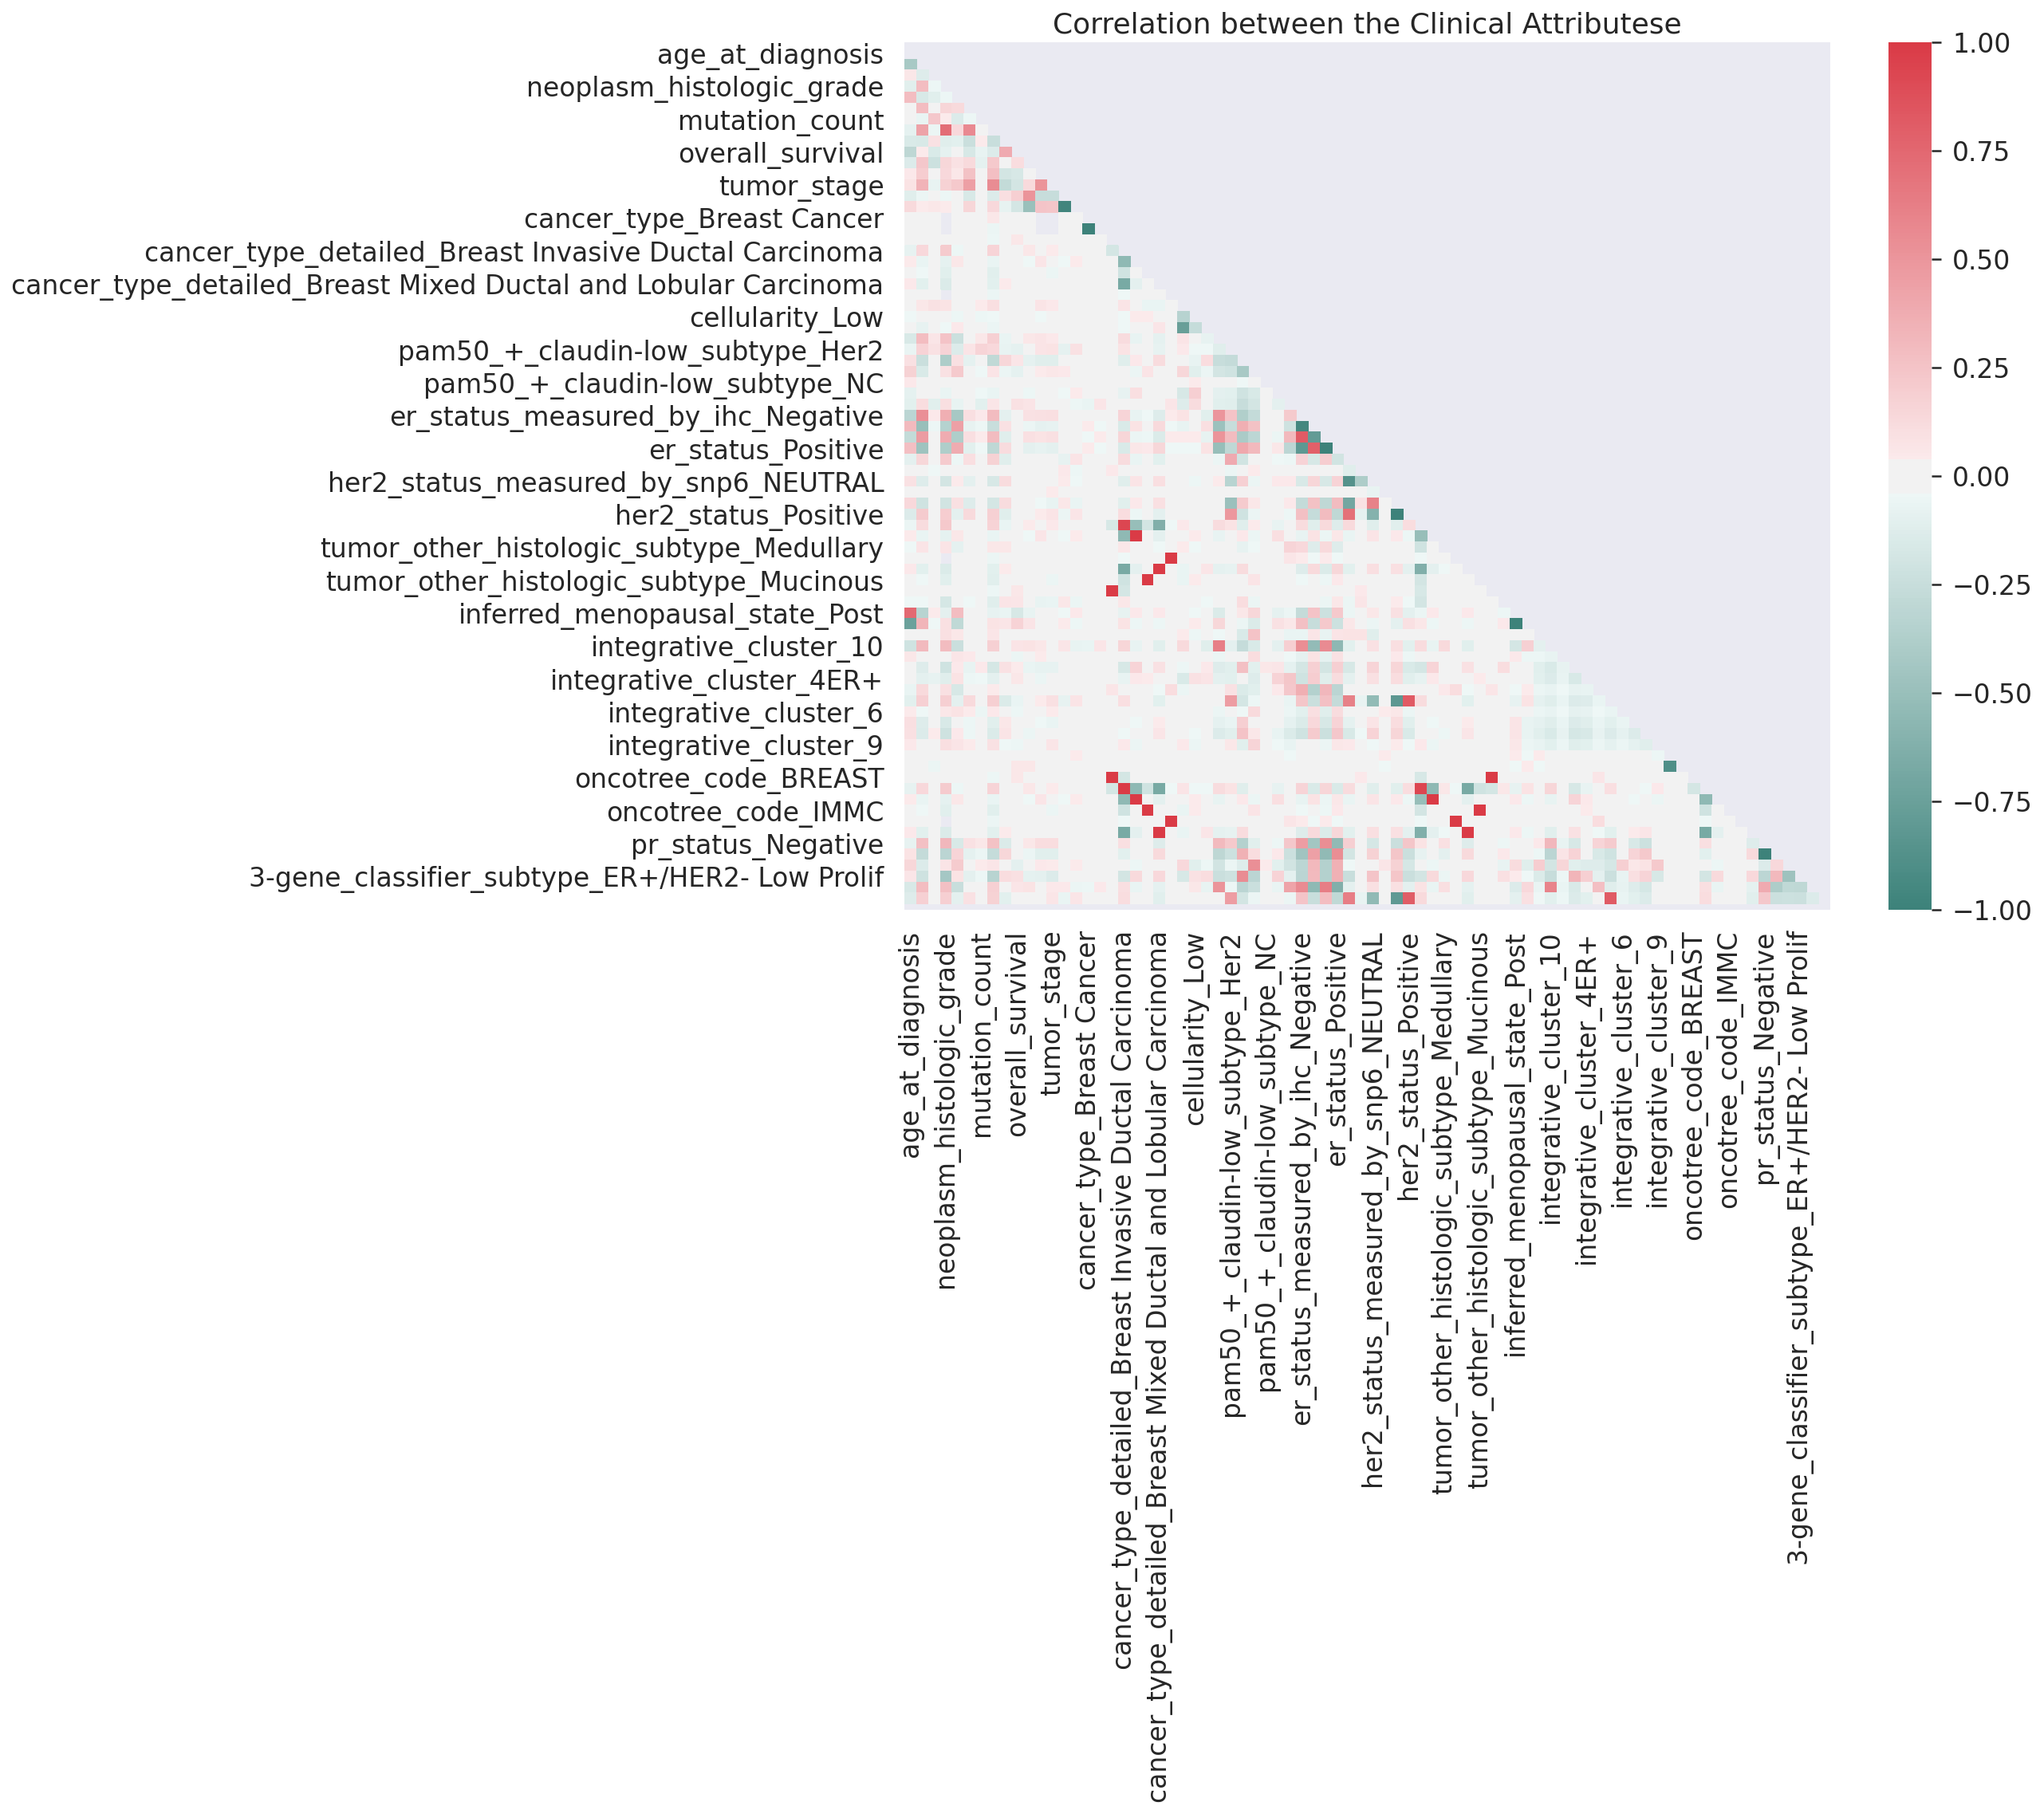

In [ ]:
fig, axs = plt.subplots(figsize = (13, 10)) 
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
no_id_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns)
#no_id_clinical_df= clinical_df.drop('ID',axis=1 )
mask = np.triu(np.ones_like(no_id_clinical_df.corr(), dtype = np.bool))
sns.heatmap(no_id_clinical_df.corr(), ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation between the Clinical Attributese')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We can see that there is high correlation between some of the columns. 

- #### Correlation between the Clinical Attributes and survival

In [ ]:
Corr_survival = no_id_clinical_df.corr()['overall_survival'].sort_values(ascending = False)
Corr_df = pd.DataFrame({'Correlation':Corr_survival})
Corr_df.head(10)

Correlation
overall_survival                                   1.000000
overall_survival_months                            0.384467
type_of_breast_surgery_BREAST CONSERVING           0.187856
inferred_menopausal_state_Pre                      0.170915
radio_therapy                                      0.112083
3-gene_classifier_subtype_ER+/HER2- Low Prolif     0.094463
pam50_+_claudin-low_subtype_claudin-low            0.091397
integrative_cluster_10                             0.076256
pam50_+_claudin-low_subtype_LumA                   0.065186
3-gene_classifier_subtype_ER-/HER2-                0.065135

In [ ]:
Corr_df.tail()

Correlation
lymph_nodes_examined_positive        -0.164498
inferred_menopausal_state_Post       -0.170915
type_of_breast_surgery_MASTECTOMY    -0.184259
tumor_stage                          -0.188790
age_at_diagnosis                     -0.303666

There is a positive correlation between survival and overall survival in months, conserving surgery type, pre menopaus status, but a negative correlation between survival and lymph nodes examined positive, mastectomy surgery type, tumor stage, and age at diagnosis.

- ####  Statistical Summaries of Clinical Columns in the Dataframe

In [ ]:
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
cat_clinical_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade','hormone_therapy', 'overall_survival', 'radio_therapy', 'tumor_stage' ]
# Statistical summary for numerical clinical attributes 
clinical_df[num_clinical_columns].describe(). T

count        mean        std    min     25%  \
age_at_diagnosis               1904.0   61.087054  12.978711  21.93  51.375   
lymph_nodes_examined_positive  1904.0    2.002101   4.079993   0.00   0.000   
mutation_count                 1859.0    5.697687   4.058778   1.00   3.000   
nottingham_prognostic_index    1904.0    4.033019   1.144492   1.00   3.046   
overall_survival_months        1904.0  125.121324  76.334148   0.00  60.825   
tumor_size                     1884.0   26.238726  15.160976   1.00  17.000   

                                      50%         75%     max  
age_at_diagnosis                61.770000   70.592500   96.29  
lymph_nodes_examined_positive    0.000000    2.000000   45.00  
mutation_count                   5.000000    7.000000   80.00  
nottingham_prognostic_index      4.042000    5.040250    6.36  
overall_survival_months        115.616667  184.716667  355.20  
tumor_size                      23.000000   30.000000  182.00

In [ ]:
# Statistical summary for categorical clinical attributes 
cat_clinical_columns.extend(clinical_df.select_dtypes(include=['object']).columns.tolist())
clinical_df[cat_clinical_columns].astype('category').describe().T

count unique                               top  \
chemotherapy                    1904      2                                 0   
cohort                          1904      5                                 3   
neoplasm_histologic_grade       1832      3                                 3   
hormone_therapy                 1904      2                                 1   
overall_survival                1904      2                                 0   
radio_therapy                   1904      2                                 1   
tumor_stage                     1403      5                                 2   
type_of_breast_surgery          1882      2                        MASTECTOMY   
cancer_type                     1904      2                     Breast Cancer   
cancer_type_detailed            1889      6  Breast Invasive Ductal Carcinoma   
cellularity                     1850      3                              High   
pam50_+_claudin-low_subtype     1904      7                              LumA   
er_status_measured_by_ihc       1874      2                           Positve   
er_status                       1904      2                          Positive   
her2_status_measured_by_snp6    1904      4                           NEUTRAL   
her2_status                     1904      2                          Negative   
tumor_other_histologic_subtype  1889      8                        Ductal/NST   
inferred_menopausal_state       1904      2                              Post   
integrative_cluster             1904     11                                 8   
primary_tumor_laterality        1798      2                              Left   
oncotree_code                   1889      6                               IDC   
pr_status                       1904      2                          Positive   
3-gene_classifier_subtype       1700      4              ER+/HER2- Low Prolif   
death_from_cancer               1903      3                            Living   

                                freq  
chemotherapy                    1508  
cohort                           734  
neoplasm_histologic_grade        927  
hormone_therapy                 1174  
overall_survival                1103  
radio_therapy                   1137  
tumor_stage                      800  
type_of_breast_surgery          1127  
cancer_type                     1903  
cancer_type_detailed            1500  
cellularity                      939  
pam50_+_claudin-low_subtype      679  
er_status_measured_by_ihc       1445  
er_status                       1459  
her2_status_measured_by_snp6    1383  
her2_status                     1668  
tumor_other_histologic_subtype  1454  
inferred_menopausal_state       1493  
integrative_cluster              289  
primary_tumor_laterality         935  
oncotree_code                   1500  
pr_status                       1009  
3-gene_classifier_subtype        619  
death_from_cancer                801

In [ ]:
#statistics for the no treatment group and comparison with the baseline
no_treatment = clinical_df[(clinical_df['chemotherapy']==0) & (clinical_df['hormone_therapy']==0) & (clinical_df['radio_therapy']==0)]
print("Number of patients who had no treatment: " , no_treatment.shape[0])
print("Proportion of survival in this group: " , ("%.3f" %np.mean(no_treatment["overall_survival"])))
print("Baseline Proportion of survival in all groups: ", ("%.3f" %np.mean(clinical_df["overall_survival"])))

Number of patients who had no treatment:  289
Proportion of survival in this group:  0.381
Baseline Proportion of survival in all groups:  0.421


- #### What are the characteristics of the average member of the population?

In [ ]:
#what the average patient looks like
print("Mean age: " + "%.3f" %np.mean(clinical_df['age_at_diagnosis']))
print("Most occurring tumour stage: " , stats.mode(clinical_df['tumor_stage'])[0][0].astype(int))
print("Most occurring histopathological type: " , stats.mode(clinical_df['neoplasm_histologic_grade'])[0][0].astype(int))
print("Mean tumour diameter: " + "%.3f" %np.mean(clinical_df['tumor_size']))
print("Probability of survival: "+ "%.3f" %(clinical_df["overall_survival"].value_counts()/clinical_df["overall_survival"].count()).iloc[1])

Mean age: 61.087
Most occurring tumour stage:  2
Most occurring histopathological type:  3
Mean tumour diameter: 26.239
Probability of survival: 0.421


The average breast cancer patient in the dataset is a 61-year-old women with a stage 2 tumor with 2 lymph nodes examined positive, with a mean tumor size of 26 mm. The patient has a probability of 76% of not having chemotherapy as a treatment, but only hormonal and radiotherapy with surgery.

- #### Number of outliers in each clinical feature

In [ ]:
#Finding number of outliers in each column
Q1 = clinical_df.quantile(0.25)
Q3 = clinical_df.quantile(0.75)
IQR = Q3 - Q1
((clinical_df < (Q1 - 1.5 * IQR)) | (clinical_df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False).head(7)

chemotherapy                     396
lymph_nodes_examined_positive    210
tumor_size                       142
mutation_count                    62
tumor_stage                        9
age_at_diagnosis                   1
er_status                          0
dtype: int64

<a name="genetic"></a>
### b) Relationship between genetic attributes and outcomes

In [ ]:
# dropping mutations
genetic_features_to_drop = df.columns[520:]
genetic_df = df.drop(genetic_features_to_drop, axis=1)
# droping clinical data
genetic_features_to_drop = genetic_df.columns[4:35]
genetic_df = genetic_df.drop(genetic_features_to_drop, axis=1)
genetic_df = genetic_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_df = genetic_df.iloc [:,:-174]
genetic_df['overall_survival']= df['overall_survival']

genetic_df.head()

patient_id    tp53     atm    cdh1   chek2     nbn     nf1   stk11   bard1  \
0           0  0.3504  1.1517  0.0348  0.1266 -0.8361 -0.8578 -0.4294 -1.1201   
1           2 -0.0136 -0.2659  1.3594  0.7961  0.5419 -2.6059  0.5120  0.4390   
2           5  0.5141 -0.0803  1.1398  0.4187 -0.4030 -1.1305  0.2362 -0.1721   
3           6  1.6708 -0.8880  1.2491 -1.1889 -0.4174 -0.6165  1.0078 -0.4010   
4           8  0.3484  0.3897  0.9131  0.9356  0.7675 -0.2940 -0.2961  0.6320   

     mlh1  ...  tubb4a  tubb4b  twist1  adgra2    afdn    aff2    agmo  \
0 -0.4844  ... -0.0250 -0.4113  2.8096  2.8014 -0.0004  0.9673  0.3011   
1  1.2266  ... -0.1003  0.7791 -0.2273 -0.4462 -1.9854  0.5022 -0.9526   
2 -1.7910  ...  1.2084 -0.6572  0.1984 -1.0721 -0.9729  0.0515  0.1109   
3 -1.3905  ...  0.3142 -0.4413  0.1932 -1.0215  0.4553 -0.2354  0.4003   
4 -0.3582  ... -0.6606 -1.4697  0.4128 -1.5326 -0.4795  1.0052  0.9739   

    agtr2   ahnak  overall_survival  
0 -0.8436  1.8227                 1  
1 -1.8435  1.6662                 1  
2  0.9874 -0.0154                 0  
3  1.4839  0.3101                 1  
4  0.8825 -0.7598                 0  

[5 rows x 313 columns]

In [ ]:
#Finding Maximum values and std in each column, std is always 1 because the datapoints are z-scores
max_values = genetic_df.max()
std = genetic_df.std(axis = 0, skipna = True)
max_data = pd.concat([max_values, std], axis = 1, keys = ['max_values', 'std'])
max_data.sort_values(by='max_values', ascending = False).head()

max_values          std
patient_id   7299.0000  2358.478332
tubb4a         18.6351     1.000263
hes5           17.1431     1.000262
itgb3          15.3308     1.000263
slco1b3        14.8651     1.000262

In [ ]:
#Finding minimum values and std in each column, std is always 1 because the datapoints are z-scores
min_values = genetic_df.min()
std = genetic_df.std(axis = 0, skipna = True)
min_data = pd.concat([min_values, std], axis = 1, keys = ['min_values', 'std'])
min_data.sort_values(by='min_values', ascending = True).head()

min_values       std
mlh1      -6.4387  1.000262
rab25     -6.3503  1.000264
hdac1     -5.9821  1.000263
spen      -5.9510  1.000263
foxo3     -5.7543  1.000263

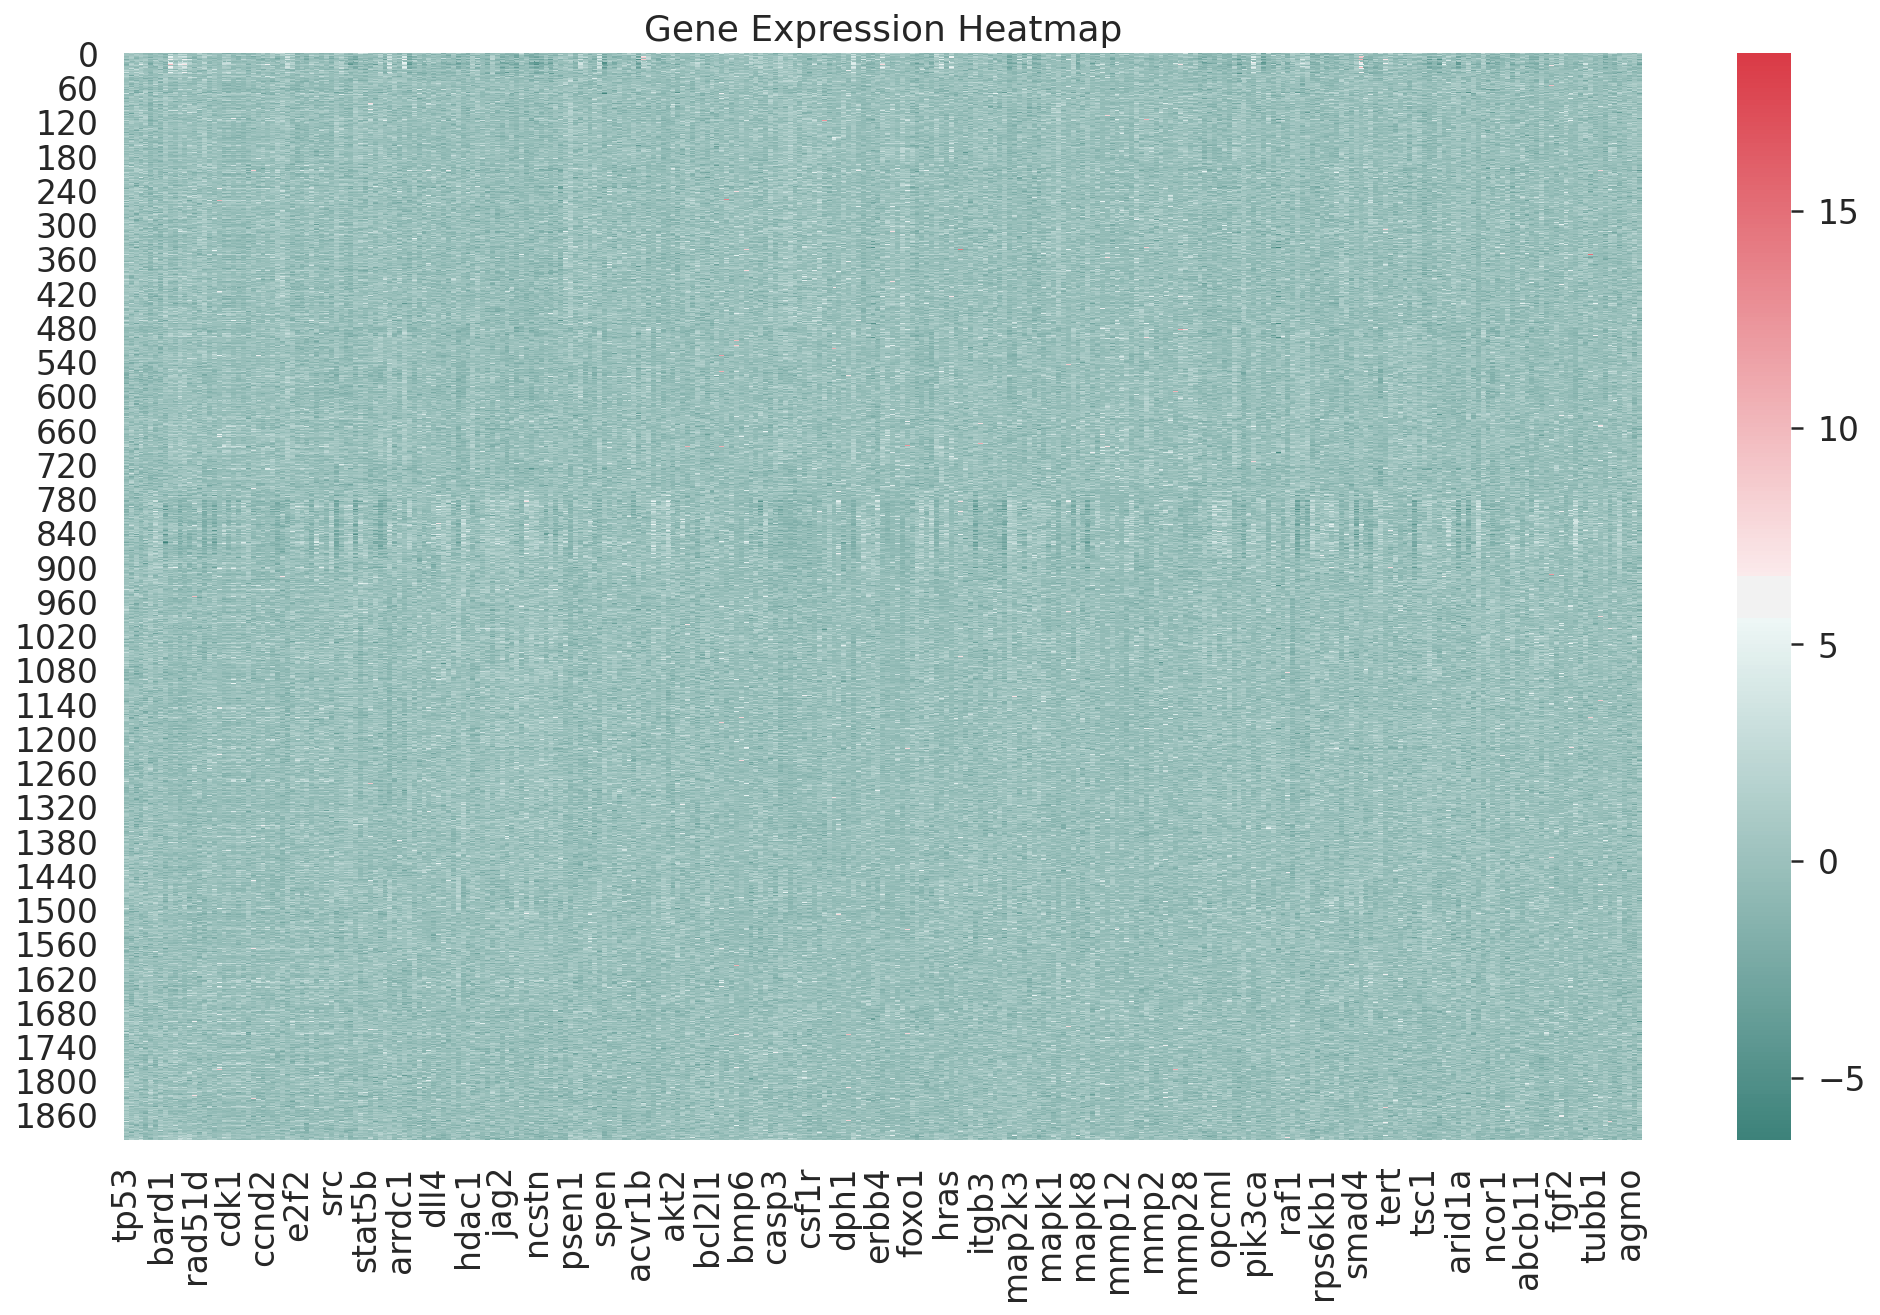

In [ ]:
# Visualizing the mRNA values in a heatmap.
fig, axs = plt.subplots(figsize = (17, 10)) 
sns.heatmap(genetic_df.drop(['patient_id','overall_survival'], axis=1), ax = axs, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Gene Expression Heatmap')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

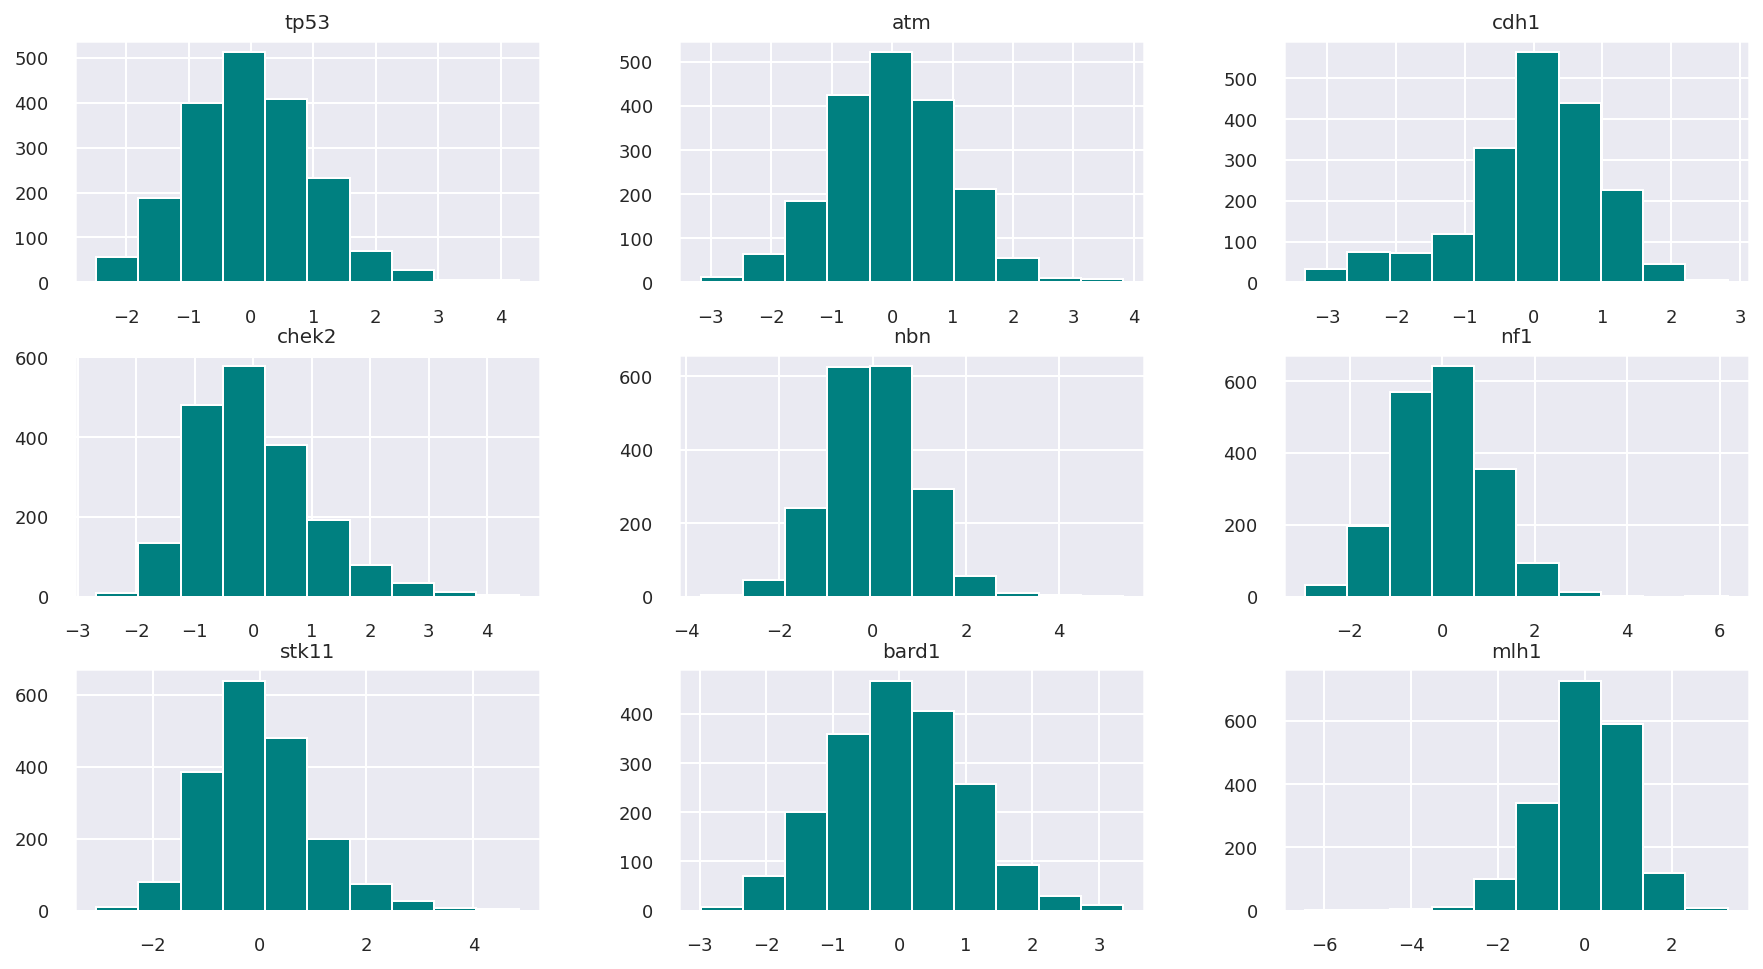

In [ ]:
params = {'axes.titlesize':'10',
          'xtick.labelsize':'9',
          'ytick.labelsize':'9'}
matplotlib.rcParams.update(params)
#plt.subplots_adjust(hspace=0.5) 
genetic_df.drop(['patient_id','overall_survival'], axis=1).iloc[:,:9].hist(figsize=(15,8), color=color_hist)
plt.show()

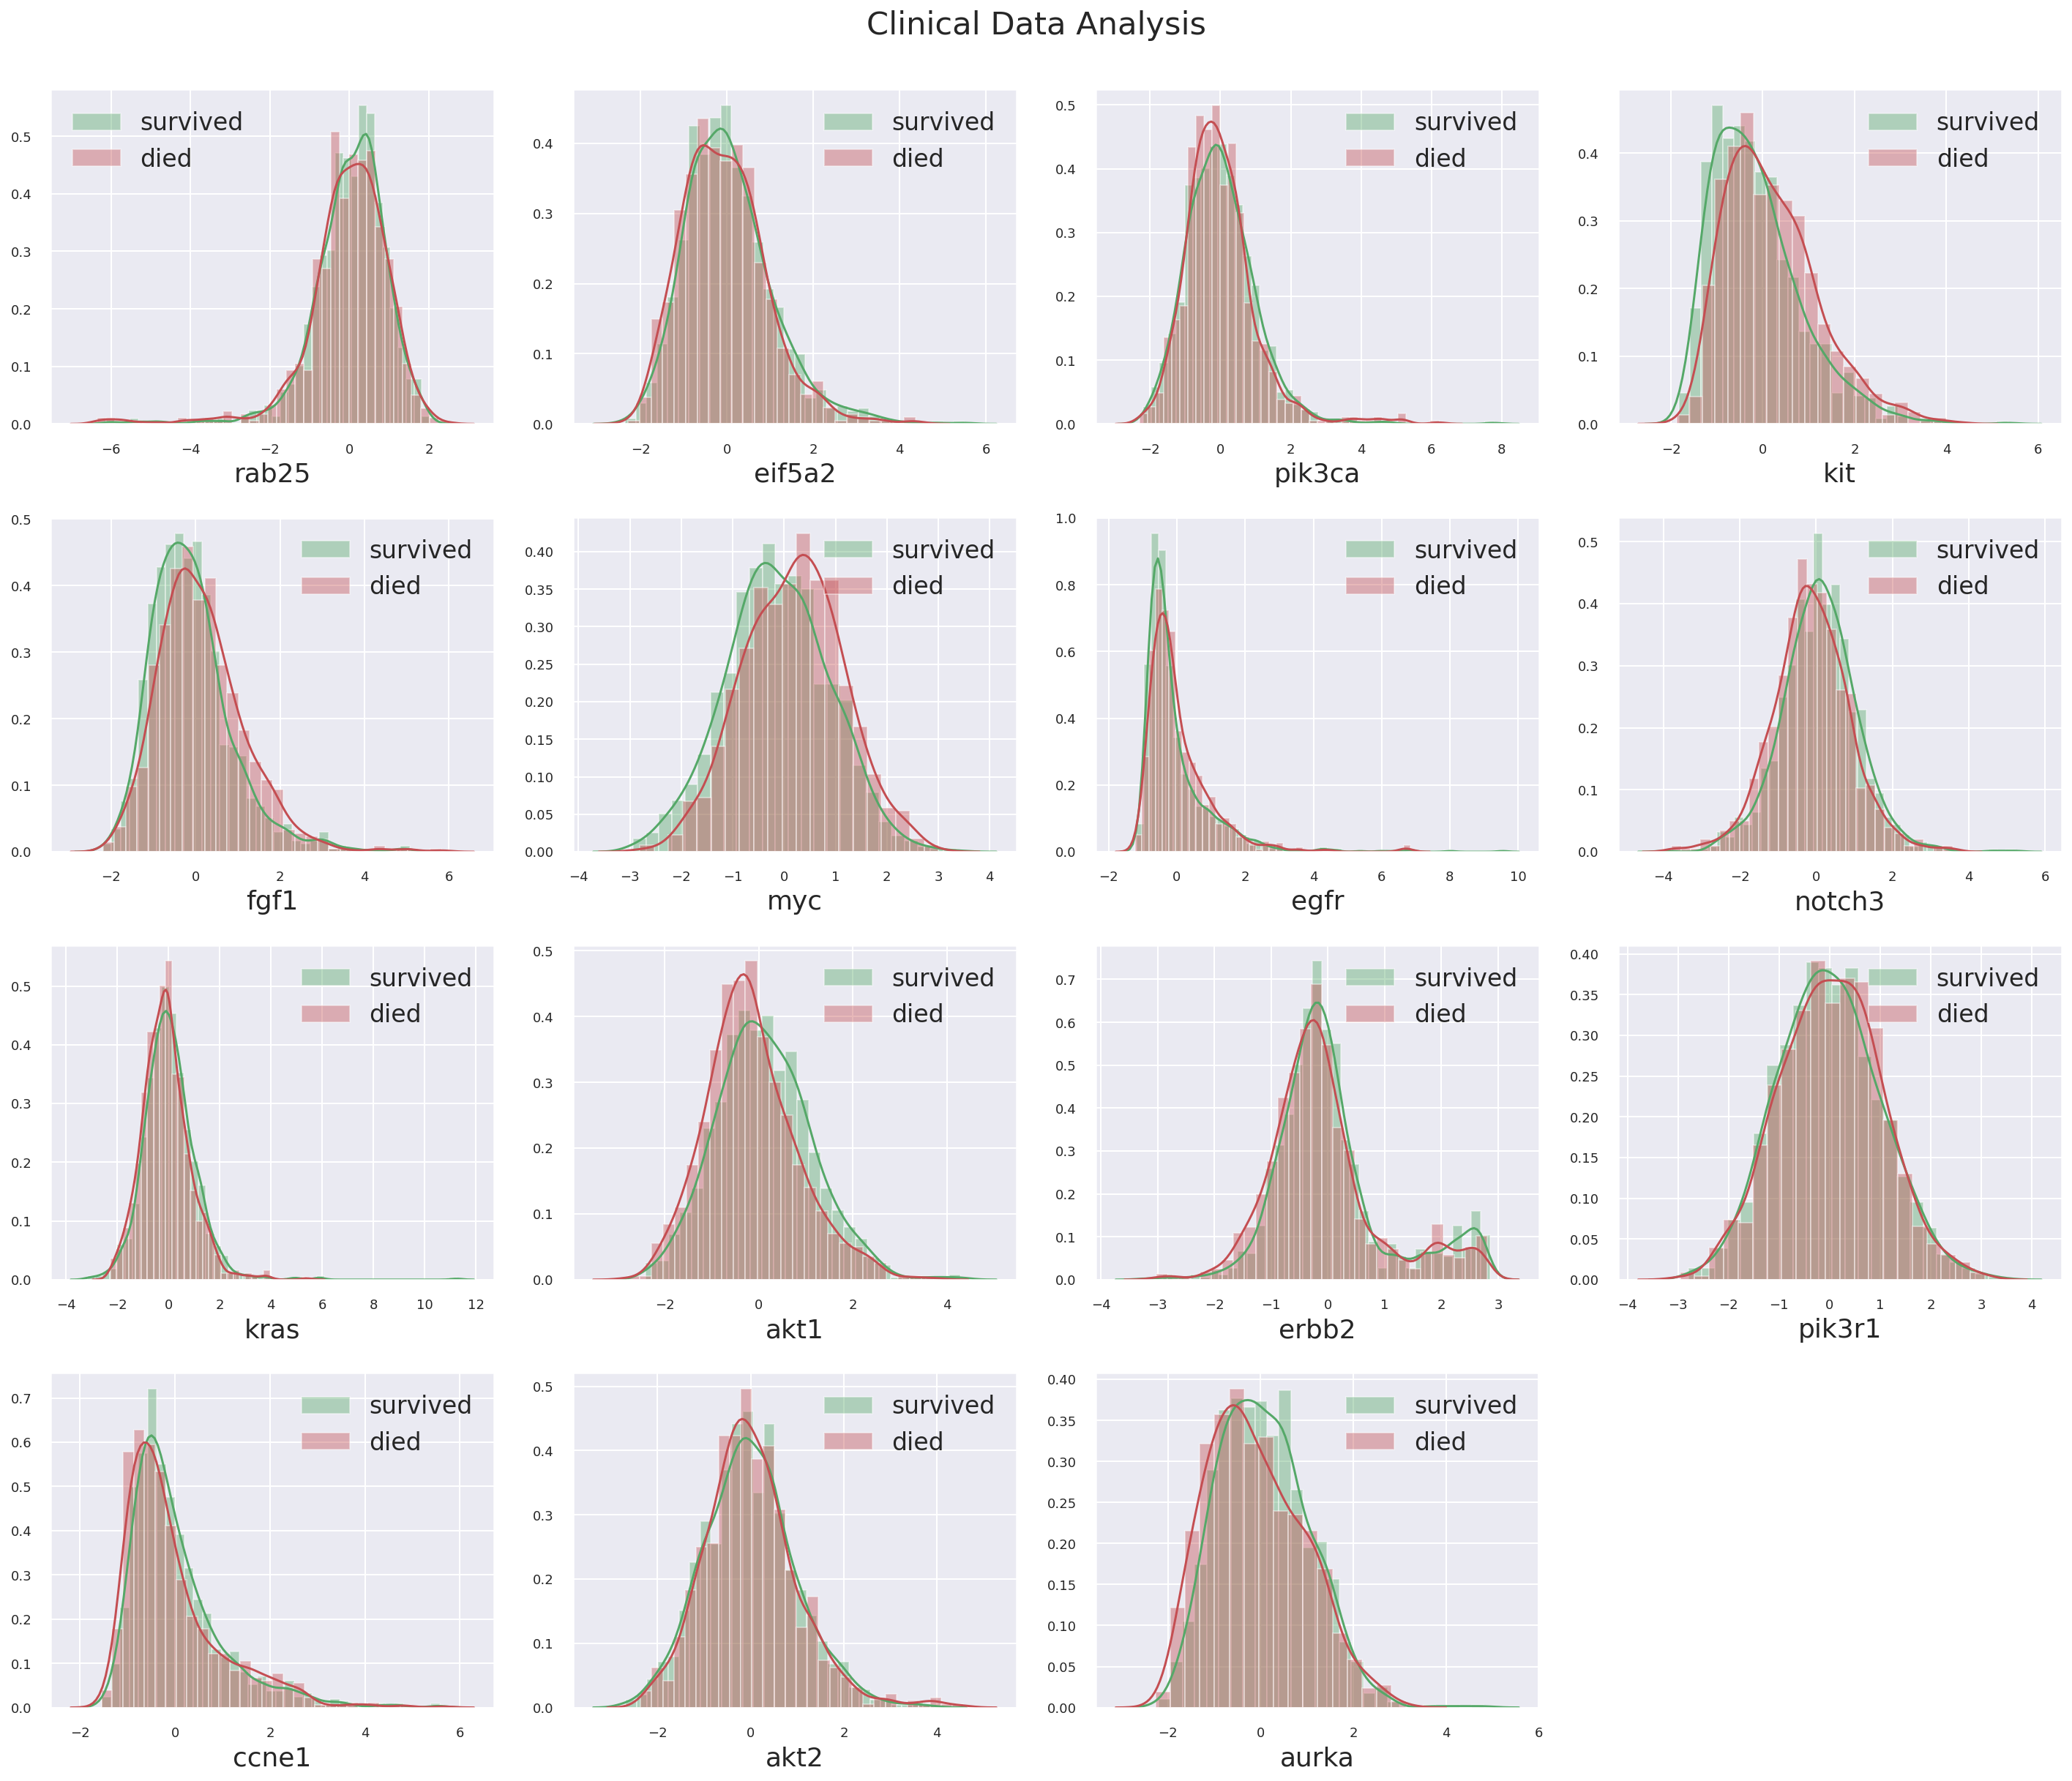

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0

gene_list = ['rab25', 'eif5a2', 'pik3ca', 'kit', 'fgf1', 'myc', 'egfr', 'notch3', 'kras', 'akt1', 'erbb2', 'pik3r1', 'ccne1', 'akt2', 'aurka']
for i in genetic_df.drop(['patient_id'], axis=1).loc[:,gene_list].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(genetic_df[i][genetic_df['overall_survival']==0], color='g', label = 'survived')
    sns.distplot(genetic_df[i][genetic_df['overall_survival']==1], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


The distribution of data in the two classes of survival are very similar with few outliers in some genes. 

In [ ]:
print('Maximum value possible in genetic data:', genetic_df.drop(['patient_id','overall_survival'], axis = 1).max().max())
print('Minimum value possible in genetic data:', genetic_df.drop(['patient_id','overall_survival'], axis = 1).min().min())

Maximum value possible in genetic data: 18.6351
Minimum value possible in genetic data: -6.4387


- #### Number of outliers in the top 10 genetic features

In [ ]:
#Finding number of outliers in each column
Q1 = genetic_df.quantile(0.25)
Q3 = genetic_df.quantile(0.75)
IQR = Q3 - Q1
((genetic_df < (Q1 - 1.5 * IQR)) | (genetic_df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False).head(10)

erbb2     224
dll3      194
mmp1      186
mmp12     180
cdkn2a    179
ccna1     154
bmp7      152
wwox      148
map2      144
folr1     142
dtype: int64

- #### Visualize Correlation of between the genetic Attributes and outcome

NameError: name 'genetic_df' is not defined

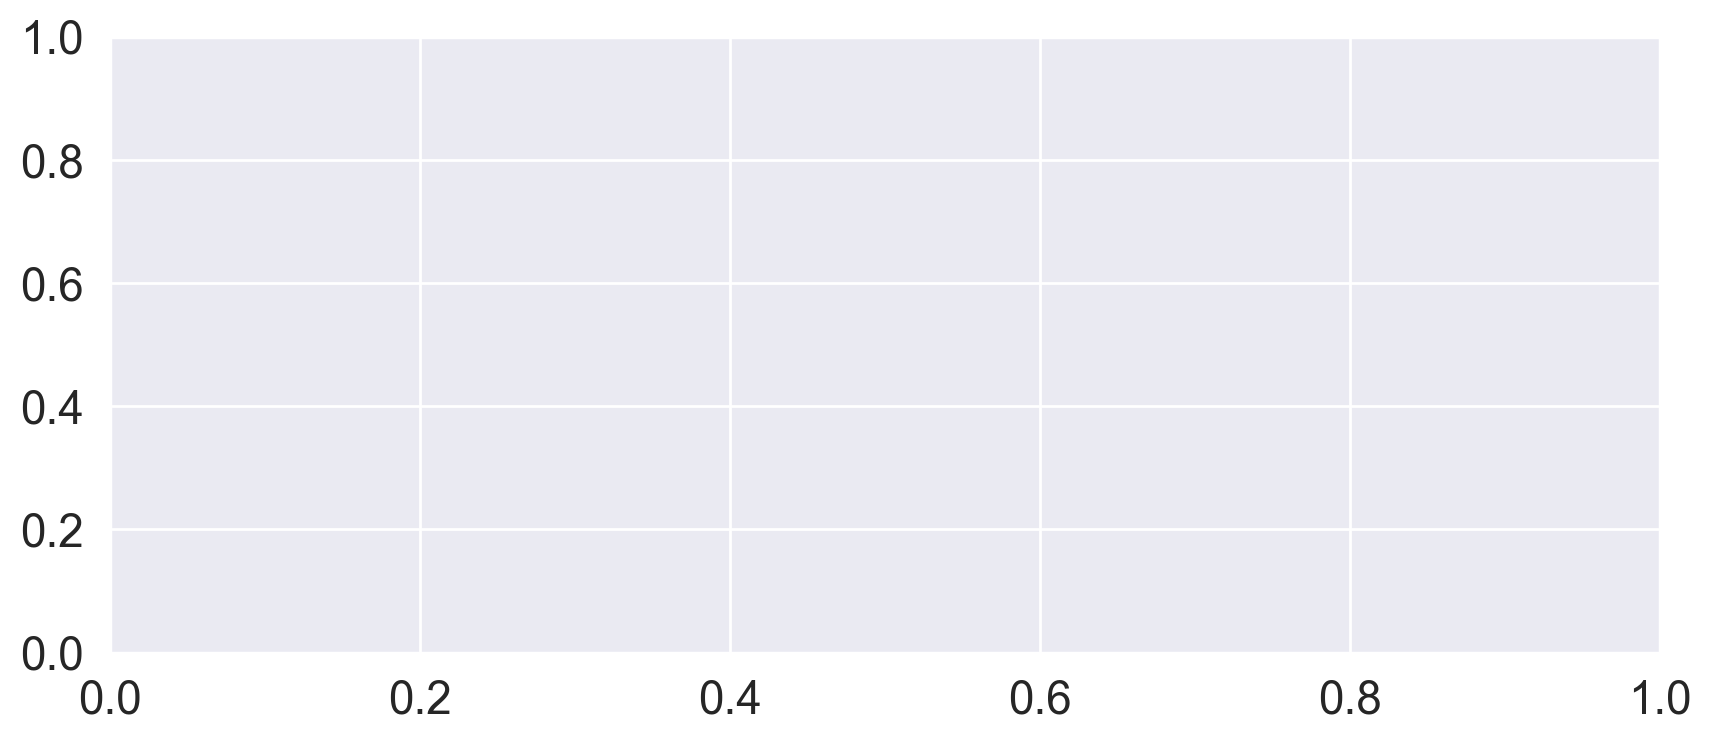

In [24]:
#how varied are genes and how well do they correlate with eventdeath?
fig, ax = plt.subplots(figsize=(10,4))

#plot histogram of variation using standard deviation as a measure
corrs=[]
for col in genetic_df.drop(['patient_id'], axis = 1).columns:
    corr = genetic_df[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)

corrs.pop(-1)
ax.hist(corrs,  bins=25, color = color_hist)
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)


plt.show()

In [ ]:
print("Maximum Correlation: " + "%.3f" %max(corrs))
print("Minimum Correlation: " + "%.3f" %min(corrs))
print("Mean Correlation: " + "%.3f" %np.mean(corrs))

Maximum Correlation: 0.194
Minimum Correlation: -0.186
Mean Correlation: 0.004


The correlation between our target and the genetic features shows that most features do not actually correlate.

<a name="mutation"></a>
### c) Relationship between genetic mutation attributes and outcomes

In [25]:
# droping clinical and genetic data
mutation_features_to_drop = df.columns[4:520]
mutation_df = df.drop(mutation_features_to_drop, axis=1)
mutation_df = mutation_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)

# if there is a mutation=1, no-mutation=0
for column in mutation_df.columns[1:]:
    mutation_df[column]=pd.to_numeric(mutation_df[column], errors='coerce').fillna(1).astype(int)

mutation_df.insert(loc=1 , column='overall_survival', value=df['overall_survival'])

mutation_df.head()

patient_id  overall_survival  pik3ca_mut  tp53_mut  muc16_mut  ahnak2_mut  \
0           0                 1           0         0          0           0   
1           2                 1           0         1          0           0   
2           5                 0           1         0          0           0   
3           6                 1           1         0          0           0   
4           8                 0           0         1          0           0   

   kmt2c_mut  syne1_mut  gata3_mut  map3k1_mut  ...  mtap_mut  ppp2cb_mut  \
0          0          0          0           0  ...         0           0   
1          0          0          0           0  ...         0           0   
2          0          0          0           0  ...         0           0   
3          0          0          0           0  ...         0           0   
4          0          0          0           0  ...         0           0   

   smarcd1_mut  nras_mut  ndfip1_mut  hras_mut  prps2_mut  smarcb1_mut  \
0            0         0           0         0          0            0   
1            0         0           0         0          0            0   
2            0         0           0         0          0            0   
3            0         0           0         0          0            0   
4            0         0           0         0          0            0   

   stmn2_mut  siah1_mut  
0          0          0  
1          0          0  
2          0          0  
3          0          0  
4          0          0  

[5 rows x 175 columns]

Some genes had much more mutations than other genes. For example: PIK3CA (coding mutations in 40.1% of the samples) and TP53 (35.4%) dominated the mutation landscape. Only five other genes harboured coding mutations in at least 10% of the samples: MUC16 (16.8%); AHNAK2 (16.2%); SYNE1 (12.0%); KMT2C (also known as MLL3; 11.4%) and GATA3 (11.1%).

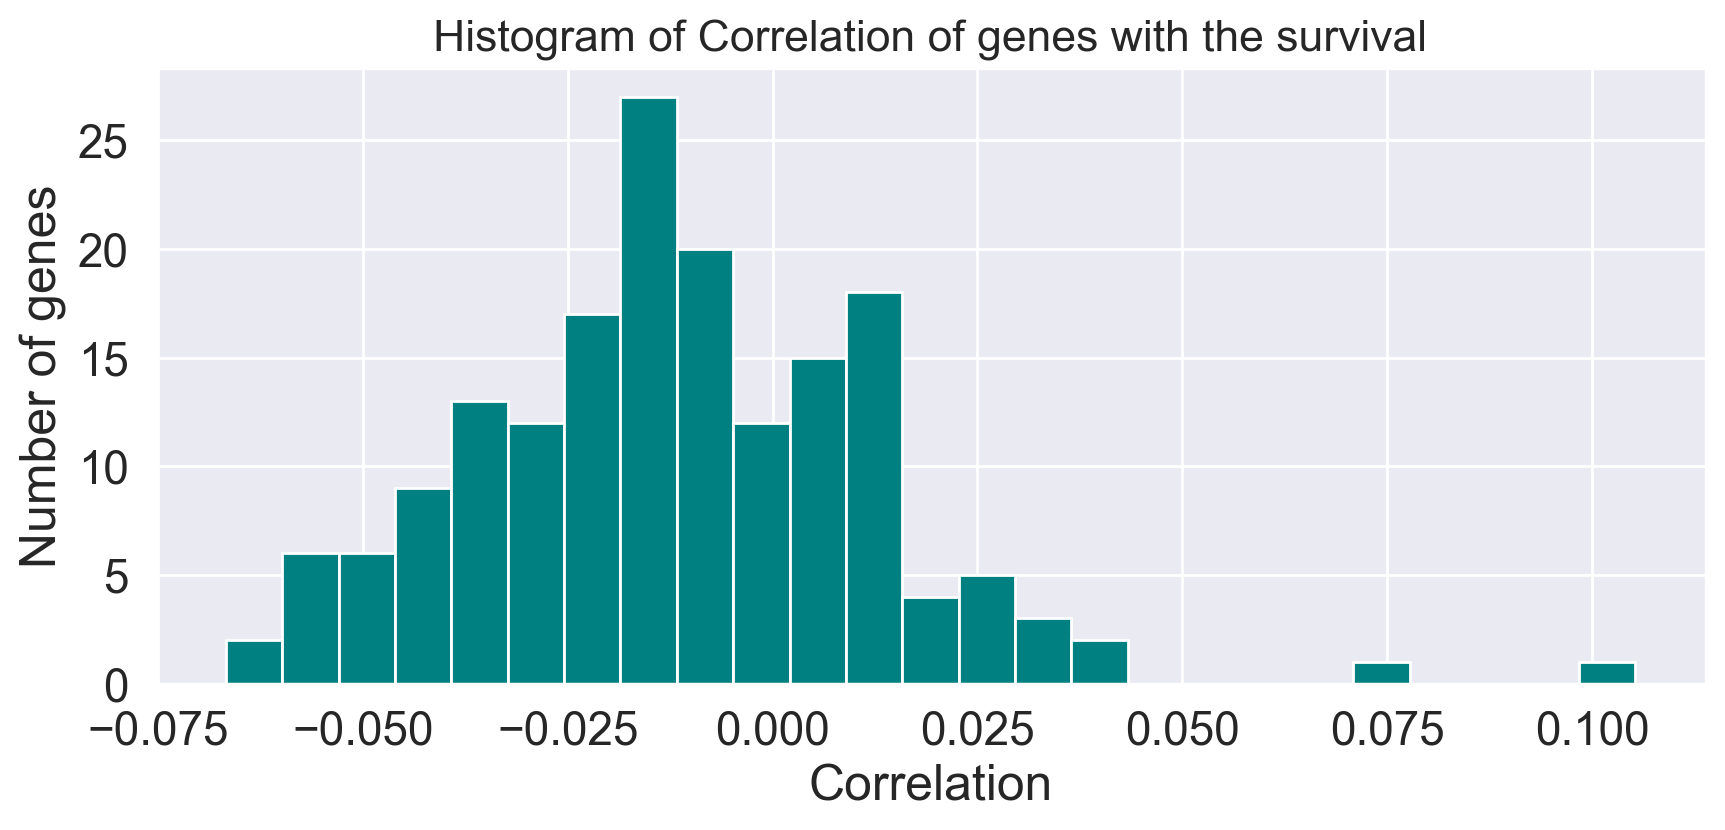

In [26]:
#plot histogram of variation using standard deviation as a measure
fig, ax = plt.subplots(figsize=(10,4))
corrs=[]
for col in mutation_df.drop(['patient_id'], axis = 1).columns:
    corr = mutation_df[[col,'overall_survival']].corr()['overall_survival'][col]
    corrs.append(corr)
    
corrs.pop(0)
ax.hist(corrs,  bins=25, color = color_hist)
ax.set_xlabel("Correlation")
ax.set_ylabel("Number of genes")
ax.set_title("Histogram of Correlation of genes with the survival", size=16)


plt.show()

In [27]:
print("Maximum Correlation: " + "%.3f" %max(corrs))
print("Minimum Correlation: " + "%.3f" %min(corrs))
print("Mean Correlation: " + "%.3f" %np.mean(corrs))

Maximum Correlation: 0.105
Minimum Correlation: -0.067
Mean Correlation: -0.012


No correlation at all between survival and mutations, as we changed the mutation to 0s and 1s instead of 0s if there is no mutations and the kind of mutation if there is a mutation. We decided to exclude the mutations from the mdeoling part for now, and maybe include it later when we analyse them in more detail. 

<a name="Preprocessing_and_Modeling"></a>
## Preprocessing and Modeling


In [28]:
BOLD = '\033[1m'
END = '\033[0m'
# using a stratfied k fold because we need the distribution of the to classes in all of the folds to be the same.
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [29]:
print('Baseline accuracy:' )
print(df["overall_survival"].value_counts()/df["overall_survival"].count())

Baseline accuracy:
0    0.579307
1    0.420693
Name: overall_survival, dtype: float64


 ### a) Classification with only clinical attributes

In [45]:
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
# Getting dummies for all categorical columns
dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_clinical_df.dropna(inplace = True)

In [46]:
# data splitting
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']
# using stratify for y because we need the distribution of the two classes to be equal in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

### Some helpful functions:

In [47]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    # CODE HERE PLEASE
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

def basic_classifiers (X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    
    # Scaling 
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    ######################################################################################################  K Neighbors Classifier model
    
    params = {
    "n_neighbors" : [5,15,25,30,35,40, 100],
    "weights" : ["uniform" , "distance"]
    }
    print(); print(BOLD + 'K Neighbors Classifier Model:' + END)
    knn= GridSearchCV(KNeighborsClassifier(), params, n_jobs=-1, cv=4)
    knn_pred, knn_test, knn_train = model_metrics(knn, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Logistic Regression
    params = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-2,4,100)
    }
    print(); print(BOLD + 'Logistic Regression Model:' + END)
    logistic_regression = GridSearchCV(LogisticRegression(random_state=42), params, n_jobs=-1, cv=4)
    lg_pred, lg_test, lg_train = model_metrics(logistic_regression, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Decision Tree
    
    print(); print(BOLD + 'Decision Tree Classifier Model:' + END)
    decision_tree = DecisionTreeClassifier(random_state=42)
    dt_pred, dt_test, dt_train = model_metrics(decision_tree, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Random Forest Classifier
    
    print(); print(BOLD + 'Random Forest Classifier Model:' + END)
    random_forest = RandomForestClassifier(random_state=42)
    rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### Extra Trees Classifier
   
    print(); print(BOLD + 'Extra Trees Classifier Model:' + END)
    extra_trees = ExtraTreesClassifier(random_state=42)
    et_pred, et_test, et_train = model_metrics(extra_trees, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### AdaBoost Classifier
    
    print(); print(BOLD + 'AdaBoost Classifier Model:' + END)
    ada_boost = AdaBoostClassifier(random_state=42)
    ab_pred, ab_test, ab_train = model_metrics(ada_boost, kfold, X_train, X_test, y_train, y_test)
    
    ###################################################################################################### SVC Classifier
    
    print(); print(BOLD + 'SVC Classifier Model:' + END)
    svc = SVC(random_state=42)
    svc_pred, svc_test, svc_train = model_metrics(svc, kfold, X_train, X_test, y_train, y_test)

    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,6))

    
    #bar chart of accuracy scores
    inds = range(1,8)
    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    scores_all = [knn_train, lg_train, dt_train, rf_train, et_train, ab_train, svc_train]
    scores_predictive = [knn_test, lg_test, dt_test, rf_test, et_test, ab_test, svc_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set")
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores for basic models", fontsize=17)
    ax1.set_xticks(range(1,8))
    ax1.set_xticklabels(labels, size=12, rotation=40, ha="right")
    ax1.legend()

    labels = ["KNN", "Logistic Regression", "Decision Tree", "Random Forest",'Extra Trees', 'AdaBoost', 'SVC' ]
    for label, pred in zip(labels, [knn_pred, lg_pred, dt_pred, rf_pred, et_pred, ab_pred, svc_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 12})
    ax2.set_title("Roc curve for for basic models", fontsize=17)

    plt.show()
    
    
# a function that takes a dataframe and plots histograms for all columns 
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=15)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column].dropna(), color= color_hist ) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()
    
    
# a function that takes a dataframe and plots barplot for all columns 
def subplot_bargraph(dataframe, list_of_columns, list_of_titles, list_of_xlabels, big_title_name):
    
    nrows = int(np.ceil(len(list_of_columns)/3)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=3,nrows=nrows, figsize=(15, 10)) # You'll want to specify your figsize
    fig.suptitle(big_title_name, fontsize=20)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.countplot(dataframe[column].dropna(), color= color_hist, ax=ax[i], hue=dataframe['eventdeath']) # feel free to add more settings
        #ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_xlabel('')
        ax[i].set_ylabel('Frequency')
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot    
    plt.show()        


K Neighbors Classifier Model:
CV scores:  [0.67045455 0.6875     0.67428571 0.64571429 0.66857143]
CV Standard Deviation:  0.013522181199120655

CV Mean score:  0.6693051948051948
Train score:    1.0
Test score:     0.6458333333333334

Confusion Matrix: 
[[203  42]
 [111  76]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.65      0.83      0.73       245
           1       0.64      0.41      0.50       187

    accuracy                           0.65       432
   macro avg       0.65      0.62      0.61       432
weighted avg       0.65      0.65      0.63       432


Logistic Regression Model:
CV scores:  [0.71590909 0.72159091 0.74857143 0.70285714 0.74857143]
CV Standard Deviation:  0.018245805771028675

CV Mean score:  0.7275
Train score:    0.7765108323831242
Test score:     0.7777777777777778

Confusion Matrix: 
[[201  44]
 [ 52 135]]
Classification Report:  
              precision    recall  f1-score   support

          

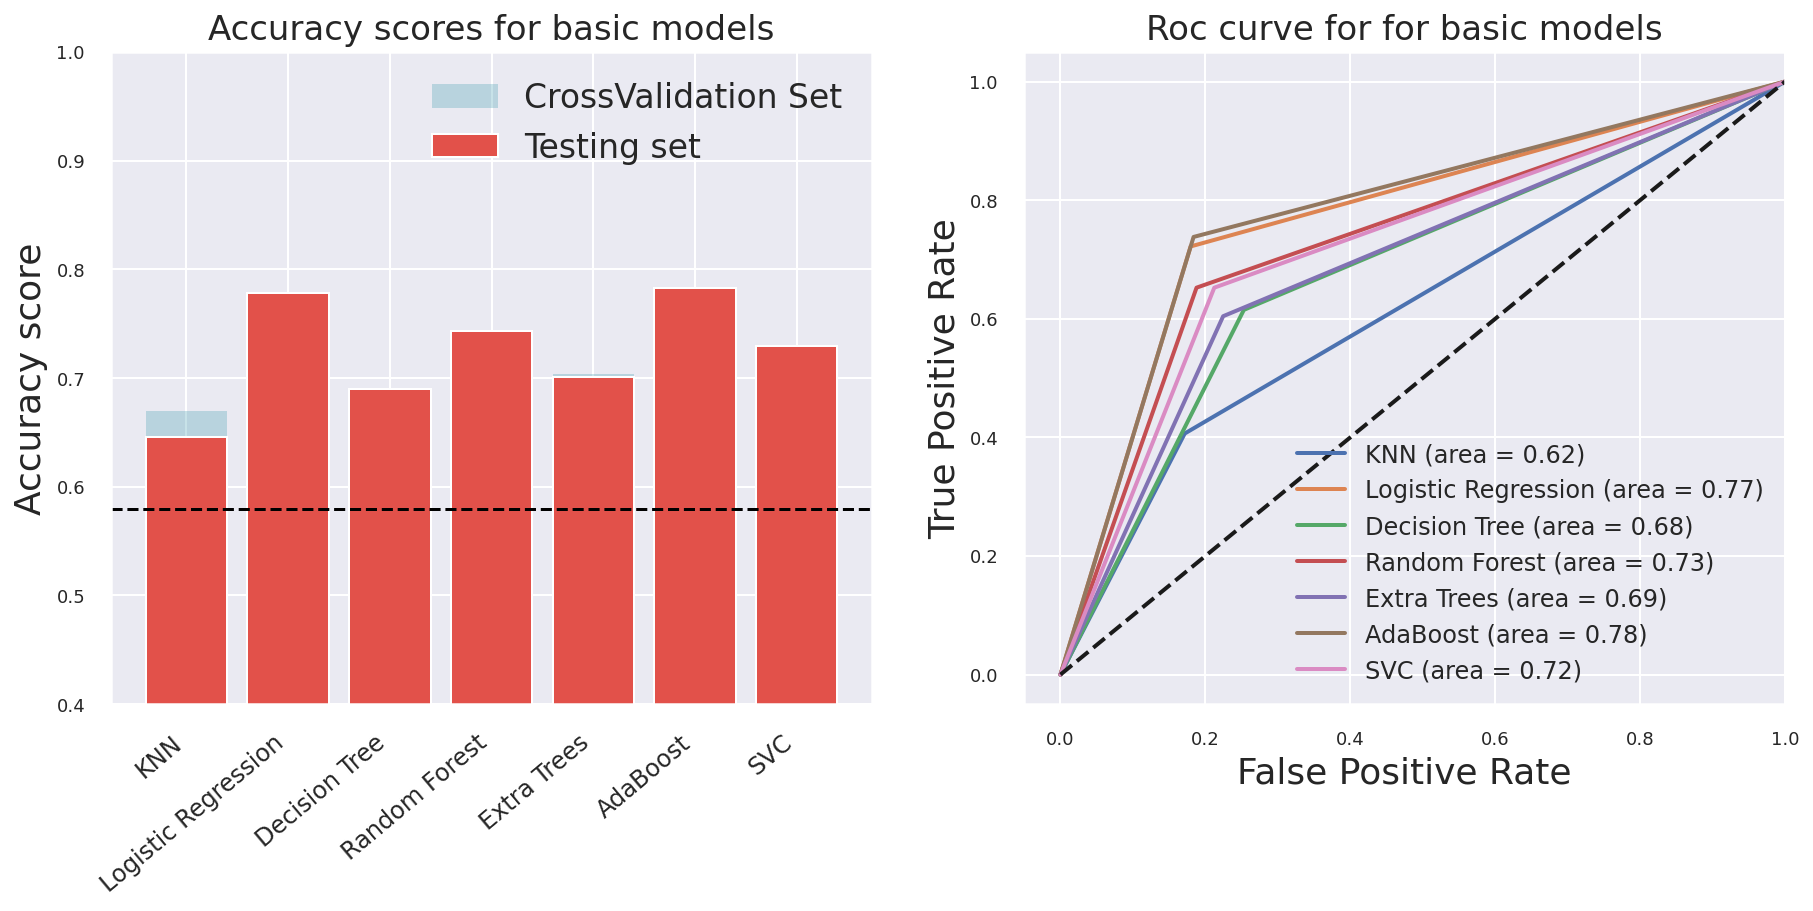

In [48]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

Logistic regression model preformed the best with accuracy of 0.777 and AUC of 0.777, KNN having the lowest accuracy of 0.64, and AUC of 0.62

In [49]:
def RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Random Forest Classifier Model:' + END)
    #kfold=5
    rf_params = {
        #'n_estimators': [10, 50, 100, 150, 200, 250],
        'max_features':[2, 3, 5, 7, 8],
        #'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini', 'entropy'],
    }

    random_forest = RandomForestClassifier(n_estimators=100)
    gs = GridSearchCV(random_forest, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train


def ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, kfold):
    BOLD = '\033[1m'
    END = '\033[0m'
    print(); print(BOLD + 'Grid Search with Extra Trees Model:' + END)
    # Scaling 
      
    rf_params = {
        #'n_estimators': [10, 100, 400, 800, 1100, 1850],
        #'max_features':['auto'],
        'max_depth': [1, 2, 3, 4, 5, 8],
        #'criterion':['gini'],
    }

    extra_trees = ExtraTreesClassifier(n_estimators=100)    
    gs = GridSearchCV(extra_trees, param_grid=rf_params, cv=5, verbose = 1)
    gs_pred, gs_test, gs_train = model_metrics(gs, kfold, X_train, X_test, y_train, y_test)
    
    return gs.best_estimator_, gs_pred, gs_test, gs_train

def RF_ET_GridSearch (X_train, X_test, y_train, y_test, kfold):
    rf_gs_best_estimator, rf_pred, rf_test, rf_train = RandomForest_GridSearch(X_train, X_test, y_train, y_test, kfold)
    et_gs_best_estimator, et_pred, et_test, et_train = ExtraTrees_GridSearch(X_train, X_test, y_train, y_test, kfold)
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(13,6))

    fig.suptitle("Random Forest and Extra Trees with Grid Search", fontsize=16)
    #bar chart of accuracy scores
    inds = range(1,3)
    labels = ["Random Forest", "Extra Trees" ]
    scores_all = [rf_train, et_train]
    scores_predictive = [rf_test, et_test]
    
    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set") #
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.set_title("Accuracy scores", fontsize=17)
    ax1.set_xticks(range(1,3))
    ax1.set_xticklabels(labels, size=14)
    ax1.legend()

    labels = ["Random Forest", "Extra Trees" ]
    for label, pred in zip(labels, [rf_pred, et_pred]):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 14})
    ax2.set_title("Roc curve", fontsize=17)

    plt.show()

In [50]:
#RF_ET_GridSearch (X_train, X_test, y_train, y_test, kfold)

I will not be running the part for Random Forest and Extra Trees with greid search, as it takes a long time, but the results were as follows:


* Grid Search with Random Forest Classifier Model Accuracy = 0.7546296296296297

* Grid Search with Extra Trees Classifier Model Accuracy = 0.6875

- #### Predicting without the time related column (overall_survival_months)

For a first time diagnosed patient, there will be no information about survival time, so we want to check if we can predited survival without survival time duration

In [51]:
# data splitting
X_no_time = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival','overall_survival_months' ], axis=1)
y_no_time = dummies_clinical_df['overall_survival']

X_train_no_time, X_test_no_time, y_train_no_time, y_test_no_time = train_test_split(X_no_time, y_no_time, test_size=0.33, random_state=42, stratify = y)


K Neighbors Classifier Model:
CV scores:  [0.65340909 0.67045455 0.65714286 0.63428571 0.66285714]
CV Standard Deviation:  0.012122693168639898

CV Mean score:  0.6556298701298701
Train score:    1.0
Test score:     0.6319444444444444

Confusion Matrix: 
[[198  47]
 [112  75]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.64      0.81      0.71       245
           1       0.61      0.40      0.49       187

    accuracy                           0.63       432
   macro avg       0.63      0.60      0.60       432
weighted avg       0.63      0.63      0.61       432


Logistic Regression Model:
CV scores:  [0.67045455 0.69886364 0.71428571 0.67428571 0.68571429]
CV Standard Deviation:  0.016171016386001123

CV Mean score:  0.6887207792207792
Train score:    0.7331812998859749
Test score:     0.6712962962962963

Confusion Matrix: 
[[186  59]
 [ 83 104]]
Classification Report:  
              precision    recall  f1-score   support

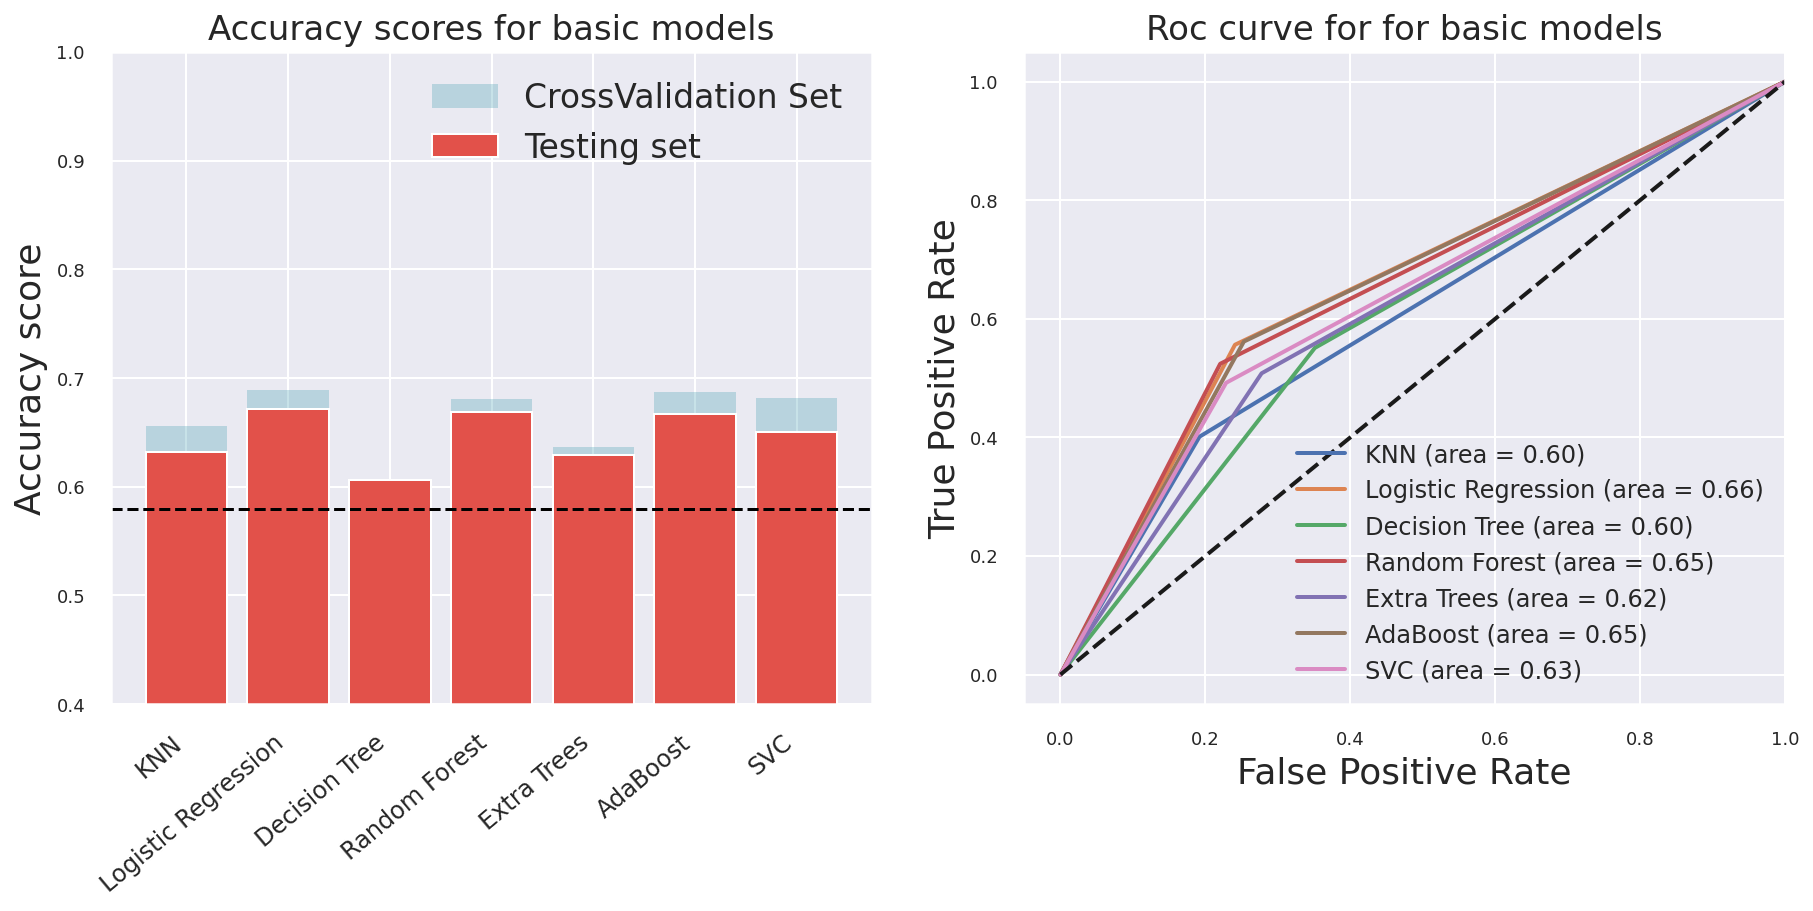

In [52]:
basic_classifiers( X_train_no_time, X_test_no_time, y_train_no_time, y_test_no_time, kfold)

Without survival time duration, the prediction scores decreases segneficantly compared to prediction with survival time duration

In [53]:
#RF_ET_GridSearch (X_train_no_time, X_test_no_time, y_train_no_time, y_test_no_time, kfold)

* Grid Search with Random Forest Classifier Model Accuracy = 0.6597222222222222

* Grid Search with Extra Trees Classifier Model Accuracy = 0.6550925925925926

 ### b) Classification with only genetic attributes

In [54]:
# data splitting
X = genetic_df.drop(['patient_id', 'overall_survival'], axis=1)
y = genetic_df['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


K Neighbors Classifier Model:
CV scores:  [0.58431373 0.63137255 0.6        0.61960784 0.63529412]
CV Standard Deviation:  0.019307503725633193

CV Mean score:  0.6141176470588235
Train score:    0.6635294117647059
Test score:     0.6693163751987281

Confusion Matrix: 
[[287  77]
 [131 134]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       364
           1       0.64      0.51      0.56       265

    accuracy                           0.67       629
   macro avg       0.66      0.65      0.65       629
weighted avg       0.66      0.67      0.66       629


Logistic Regression Model:
CV scores:  [0.61960784 0.66666667 0.64705882 0.62745098 0.63921569]
CV Standard Deviation:  0.016339346396862464

CV Mean score:  0.6399999999999999
Train score:    0.7607843137254902
Test score:     0.629570747217806

Confusion Matrix: 
[[265  99]
 [134 131]]
Classification Report:  
              precision    recall  f1-s

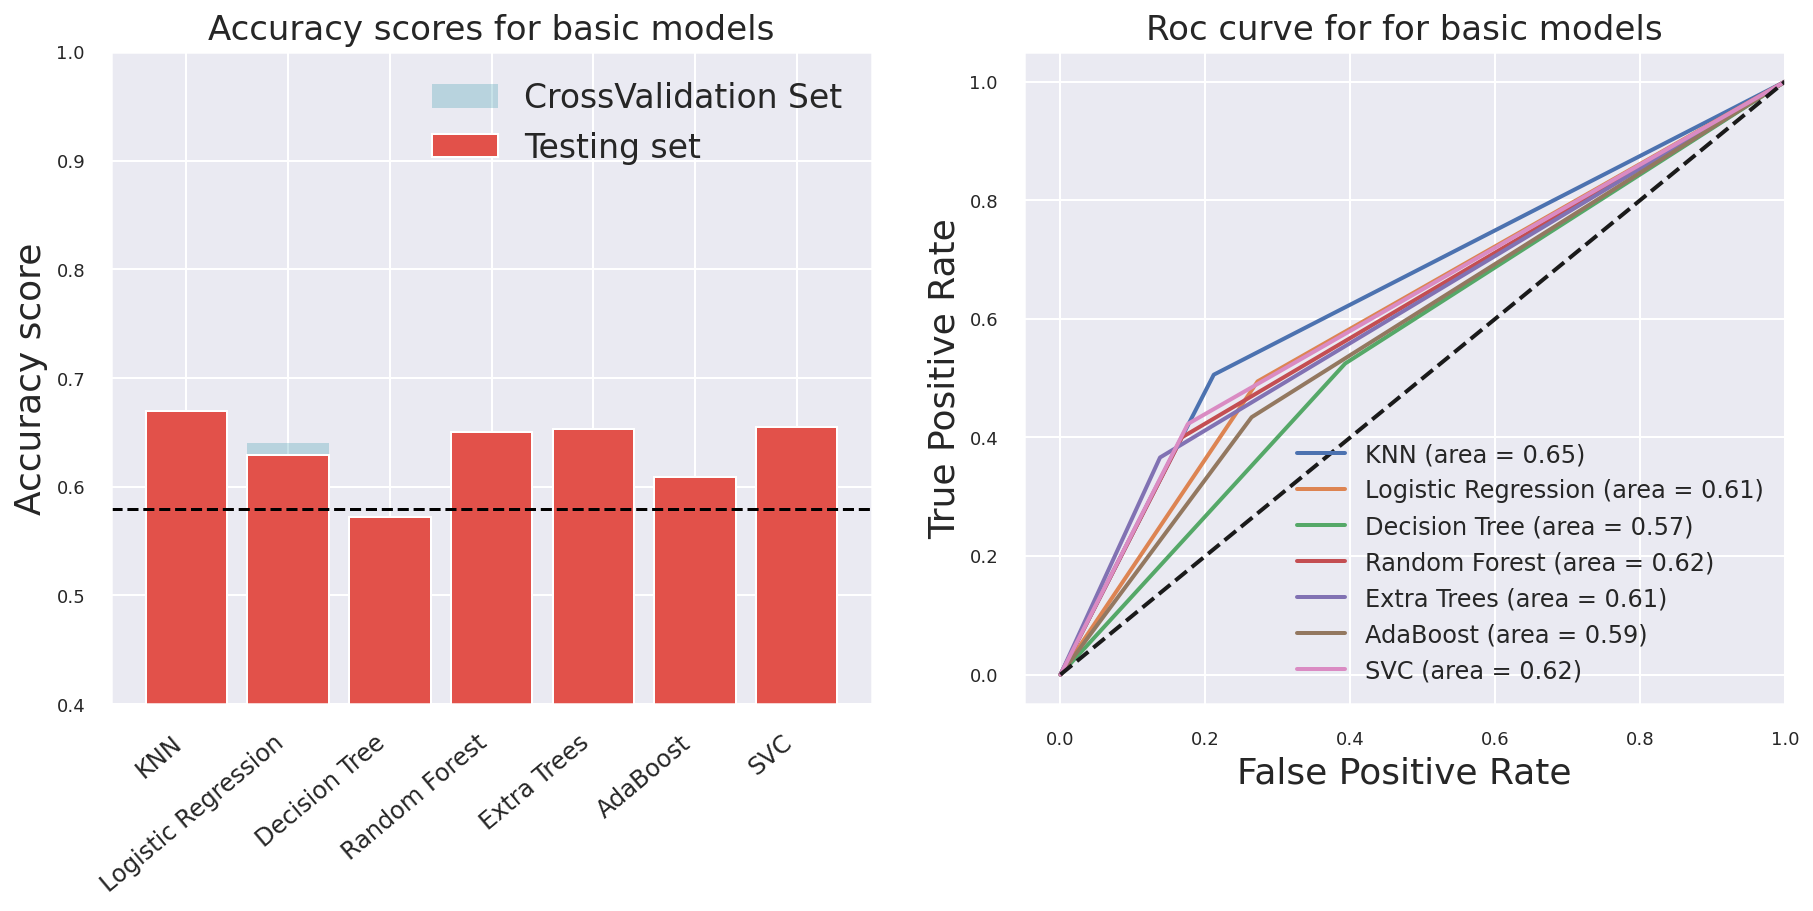

In [55]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

When we train the models only with genetic data, we can see that the performance is bad in most of the models, with decision tree falling under the base line of 57%.

In [56]:
#RF_ET_GridSearch (X_train, X_test, y_train, y_test, kfold)

* Grid Search with Random Forest Classifier Model Accuracy = 0.6518282988871225

* Grid Search with Extra Trees Classifier Model Accuracy = 0.6518282988871225

 ### c) Classification with all attributes

In [57]:
features_to_drop = df.columns[520:]
df = df.drop(features_to_drop, axis=1)
all_categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
all_categorical_columns = [ele for ele in all_categorical_columns if ele not in unwanted_columns] 
dummies_df = pd.get_dummies(df.drop('patient_id',axis=1 ), columns= all_categorical_columns, dummy_na=True)
dummies_df.dropna(inplace = True)

In [58]:
# data splitting
X = dummies_df.drop( ['death_from_cancer','overall_survival'], axis=1)
y = dummies_df['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


K Neighbors Classifier Model:
CV scores:  [0.61428571 0.61428571 0.62679426 0.66985646 0.66985646]
CV Standard Deviation:  0.025592236691669344

CV Mean score:  0.6390157211209843
Train score:    0.6609360076408787
Test score:     0.6450381679389313

Confusion Matrix: 
[[114  44]
 [ 49  55]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       158
           1       0.56      0.53      0.54       104

    accuracy                           0.65       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.65      0.64       262


Logistic Regression Model:
CV scores:  [0.68095238 0.70952381 0.70813397 0.75119617 0.70813397]
CV Standard Deviation:  0.022518747630622504

CV Mean score:  0.7115880610617453
Train score:    0.8882521489971347
Test score:     0.7519083969465649

Confusion Matrix: 
[[122  36]
 [ 29  75]]
Classification Report:  
              precision    recall  f1-

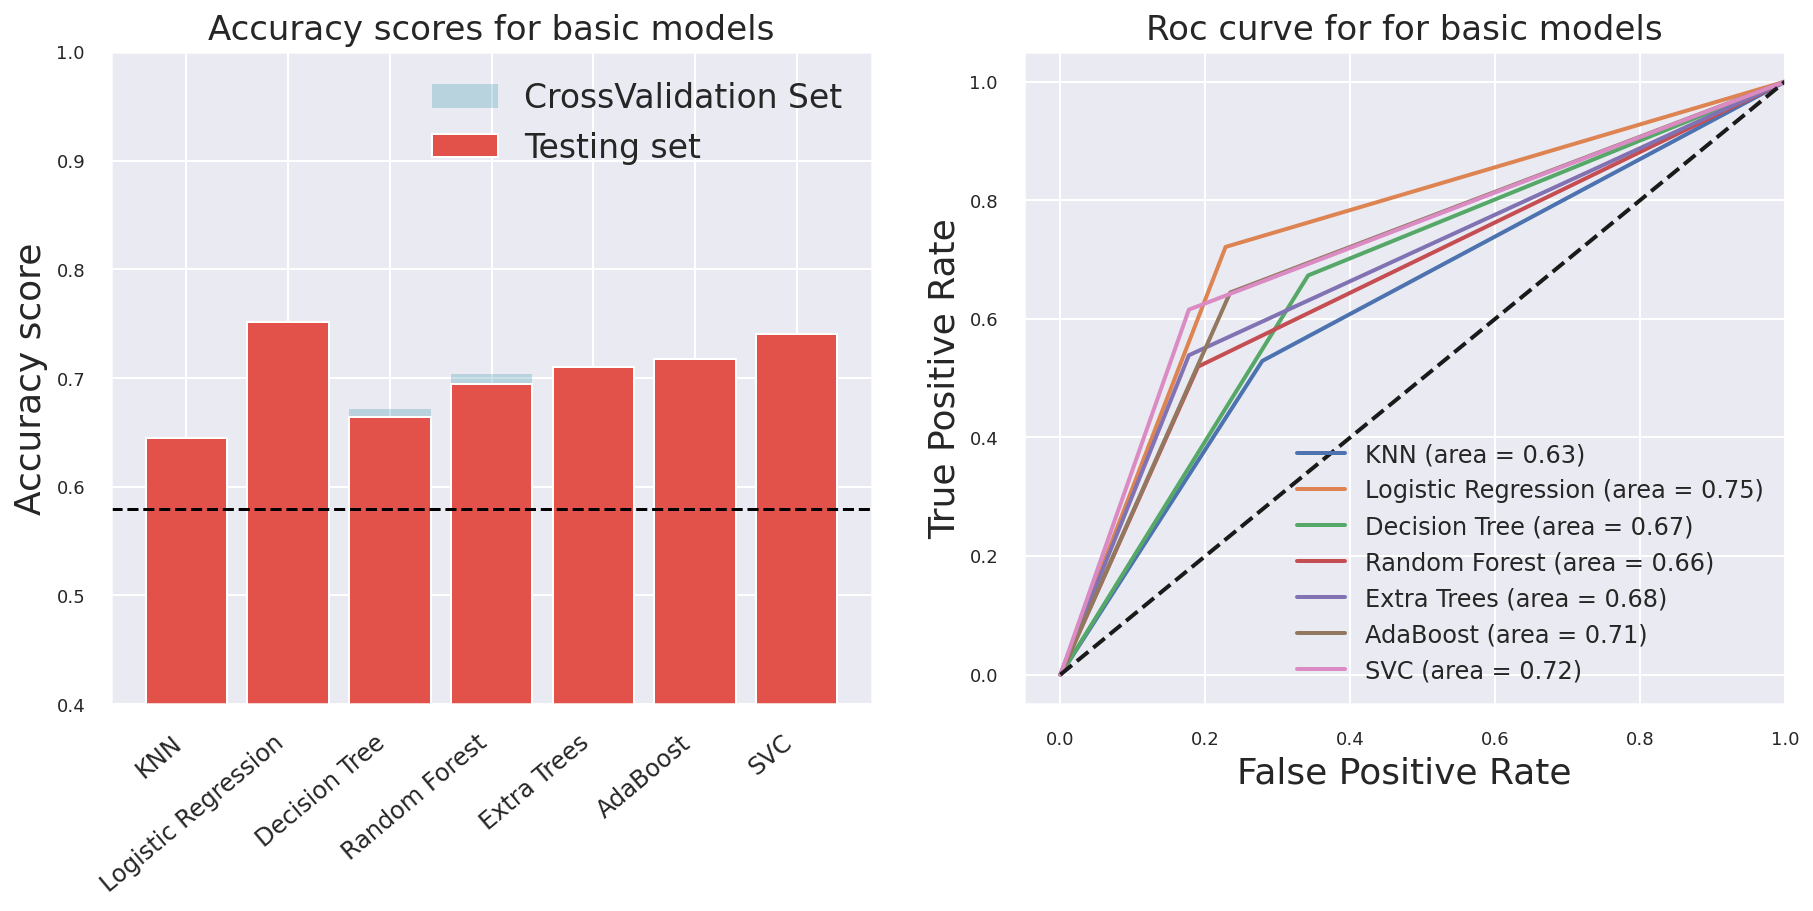

In [59]:
basic_classifiers( X_train, X_test, y_train, y_test, kfold)

In [60]:
#RF_ET_GridSearch (X_train, X_test, y_train, y_test, kfold)

* Grid Search with Random Forest Classifier Model Accuracy = 0.6755725190839694

* Grid Search with Extra Trees Classifier Model Accuracy = 0.6946564885496184

- ### XGBoost: Final try to increase the predictive score

After tuning the hyperparamenters, these are the final parameters:
- max_depth: 5
- min_child_weight: 3, 1
- gamma: 0

In [61]:
def model_visualization (labels, scores_all, scores_predictive, pred, title, inds, y_test_sets):
    fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(13,6))

    fig.suptitle(title, fontsize=16)
    #bar chart of accuracy scores

    ax1.bar(inds, scores_all, color=sns.color_palette(color)[5], alpha=0.3, hatch="x", edgecolor="none",label="CrossValidation Set") #
    ax1.bar(inds, scores_predictive, color=sns.color_palette(color)[0], label="Testing set")
    ax1.set_ylim(0.4, 1)
    ax1.set_ylabel("Accuracy score")
    ax1.axhline(0.5793, color="black", linestyle="--")
    ax1.axhline(0.7758346581875993, color="red", linestyle="--")
    ax1.set_title("Accuracy scores", fontsize=17)
    ax1.set_xticks(inds)
    ax1.set_xticklabels(labels, size=14)
    ax1.legend()
    


    for label, pred, y_test in zip(labels, pred, y_test_sets):
        fpr, tpr, threshold = roc_curve(y_test.values, pred)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=label+' (area = %0.2f)' % roc_auc, linewidth=2)
    ax2.plot([0, 1], [0, 1], 'k--', linewidth=2)
    ax2.set_xlim([-0.05, 1.0])
    ax2.set_ylim([-0.05, 1.05])
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.legend(loc="lower right", prop={'size': 14})
    ax2.set_title("Roc curve", fontsize=17)

    plt.show()

- ### XGBoost for clinical features:

In [62]:
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)

# data splitting
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']

X_train, X_test, y_train, y_test_c = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [63]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

clinical_xgb1_pred_, clinical_xgb1_test_score, clinical_xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test_c)

CV scores:  [0.76862745 0.76470588 0.81176471 0.72156863 0.72941176]
CV Standard Deviation:  0.032204651243369124

CV Mean score:  0.7592156862745097
Train score:    1.0
Test score:     0.7678855325914149

Confusion Matrix: 
[[296  68]
 [ 78 187]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       364
           1       0.73      0.71      0.72       265

    accuracy                           0.77       629
   macro avg       0.76      0.76      0.76       629
weighted avg       0.77      0.77      0.77       629



- ### XGBoost for genatic features:

In [64]:
genetic_features_to_drop = df.columns[4:35]
genetic_df = df.drop(genetic_features_to_drop, axis=1)
genetic_df = genetic_df.drop(['age_at_diagnosis','type_of_breast_surgery', 'cancer_type'], axis=1)
genetic_df = genetic_df.iloc [:,:-174]
genetic_df['overall_survival']= df['overall_survival']
# data splitting
X = genetic_df.drop(['patient_id', 'overall_survival'], axis=1)
y = genetic_df['overall_survival']

X_train, X_test, y_train, y_test_g = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [65]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

gene_xgb1_pred_, gene_xgb1_test_score, gene_xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test_g)

CV scores:  [0.6        0.63529412 0.67058824 0.65098039 0.62745098]
CV Standard Deviation:  0.02360771285222339

CV Mean score:  0.6368627450980392
Train score:    1.0
Test score:     0.6343402225755167

Confusion Matrix: 
[[280  84]
 [146 119]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       364
           1       0.59      0.45      0.51       265

    accuracy                           0.63       629
   macro avg       0.62      0.61      0.61       629
weighted avg       0.63      0.63      0.62       629



- ### XGBoost for all Features:

In [66]:
all_categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
all_categorical_columns = [ele for ele in all_categorical_columns if ele not in unwanted_columns] 
dumm_df = pd.get_dummies(df.drop('patient_id',axis=1 ), columns= all_categorical_columns, dummy_na=True)

In [67]:
# data splitting
X = dumm_df.drop(['death_from_cancer','overall_survival'], axis=1)
y = dumm_df['overall_survival']

X_train, X_test, y_train, y_test_all = train_test_split(X, y, test_size=0.33, random_state=42)

In [68]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

df_xgb1_pred_, df_xgb1_test_score, df_xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test_all)

CV scores:  [0.72156863 0.77254902 0.71372549 0.76078431 0.76470588]
CV Standard Deviation:  0.024123225881144617

CV Mean score:  0.7466666666666667
Train score:    1.0
Test score:     0.7583465818759937

Confusion Matrix: 
[[306  65]
 [ 87 171]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       371
           1       0.72      0.66      0.69       258

    accuracy                           0.76       629
   macro avg       0.75      0.74      0.75       629
weighted avg       0.76      0.76      0.76       629



- ### XGBoost for all features with combination of genatic data

In [69]:
combin_geneatic_df = pd.read_csv("../input/threshold-005csv/threshold_0.05.csv", sep=",", index_col="Unnamed: 0")
clinical_df_new = pd.merge(clinical_df, combin_geneatic_df, left_index=True, right_index=True, sort='patient_id', how='outer')

categorical_columns = clinical_df_new.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
dummies_clinical_df = pd.get_dummies(clinical_df_new.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)

# data splitting
X_combin = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']

X_train, X_test, y_train, y_test_comp = train_test_split(X_combin, y, test_size=0.33, random_state=42)

In [70]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xgb1_pred, xgb1_test_score, xgb1_cv_score = model_metrics(xgb1, kfold, X_train, X_test, y_train, y_test_comp)

CV scores:  [0.75294118 0.78039216 0.74117647 0.76470588 0.78039216]
CV Standard Deviation:  0.015369347405698364

CV Mean score:  0.763921568627451
Train score:    1.0
Test score:     0.794912559618442

Confusion Matrix: 
[[316  55]
 [ 74 184]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       371
           1       0.77      0.71      0.74       258

    accuracy                           0.79       629
   macro avg       0.79      0.78      0.79       629
weighted avg       0.79      0.79      0.79       629



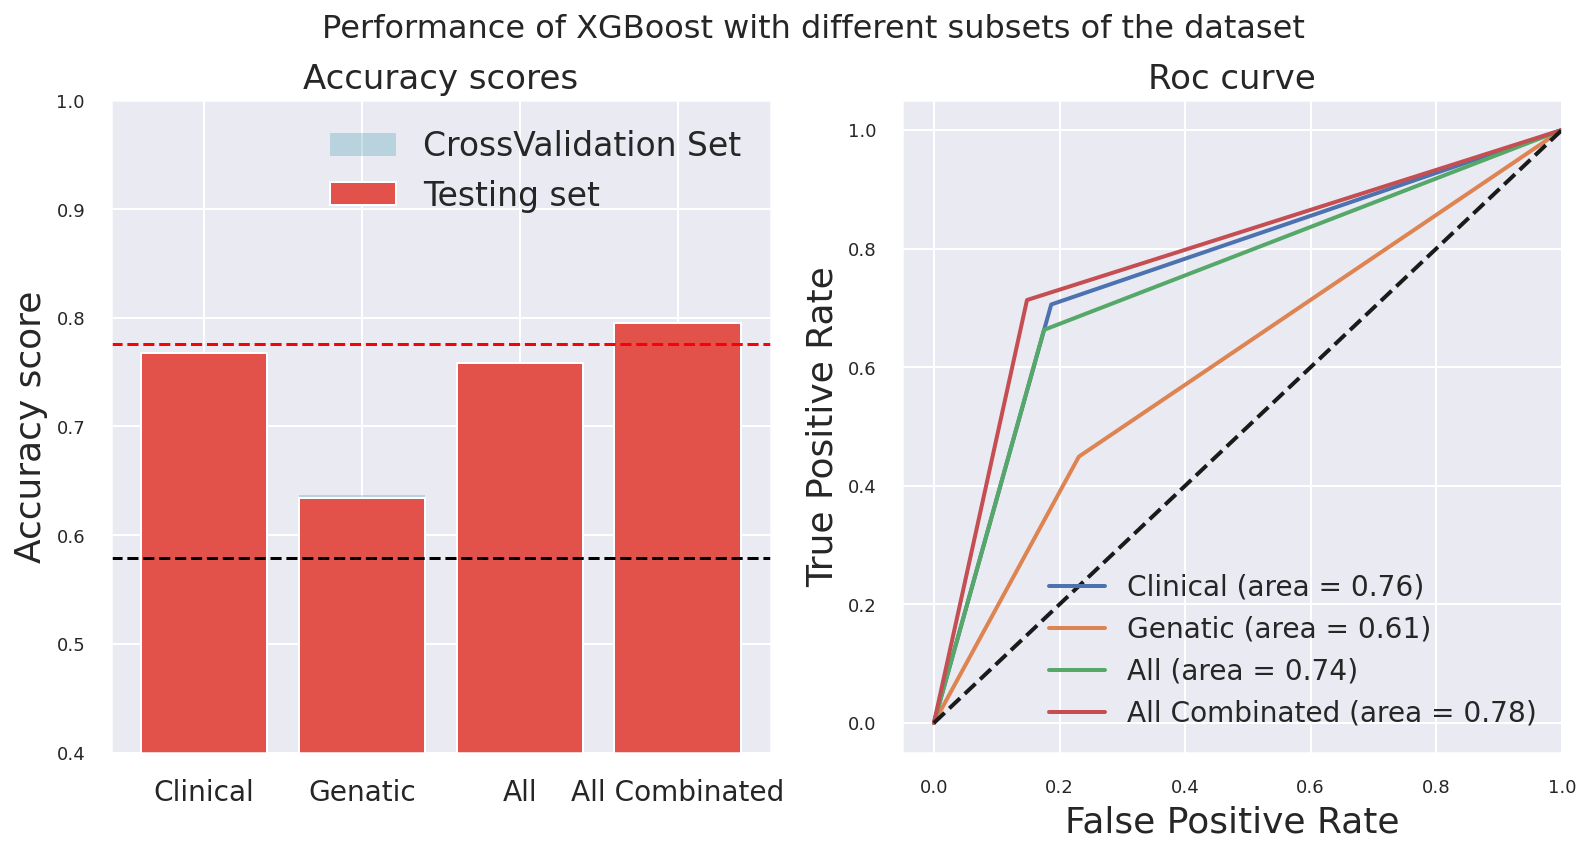

In [71]:
title = "Performance of XGBoost with different subsets of the dataset"
inds = range(1,5)
labels = ["Clinical", "Genatic", "All" , "All Combinated"]
scores_all = [clinical_xgb1_cv_score, gene_xgb1_cv_score, df_xgb1_cv_score, xgb1_cv_score ]
scores_predictive = [clinical_xgb1_test_score, gene_xgb1_test_score, df_xgb1_test_score, xgb1_test_score ]
pred = [clinical_xgb1_pred_, gene_xgb1_pred_, df_xgb1_pred_, xgb1_pred]
y_test_sets = [y_test_c, y_test_g, y_test_all, y_test_comp]
model_visualization (labels, scores_all, scores_predictive, pred, title, inds, y_test_sets)

XGBoost preformed very well combared to traditional basic models, and the best model was the one that was trained with all of the features combined with accuracy of 0.779 and AUC of 0.76

<a name="Conclusions_and_Recommendations"></a>
## Conclusions and Recommendations

Using machine learning models on genetic data has the potential to improve our understanding of cancers and survival prediction. Huge open-source  datasets are available for public to analyze and hopefully get some insights. The model with the best preformace was XGBoost with max_depth=5 and min_child_weight=1 that was trained with the full dataframe with the addition of all of the combination of all genetic data values. The accuacy score was 0.779 and the AUC was 0.76. To enhance this project, increase the number of samples, include mutations and raw genetic data into the modeling part, and maybe try some deep learning models.  




<a name="References"></a>
## References

- [Pereira, B., Chin, S. F., Rueda, O. M., Vollan, H. K. M., Provenzano, E., Bardwell, H. A., ... & Tsui, D. W. (2016). The somatic mutation profiles of 2,433 breast cancers refine their genomic and transcriptomic landscapes. Nature communications, 7(1), 1-16.](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4866047/pdf/ncomms11479.pdf)
- [Bashiri, A., Ghazisaeedi, M., Safdari, R., Shahmoradi, L., & Ehtesham, H. (2017). Improving the prediction of survival in cancer patients by using machine learning techniques: experience of gene expression data: a narrative review. Iranian journal of publ](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5402773/)
- [Breast Cancer dataset (METABRIC, Nature 2012 & Nat Commun 2016) in CBioPortal](https://www.cbioportal.org/study/summary?id=brca_metabric)
- [Increasing the resolution on breast cancer – the METABRIC study](https://scienceblog.cancerresearchuk.org/2012/04/18/increasing-the-resolution-on-breast-cancer-the-metabric-study/)
- [Cerami et al. The cBio Cancer Genomics Portal: An Open Platform for Exploring Multidimensional Cancer Genomics Data. Cancer Discovery. May 2012 2; 401.](https://www.ncbi.nlm.nih.gov/pubmed/22588877)
- [Gao et al. Integrative analysis of complex cancer genomics and clinical profiles using the cBioPortal. Sci. Signal. 6, pl1 (2013).](https://www.ncbi.nlm.nih.gov/pubmed/23550210)
- [World Health Organization - Breast cancer](https://www.who.int/cancer/prevention/diagnosis-screening/breast-cancer/en/)
- [Van't Veer, L. J., Dai, H., Van De Vijver, M. J., He, Y. D., Hart, A. A., Mao, M., ... & Schreiber, G. J. (2002). Gene expression profiling predicts clinical outcome of breast cancer. nature, 415(6871), 530-536.](https://www.ncbi.nlm.nih.gov/pubmed/11823860)
